# Import modules

In [1]:
from sklearn.datasets import load_diabetes
import pickle
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import os
import torch


from synthcity.metrics.eval_performance import (
    PerformanceEvaluatorMLP,
    PerformanceEvaluatorXGB,
)
from synthcity.utils import reproducibility
from synthcity.plugins import Plugins
import synthcity.logger as log
from synthcity.plugins.core.dataloader import GenericDataLoader
from DGE_utils import metric_different_datasets, mean_across_pandas, add_std, get_folder_names

reproducibility.clear_cache()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


assert device.type == 'cuda'
Plugins(categories=["generic"]).list()


[2023-11-24T06:52:35.206513+0000][24501][CRITICAL] load failed: 
GReaT is not installed. Please install it with pip install GReaT.
Please be aware that GReaT is only available for python >= 3.9.

[2023-11-24T06:52:35.211251+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T06:52:35.214429+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T06:52:35.228617+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


['bayesian_network',
 'rtvae',
 'arf',
 'nflow',
 'uniform_sampler',
 'tvae',
 'ctgan',
 'dummy_sampler',
 'marginal_distributions',
 'ddpm']

# Load data and settings

In [2]:
from DGE_data import get_real_and_synthetic, get_real_and_synthetic_with_multiple_models

# let's restrict ourselves to classification datasets
datasets = ['moons', 'circles', 'breast_cancer',
            'adult', 'covid']
# ['moons', 'circles','cal_housing', 'adult', 'diabetes', 'breast_cancer',  'seer', 'cutract' ]
#model_name = 'tvae'  # synthetic data model
model_names = ['tvae', 'nflow', 'ctgan', 'adsgan']
model_name = model_names[0]
for m in model_names[1:]:
    model_name += "_" + m

n_models = 20  # number of models in ensemble, for each run
max_n = 2000  # maximum number of data points to use for training generative model.
nsyn = 2000  # number of synthetic data points per synthetic dataset. Defaults to same as generative training size if None

num_runs = 10 # Number of runs. Don't choose to large, since total number of synthetic datasets is num_runs*n_models

# Per section 4.1, 10 runs with different seeds

# Whether to load and save models and synthetic datasets
load = True  # results
load_syn = True  # data
save = True  # save results and data

verbose = True



# Experiments

## Model Training

[2023-11-24T06:52:46.921032+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T06:52:46.925858+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T06:52:46.926904+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T06:52:46.928358+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Models to run:  ['tvae', 'nflow', 'ctgan', 'adsgan']
n_models:  20
num_runs:  10
datasets:  ['moons', 'circles', 'breast_cancer', 'adult', 'covid']
model string:  tvae_nflow_ctgan_adsgan
verbose:  True
np.unique(y):  [0 1]
n_total 10000 n_train: 2000
Generating data with model:  tvae
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed0.pkl
Training model 1/200


INFO:torch.distributed.nn.jit.instantiator:Created a temporary directory at /var/tmp/tmpic5767qd
INFO:torch.distributed.nn.jit.instantiator:Writing /var/tmp/tmpic5767qd/_remote_module_non_scriptable.py
 45%|██████████████████████████████████████████████████████████████████████████▋                                                                                           | 450/1000 [02:04<02:32,  3.61it/s]
[2023-11-24T06:55:00.059818+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T06:55:00.063675+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T06:55:00.066688+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T06:55:00.070127+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed1.pkl
Training model 2/200


 55%|███████████████████████████████████████████████████████████████████████████████████████████▏                                                                          | 549/1000 [02:45<02:15,  3.32it/s]
[2023-11-24T06:57:49.734445+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T06:57:49.736261+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T06:57:49.737821+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T06:57:49.739673+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed2.pkl
Training model 3/200


 20%|█████████████████████████████████                                                                                                                                     | 399/2000 [03:11<12:50,  2.08it/s]
[2023-11-24T07:01:05.351291+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T07:01:05.358984+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T07:01:05.364701+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T07:01:05.368070+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed3.pkl
Training model 4/200


  5%|████████▏                                                                                                                                                          | 499/10000 [04:02<1:16:54,  2.06it/s]
[2023-11-24T07:05:10.470586+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T07:05:10.472180+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T07:05:10.473760+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T07:05:10.475562+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed4.pkl
Training model 5/200


 45%|██████████████████████████████████████████████████████████████████████████▋                                                                                           | 450/1000 [02:06<02:34,  3.56it/s]
[2023-11-24T07:07:21.448003+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T07:07:21.453191+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T07:07:21.456818+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T07:07:21.460551+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed5.pkl
Training model 6/200


 50%|██████████████████████████████████████████████████████████████████████████████████▊                                                                                   | 499/1000 [02:25<02:26,  3.42it/s]
[2023-11-24T07:09:52.174641+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T07:09:52.175870+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T07:09:52.177038+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T07:09:52.181579+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed6.pkl
Training model 7/200


 45%|██████████████████████████████████████████████████████████████████████████▌                                                                                           | 899/2000 [06:58<08:32,  2.15it/s]
[2023-11-24T07:16:53.988394+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T07:16:53.991539+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T07:16:53.994737+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T07:16:53.997936+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed7.pkl
Training model 8/200


 10%|████████████████▉                                                                                                                                                 | 1049/10000 [08:23<1:11:37,  2.08it/s]
[2023-11-24T07:25:20.014722+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T07:25:20.017577+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T07:25:20.020502+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T07:25:20.023708+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed8.pkl
Training model 9/200


 45%|██████████████████████████████████████████████████████████████████████████▋                                                                                           | 450/1000 [02:02<02:29,  3.68it/s]
[2023-11-24T07:27:26.409503+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T07:27:26.413606+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T07:27:26.416711+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T07:27:26.420230+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed9.pkl
Training model 10/200


 75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                         | 749/1000 [03:24<01:08,  3.66it/s]
[2023-11-24T07:30:56.659053+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T07:30:56.661070+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T07:30:56.662386+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T07:30:56.664139+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed10.pkl
Training model 11/200


 35%|██████████████████████████████████████████████████████████                                                                                                            | 699/2000 [05:18<09:52,  2.20it/s]
[2023-11-24T07:36:18.485824+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T07:36:18.489060+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T07:36:18.492156+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T07:36:18.495583+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed11.pkl
Training model 12/200


  6%|██████████▌                                                                                                                                                        | 649/10000 [05:01<1:12:28,  2.15it/s]
[2023-11-24T07:41:23.034425+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T07:41:23.037419+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T07:41:23.040334+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T07:41:23.043796+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed12.pkl
Training model 13/200


 45%|██████████████████████████████████████████████████████████████████████████▋                                                                                           | 450/1000 [02:01<02:28,  3.70it/s]
[2023-11-24T07:43:28.351879+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T07:43:28.352928+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T07:43:28.357868+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T07:43:28.364240+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed13.pkl
Training model 14/200


 45%|██████████████████████████████████████████████████████████████████████████▌                                                                                           | 449/1000 [01:56<02:22,  3.86it/s]
[2023-11-24T07:45:28.984057+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T07:45:28.988050+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T07:45:28.990923+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T07:45:28.994370+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed14.pkl
Training model 15/200


 22%|█████████████████████████████████████▎                                                                                                                                | 449/2000 [03:11<11:02,  2.34it/s]
[2023-11-24T07:48:44.108850+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T07:48:44.111960+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T07:48:44.115052+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T07:48:44.118673+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed15.pkl
Training model 16/200


  7%|███████████▍                                                                                                                                                       | 699/10000 [05:17<1:10:21,  2.20it/s]
[2023-11-24T07:54:04.067515+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T07:54:04.071081+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T07:54:04.074273+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T07:54:04.081538+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed16.pkl
Training model 17/200


 45%|██████████████████████████████████████████████████████████████████████████▋                                                                                           | 450/1000 [02:07<02:35,  3.54it/s]
[2023-11-24T07:56:16.019812+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T07:56:16.023508+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T07:56:16.026395+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T07:56:16.029957+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed17.pkl
Training model 18/200


 50%|██████████████████████████████████████████████████████████████████████████████████▊                                                                                   | 499/1000 [02:06<02:07,  3.93it/s]
[2023-11-24T07:58:27.118169+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T07:58:27.120156+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T07:58:27.121742+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T07:58:27.123605+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed18.pkl
Training model 19/200


 22%|█████████████████████████████████████▎                                                                                                                                | 449/2000 [03:09<10:55,  2.37it/s]
[2023-11-24T08:01:40.031475+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T08:01:40.034525+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T08:01:40.037719+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T08:01:40.041280+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed19.pkl
Training model 20/200


  5%|████████▏                                                                                                                                                          | 499/10000 [03:37<1:08:54,  2.30it/s]
[2023-11-24T08:05:19.928558+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T08:05:19.933853+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T08:05:19.935375+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T08:05:19.937160+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed20.pkl
Training model 21/200


 45%|██████████████████████████████████████████████████████████████████████████▋                                                                                           | 450/1000 [02:00<02:27,  3.72it/s]
[2023-11-24T08:07:24.671494+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T08:07:24.675474+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T08:07:24.678713+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T08:07:24.682223+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed21.pkl
Training model 22/200


 50%|██████████████████████████████████████████████████████████████████████████████████▊                                                                                   | 499/1000 [02:00<02:01,  4.13it/s]
[2023-11-24T08:09:29.557140+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T08:09:29.558357+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T08:09:29.563167+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T08:09:29.567456+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed22.pkl
Training model 23/200


 22%|█████████████████████████████████████▎                                                                                                                                | 449/2000 [03:08<10:50,  2.39it/s]
[2023-11-24T08:12:41.388125+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T08:12:41.391135+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T08:12:41.394223+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T08:12:41.397614+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed23.pkl
Training model 24/200


  7%|███████████▍                                                                                                                                                       | 699/10000 [05:05<1:07:38,  2.29it/s]
[2023-11-24T08:17:49.006791+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T08:17:49.008111+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T08:17:49.009697+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T08:17:49.011377+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed24.pkl
Training model 25/200


 45%|██████████████████████████████████████████████████████████████████████████▋                                                                                           | 450/1000 [02:00<02:27,  3.72it/s]
[2023-11-24T08:19:53.743976+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T08:19:53.747482+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T08:19:53.750592+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T08:19:53.754077+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed25.pkl
Training model 26/200


 50%|██████████████████████████████████████████████████████████████████████████████████▊                                                                                   | 499/1000 [01:56<01:57,  4.27it/s]
[2023-11-24T08:21:54.791991+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T08:21:54.796307+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T08:21:54.799459+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T08:21:54.802982+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed26.pkl
Training model 27/200


 22%|█████████████████████████████████████▎                                                                                                                                | 449/2000 [02:59<10:20,  2.50it/s]
[2023-11-24T08:24:57.979891+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T08:24:57.983012+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T08:24:57.985951+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T08:24:57.989435+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed27.pkl
Training model 28/200


  8%|█████████████                                                                                                                                                      | 799/10000 [05:50<1:07:20,  2.28it/s]
[2023-11-24T08:30:51.403786+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T08:30:51.406895+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T08:30:51.410070+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T08:30:51.413630+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed28.pkl
Training model 29/200


 45%|██████████████████████████████████████████████████████████████████████████▋                                                                                           | 450/1000 [01:59<02:25,  3.77it/s]
[2023-11-24T08:32:54.696802+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T08:32:54.700418+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T08:32:54.701706+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T08:32:54.703196+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed29.pkl
Training model 30/200


 50%|██████████████████████████████████████████████████████████████████████████████████▊                                                                                   | 499/1000 [01:52<01:53,  4.43it/s]
[2023-11-24T08:34:51.791500+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T08:34:51.793162+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T08:34:51.794573+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T08:34:51.796232+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed30.pkl
Training model 31/200


 22%|█████████████████████████████████████▎                                                                                                                                | 449/2000 [02:52<09:57,  2.60it/s]
[2023-11-24T08:37:48.155573+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T08:37:48.158808+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T08:37:48.161831+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T08:37:48.165363+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed31.pkl
Training model 32/200


 10%|████████████████▎                                                                                                                                                  | 999/10000 [07:17<1:05:40,  2.28it/s]
[2023-11-24T08:45:07.985181+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T08:45:07.988359+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T08:45:07.993525+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T08:45:07.995363+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed32.pkl
Training model 33/200


 45%|██████████████████████████████████████████████████████████████████████████▋                                                                                           | 450/1000 [01:59<02:25,  3.77it/s]
[2023-11-24T08:47:11.260873+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T08:47:11.264309+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T08:47:11.267437+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T08:47:11.270745+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed33.pkl
Training model 34/200


 50%|██████████████████████████████████████████████████████████████████████████████████▊                                                                                   | 499/1000 [01:46<01:46,  4.69it/s]
[2023-11-24T08:49:01.644330+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T08:49:01.648166+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T08:49:01.651289+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T08:49:01.654849+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed34.pkl
Training model 35/200


 22%|█████████████████████████████████████▎                                                                                                                                | 449/2000 [02:47<09:37,  2.68it/s]
[2023-11-24T08:51:54.174002+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T08:51:54.177331+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T08:51:54.180354+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T08:51:54.183660+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed35.pkl
Training model 36/200


  5%|████████▉                                                                                                                                                          | 549/10000 [03:42<1:03:56,  2.46it/s]
[2023-11-24T08:55:39.204419+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T08:55:39.205910+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T08:55:39.207445+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T08:55:39.209203+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed36.pkl
Training model 37/200


 45%|██████████████████████████████████████████████████████████████████████████▋                                                                                           | 450/1000 [02:01<02:29,  3.69it/s]
[2023-11-24T08:57:45.499707+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T08:57:45.501022+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T08:57:45.502276+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T08:57:45.506424+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed37.pkl
Training model 38/200


 50%|██████████████████████████████████████████████████████████████████████████████████▊                                                                                   | 499/1000 [01:43<01:43,  4.82it/s]
[2023-11-24T08:59:34.088696+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T08:59:34.092537+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T08:59:34.095654+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T08:59:34.099048+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed38.pkl
Training model 39/200


 22%|█████████████████████████████████████▎                                                                                                                                | 449/2000 [02:41<09:18,  2.78it/s]
[2023-11-24T09:02:19.184455+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T09:02:19.187783+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T09:02:19.188793+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T09:02:19.190176+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed39.pkl
Training model 40/200


  5%|█████████                                                                                                                                                            | 549/10000 [03:29<59:58,  2.63it/s]
[2023-11-24T09:05:50.883276+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T09:05:50.886322+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T09:05:50.889260+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T09:05:50.892548+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed40.pkl
Training model 41/200


 45%|██████████████████████████████████████████████████████████████████████████▋                                                                                           | 450/1000 [01:58<02:24,  3.81it/s]
[2023-11-24T09:07:53.195815+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T09:07:53.199252+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T09:07:53.202480+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T09:07:53.205893+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed41.pkl
Training model 42/200


 50%|██████████████████████████████████████████████████████████████████████████████████▊                                                                                   | 499/1000 [01:37<01:37,  5.11it/s]
[2023-11-24T09:09:35.007140+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T09:09:35.010620+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T09:09:35.013699+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T09:09:35.017192+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed42.pkl
Training model 43/200


 22%|█████████████████████████████████████▎                                                                                                                                | 449/2000 [02:42<09:21,  2.76it/s]
[2023-11-24T09:12:21.200249+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T09:12:21.201769+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T09:12:21.203192+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T09:12:21.204967+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed43.pkl
Training model 44/200


  5%|█████████                                                                                                                                                            | 549/10000 [03:29<59:58,  2.63it/s]
[2023-11-24T09:15:52.478529+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T09:15:52.481745+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T09:15:52.484855+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T09:15:52.487397+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed44.pkl
Training model 45/200


 45%|██████████████████████████████████████████████████████████████████████████▋                                                                                           | 450/1000 [01:59<02:25,  3.77it/s]
[2023-11-24T09:17:55.879988+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T09:17:55.881182+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T09:17:55.883400+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T09:17:55.887227+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed45.pkl
Training model 46/200


 50%|██████████████████████████████████████████████████████████████████████████████████▊                                                                                   | 499/1000 [01:38<01:38,  5.08it/s]
[2023-11-24T09:19:38.346532+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T09:19:38.350542+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T09:19:38.353722+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T09:19:38.357203+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed46.pkl
Training model 47/200


 22%|█████████████████████████████████████▎                                                                                                                                | 449/2000 [02:42<09:21,  2.76it/s]
[2023-11-24T09:22:24.403242+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T09:22:24.404821+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T09:22:24.406267+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T09:22:24.407997+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed47.pkl
Training model 48/200


  5%|█████████                                                                                                                                                            | 549/10000 [03:20<57:29,  2.74it/s]
[2023-11-24T09:25:47.167490+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T09:25:47.170481+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T09:25:47.173508+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T09:25:47.176339+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed48.pkl
Training model 49/200


 45%|██████████████████████████████████████████████████████████████████████████▋                                                                                           | 450/1000 [01:58<02:24,  3.79it/s]
[2023-11-24T09:27:49.579976+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T09:27:49.583737+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T09:27:49.586966+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T09:27:49.590469+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed49.pkl
Training model 50/200


 50%|██████████████████████████████████████████████████████████████████████████████████▊                                                                                   | 499/1000 [01:37<01:38,  5.11it/s]
[2023-11-24T09:29:31.271341+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T09:29:31.275424+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T09:29:31.278353+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T09:29:31.281713+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed50.pkl
Training model 51/200


 22%|█████████████████████████████████████▎                                                                                                                                | 449/2000 [02:47<09:38,  2.68it/s]
[2023-11-24T09:32:22.720877+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T09:32:22.724720+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T09:32:22.727836+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T09:32:22.731374+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed51.pkl
Training model 52/200


  5%|█████████                                                                                                                                                            | 549/10000 [03:20<57:29,  2.74it/s]
[2023-11-24T09:35:45.879288+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T09:35:45.886317+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T09:35:45.889306+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T09:35:45.892688+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed52.pkl
Training model 53/200


 45%|██████████████████████████████████████████████████████████████████████████▋                                                                                           | 450/1000 [01:58<02:24,  3.80it/s]
[2023-11-24T09:37:48.507012+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T09:37:48.510964+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T09:37:48.514274+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T09:37:48.517747+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed53.pkl
Training model 54/200


 50%|██████████████████████████████████████████████████████████████████████████████████▊                                                                                   | 499/1000 [01:37<01:38,  5.10it/s]
[2023-11-24T09:39:30.773061+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T09:39:30.777072+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T09:39:30.780045+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T09:39:30.783337+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed54.pkl
Training model 55/200


 22%|█████████████████████████████████████▎                                                                                                                                | 449/2000 [02:42<09:20,  2.77it/s]
[2023-11-24T09:42:16.664686+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T09:42:16.667987+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T09:42:16.670994+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T09:42:16.674282+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed55.pkl
Training model 56/200


  5%|█████████                                                                                                                                                            | 549/10000 [03:24<58:45,  2.68it/s]
[2023-11-24T09:45:44.128374+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T09:45:44.129703+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T09:45:44.130644+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T09:45:44.134052+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed56.pkl
Training model 57/200


 45%|██████████████████████████████████████████████████████████████████████████▋                                                                                           | 450/1000 [01:59<02:25,  3.78it/s]
[2023-11-24T09:47:48.281499+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T09:47:48.285025+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T09:47:48.288046+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T09:47:48.291777+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed57.pkl
Training model 58/200


 50%|██████████████████████████████████████████████████████████████████████████████████▊                                                                                   | 499/1000 [01:38<01:38,  5.07it/s]
[2023-11-24T09:49:30.952975+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T09:49:30.957042+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T09:49:30.960283+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T09:49:30.963849+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed58.pkl
Training model 59/200


 22%|█████████████████████████████████████▎                                                                                                                                | 449/2000 [02:43<09:24,  2.75it/s]
[2023-11-24T09:52:17.874031+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T09:52:17.877364+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T09:52:17.880509+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T09:52:17.883933+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed59.pkl
Training model 60/200


  5%|█████████                                                                                                                                                            | 549/10000 [03:20<57:24,  2.74it/s]
[2023-11-24T09:55:40.328304+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T09:55:40.331502+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T09:55:40.334527+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T09:55:40.338154+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed60.pkl
Training model 61/200


 45%|██████████████████████████████████████████████████████████████████████████▋                                                                                           | 450/1000 [01:58<02:25,  3.79it/s]
[2023-11-24T09:57:42.956713+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T09:57:42.960251+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T09:57:42.963222+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T09:57:42.966449+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed61.pkl
Training model 62/200


 50%|██████████████████████████████████████████████████████████████████████████████████▊                                                                                   | 499/1000 [01:37<01:38,  5.11it/s]
[2023-11-24T09:59:24.719847+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T09:59:24.723567+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T09:59:24.726901+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T09:59:24.730322+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed62.pkl
Training model 63/200


 22%|█████████████████████████████████████▎                                                                                                                                | 449/2000 [02:47<09:37,  2.69it/s]
[2023-11-24T10:02:15.126717+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T10:02:15.129720+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T10:02:15.132700+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T10:02:15.136008+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed63.pkl
Training model 64/200


  5%|█████████                                                                                                                                                            | 549/10000 [03:20<57:35,  2.73it/s]
[2023-11-24T10:05:38.333223+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T10:05:38.336124+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T10:05:38.339196+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T10:05:38.342446+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed64.pkl
Training model 65/200


 45%|██████████████████████████████████████████████████████████████████████████▋                                                                                           | 450/1000 [01:59<02:26,  3.76it/s]
[2023-11-24T10:07:41.832831+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T10:07:41.836495+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T10:07:41.839388+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T10:07:41.842612+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed65.pkl
Training model 66/200


 50%|██████████████████████████████████████████████████████████████████████████████████▊                                                                                   | 499/1000 [01:37<01:37,  5.13it/s]
[2023-11-24T10:09:22.970278+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T10:09:22.974308+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T10:09:22.977239+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T10:09:22.980582+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed66.pkl
Training model 67/200


 22%|█████████████████████████████████████▎                                                                                                                                | 449/2000 [02:41<09:17,  2.78it/s]
[2023-11-24T10:12:08.134925+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T10:12:08.137962+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T10:12:08.141096+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T10:12:08.144641+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed67.pkl
Training model 68/200


  5%|█████████                                                                                                                                                            | 549/10000 [03:20<57:27,  2.74it/s]
[2023-11-24T10:15:30.842713+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T10:15:30.845752+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T10:15:30.848689+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T10:15:30.852018+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed68.pkl
Training model 69/200


 45%|██████████████████████████████████████████████████████████████████████████▋                                                                                           | 450/1000 [01:59<02:25,  3.77it/s]
[2023-11-24T10:17:34.469324+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T10:17:34.474526+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T10:17:34.478245+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T10:17:34.481938+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed69.pkl
Training model 70/200


 50%|██████████████████████████████████████████████████████████████████████████████████▊                                                                                   | 499/1000 [01:40<01:40,  4.99it/s]
[2023-11-24T10:19:20.215356+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T10:19:20.219024+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T10:19:20.221902+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T10:19:20.225336+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed70.pkl
Training model 71/200


 22%|█████████████████████████████████████▎                                                                                                                                | 449/2000 [02:42<09:21,  2.76it/s]
[2023-11-24T10:22:06.139764+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T10:22:06.143075+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T10:22:06.146073+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T10:22:06.149554+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed71.pkl
Training model 72/200


  5%|█████████                                                                                                                                                            | 549/10000 [03:20<57:37,  2.73it/s]
[2023-11-24T10:25:29.337828+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T10:25:29.339328+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T10:25:29.340770+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T10:25:29.342495+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed72.pkl
Training model 73/200


 45%|██████████████████████████████████████████████████████████████████████████▋                                                                                           | 450/1000 [01:59<02:25,  3.78it/s]
[2023-11-24T10:27:32.227557+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T10:27:32.231029+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T10:27:32.233948+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T10:27:32.237233+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed73.pkl
Training model 74/200


 50%|██████████████████████████████████████████████████████████████████████████████████▊                                                                                   | 499/1000 [01:37<01:38,  5.11it/s]
[2023-11-24T10:29:13.884017+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T10:29:13.888245+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T10:29:13.891331+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T10:29:13.894797+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed74.pkl
Training model 75/200


 22%|█████████████████████████████████████▎                                                                                                                                | 449/2000 [02:40<09:15,  2.79it/s]
[2023-11-24T10:31:58.447097+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T10:31:58.448441+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T10:31:58.449957+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T10:31:58.451886+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed75.pkl
Training model 76/200


  5%|████████▉                                                                                                                                                          | 549/10000 [04:24<1:16:01,  2.07it/s]
[2023-11-24T10:36:26.039366+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T10:36:26.044124+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T10:36:26.048692+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T10:36:26.053299+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed76.pkl
Training model 77/200


 45%|██████████████████████████████████████████████████████████████████████████▋                                                                                           | 450/1000 [03:13<03:57,  2.32it/s]
[2023-11-24T10:39:46.220958+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T10:39:46.223037+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T10:39:46.227079+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T10:39:46.228859+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed77.pkl
Training model 78/200


 50%|██████████████████████████████████████████████████████████████████████████████████▊                                                                                   | 499/1000 [02:24<02:24,  3.47it/s]
[2023-11-24T10:42:15.872363+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T10:42:15.877172+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T10:42:15.881159+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T10:42:15.885385+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed78.pkl
Training model 79/200


 22%|█████████████████████████████████████▎                                                                                                                                | 449/2000 [04:10<14:24,  1.80it/s]
[2023-11-24T10:46:29.702662+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T10:46:29.704179+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T10:46:29.705765+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T10:46:29.709470+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed79.pkl
Training model 80/200


  5%|████████▉                                                                                                                                                          | 549/10000 [05:12<1:29:45,  1.75it/s]
[2023-11-24T10:51:45.693432+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T10:51:45.694787+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T10:51:45.696286+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T10:51:45.700196+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed80.pkl
Training model 81/200


 45%|██████████████████████████████████████████████████████████████████████████▋                                                                                           | 450/1000 [03:18<04:02,  2.26it/s]
[2023-11-24T10:55:09.085236+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T10:55:09.090130+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T10:55:09.093573+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T10:55:09.097313+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed81.pkl
Training model 82/200


 50%|██████████████████████████████████████████████████████████████████████████████████▊                                                                                   | 499/1000 [02:24<02:24,  3.46it/s]
[2023-11-24T10:57:38.249694+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T10:57:38.256846+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T10:57:38.261394+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T10:57:38.266417+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed82.pkl
Training model 83/200


 22%|█████████████████████████████████████▎                                                                                                                                | 449/2000 [04:11<14:30,  1.78it/s]
[2023-11-24T11:01:55.199746+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T11:01:55.205623+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T11:01:55.210137+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T11:01:55.215013+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed83.pkl
Training model 84/200


  5%|████████▉                                                                                                                                                          | 549/10000 [05:17<1:30:59,  1.73it/s]
[2023-11-24T11:07:14.841433+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T11:07:14.842911+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T11:07:14.847809+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T11:07:14.851334+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed84.pkl
Training model 85/200


 45%|██████████████████████████████████████████████████████████████████████████▋                                                                                           | 450/1000 [03:14<03:58,  2.31it/s]
[2023-11-24T11:10:36.443142+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T11:10:36.445349+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T11:10:36.449136+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T11:10:36.451010+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed85.pkl
Training model 86/200


 50%|██████████████████████████████████████████████████████████████████████████████████▊                                                                                   | 499/1000 [02:23<02:23,  3.49it/s]
[2023-11-24T11:13:05.188735+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T11:13:05.195110+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T11:13:05.198941+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T11:13:05.204426+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed86.pkl
Training model 87/200


 22%|█████████████████████████████████████▎                                                                                                                                | 449/2000 [04:11<14:29,  1.78it/s]
[2023-11-24T11:17:22.320505+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T11:17:22.322644+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T11:17:22.326321+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T11:17:22.329048+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed87.pkl
Training model 88/200


  5%|████████▉                                                                                                                                                          | 549/10000 [05:09<1:28:48,  1.77it/s]
[2023-11-24T11:22:35.247187+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T11:22:35.250785+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T11:22:35.254319+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T11:22:35.258007+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed88.pkl
Training model 89/200


 45%|██████████████████████████████████████████████████████████████████████████▋                                                                                           | 450/1000 [03:15<03:58,  2.30it/s]
[2023-11-24T11:25:55.498047+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T11:25:55.502763+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T11:25:55.506548+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T11:25:55.510526+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed89.pkl
Training model 90/200


 50%|██████████████████████████████████████████████████████████████████████████████████▊                                                                                   | 499/1000 [02:27<02:27,  3.39it/s]
[2023-11-24T11:28:28.293471+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T11:28:28.298335+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T11:28:28.301743+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T11:28:28.305487+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed90.pkl
Training model 91/200


 22%|█████████████████████████████████████▎                                                                                                                                | 449/2000 [04:14<14:39,  1.76it/s]
[2023-11-24T11:32:48.436047+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T11:32:48.442597+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T11:32:48.447198+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T11:32:48.452084+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed91.pkl
Training model 92/200


  5%|████████▉                                                                                                                                                          | 549/10000 [05:16<1:30:49,  1.73it/s]
[2023-11-24T11:38:08.520920+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T11:38:08.524749+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T11:38:08.528955+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T11:38:08.533281+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed92.pkl
Training model 93/200


 45%|██████████████████████████████████████████████████████████████████████████▋                                                                                           | 450/1000 [03:19<04:03,  2.26it/s]
[2023-11-24T11:41:32.566583+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T11:41:32.571314+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T11:41:32.575113+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T11:41:32.578887+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed93.pkl
Training model 94/200


 50%|██████████████████████████████████████████████████████████████████████████████████▊                                                                                   | 499/1000 [02:24<02:24,  3.46it/s]
[2023-11-24T11:44:02.395523+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T11:44:02.399069+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T11:44:02.403949+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T11:44:02.419316+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed94.pkl
Training model 95/200


 22%|█████████████████████████████████████▎                                                                                                                                | 449/2000 [04:15<14:43,  1.76it/s]
[2023-11-24T11:48:24.047743+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T11:48:24.053783+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T11:48:24.058272+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T11:48:24.063105+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed95.pkl
Training model 96/200


  5%|████████▉                                                                                                                                                          | 549/10000 [05:14<1:30:14,  1.75it/s]
[2023-11-24T11:53:40.887510+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T11:53:40.891510+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T11:53:40.896117+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T11:53:40.900850+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed96.pkl
Training model 97/200


 45%|██████████████████████████████████████████████████████████████████████████▋                                                                                           | 450/1000 [03:20<04:04,  2.25it/s]
[2023-11-24T11:57:07.917971+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T11:57:07.919655+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T11:57:07.921150+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T11:57:07.925688+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed97.pkl
Training model 98/200


 50%|██████████████████████████████████████████████████████████████████████████████████▊                                                                                   | 499/1000 [02:23<02:24,  3.47it/s]
[2023-11-24T11:59:38.350941+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T11:59:38.355700+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T11:59:38.359431+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T11:59:38.363201+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed98.pkl
Training model 99/200


 22%|█████████████████████████████████████▎                                                                                                                                | 449/2000 [04:16<14:44,  1.75it/s]
[2023-11-24T12:03:59.859391+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T12:03:59.860999+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T12:03:59.865576+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T12:03:59.868253+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed99.pkl
Training model 100/200


  5%|████████▉                                                                                                                                                          | 549/10000 [05:14<1:30:06,  1.75it/s]
[2023-11-24T12:09:17.831274+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T12:09:17.835132+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T12:09:17.838744+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T12:09:17.842763+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed100.pkl
Training model 101/200


 45%|██████████████████████████████████████████████████████████████████████████▋                                                                                           | 450/1000 [03:12<03:55,  2.34it/s]
[2023-11-24T12:12:34.736618+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T12:12:34.741446+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T12:12:34.745078+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T12:12:34.749039+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed101.pkl
Training model 102/200


 50%|██████████████████████████████████████████████████████████████████████████████████▊                                                                                   | 499/1000 [02:20<02:20,  3.56it/s]
[2023-11-24T12:15:01.435814+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T12:15:01.442753+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T12:15:01.446874+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T12:15:01.451003+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed102.pkl
Training model 103/200


 22%|█████████████████████████████████████▎                                                                                                                                | 449/2000 [04:11<14:27,  1.79it/s]
[2023-11-24T12:19:18.762948+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T12:19:18.767056+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T12:19:18.770341+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T12:19:18.774386+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed103.pkl
Training model 104/200


  5%|█████████                                                                                                                                                            | 549/10000 [03:20<57:33,  2.74it/s]
[2023-11-24T12:22:41.659217+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T12:22:41.660155+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T12:22:41.662594+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T12:22:41.664447+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed104.pkl
Training model 105/200


 45%|██████████████████████████████████████████████████████████████████████████▋                                                                                           | 450/1000 [01:01<01:14,  7.36it/s]
[2023-11-24T12:23:45.702812+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T12:23:45.703875+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T12:23:45.706244+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T12:23:45.707921+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed105.pkl
Training model 106/200


 50%|██████████████████████████████████████████████████████████████████████████████████▊                                                                                   | 499/1000 [00:47<00:47, 10.49it/s]
[2023-11-24T12:24:36.067415+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T12:24:36.068472+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T12:24:36.070977+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T12:24:36.072797+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed106.pkl
Training model 107/200


 22%|█████████████████████████████████████▎                                                                                                                                | 449/2000 [01:30<05:13,  4.94it/s]
[2023-11-24T12:26:09.567334+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T12:26:09.568270+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T12:26:09.570898+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T12:26:09.573563+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed107.pkl
Training model 108/200


  5%|█████████                                                                                                                                                            | 549/10000 [01:48<31:04,  5.07it/s]
[2023-11-24T12:27:59.520665+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T12:27:59.521675+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T12:27:59.523700+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T12:27:59.525459+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed108.pkl
Training model 109/200


 45%|██████████████████████████████████████████████████████████████████████████▋                                                                                           | 450/1000 [01:03<01:17,  7.06it/s]
[2023-11-24T12:29:06.379095+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T12:29:06.380324+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T12:29:06.382706+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T12:29:06.384822+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed109.pkl
Training model 110/200


 50%|██████████████████████████████████████████████████████████████████████████████████▊                                                                                   | 499/1000 [01:18<01:19,  6.34it/s]
[2023-11-24T12:30:28.350395+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T12:30:28.354392+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T12:30:28.357275+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T12:30:28.360447+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed110.pkl
Training model 111/200


 22%|█████████████████████████████████████▎                                                                                                                                | 449/2000 [02:41<09:18,  2.78it/s]
[2023-11-24T12:33:13.016573+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T12:33:13.017964+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T12:33:13.019410+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T12:33:13.021259+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed111.pkl
Training model 112/200


  5%|█████████                                                                                                                                                            | 549/10000 [03:18<57:01,  2.76it/s]
[2023-11-24T12:36:33.838254+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T12:36:33.841452+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T12:36:33.844548+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T12:36:33.847705+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed112.pkl
Training model 113/200


 45%|██████████████████████████████████████████████████████████████████████████▋                                                                                           | 450/1000 [01:57<02:23,  3.83it/s]
[2023-11-24T12:38:35.003970+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T12:38:35.007821+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T12:38:35.010838+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T12:38:35.014082+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed113.pkl
Training model 114/200


 50%|██████████████████████████████████████████████████████████████████████████████████▊                                                                                   | 499/1000 [01:33<01:34,  5.31it/s]
[2023-11-24T12:40:13.067277+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T12:40:13.071300+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T12:40:13.074444+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T12:40:13.077954+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed114.pkl
Training model 115/200


 22%|█████████████████████████████████████▎                                                                                                                                | 449/2000 [02:39<09:09,  2.82it/s]
[2023-11-24T12:42:55.390722+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T12:42:55.392095+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T12:42:55.393625+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T12:42:55.395405+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed115.pkl
Training model 116/200


  5%|█████████                                                                                                                                                            | 549/10000 [03:22<57:57,  2.72it/s]
[2023-11-24T12:46:19.672953+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T12:46:19.674425+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T12:46:19.675981+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T12:46:19.677843+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed116.pkl
Training model 117/200


 45%|██████████████████████████████████████████████████████████████████████████▋                                                                                           | 450/1000 [01:56<02:22,  3.85it/s]
[2023-11-24T12:48:20.383975+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T12:48:20.387847+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T12:48:20.390666+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T12:48:20.394274+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed117.pkl
Training model 118/200


 50%|██████████████████████████████████████████████████████████████████████████████████▊                                                                                   | 499/1000 [01:33<01:33,  5.36it/s]
[2023-11-24T12:49:57.245649+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T12:49:57.249463+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T12:49:57.252356+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T12:49:57.255732+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed118.pkl
Training model 119/200


 22%|█████████████████████████████████████▎                                                                                                                                | 449/2000 [02:40<09:13,  2.80it/s]
[2023-11-24T12:52:40.898756+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T12:52:40.902030+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T12:52:40.905185+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T12:52:40.908652+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed119.pkl
Training model 120/200


  5%|█████████                                                                                                                                                            | 549/10000 [03:16<56:24,  2.79it/s]
[2023-11-24T12:55:59.853940+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T12:55:59.855471+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T12:55:59.856849+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T12:55:59.858520+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed120.pkl
Training model 121/200


 45%|██████████████████████████████████████████████████████████████████████████▋                                                                                           | 450/1000 [01:58<02:24,  3.81it/s]
[2023-11-24T12:58:03.038882+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T12:58:03.063812+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T12:58:03.071742+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T12:58:03.075214+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed121.pkl
Training model 122/200


 50%|██████████████████████████████████████████████████████████████████████████████████▊                                                                                   | 499/1000 [01:32<01:32,  5.40it/s]
[2023-11-24T12:59:40.754486+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T12:59:40.758167+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T12:59:40.761225+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T12:59:40.764634+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed122.pkl
Training model 123/200


 22%|█████████████████████████████████████▎                                                                                                                                | 449/2000 [02:41<09:16,  2.79it/s]
[2023-11-24T13:02:25.333952+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T13:02:25.337005+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T13:02:25.340105+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T13:02:25.343514+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed123.pkl
Training model 124/200


  5%|█████████                                                                                                                                                            | 549/10000 [03:20<57:23,  2.74it/s]
[2023-11-24T13:05:47.670109+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T13:05:47.673281+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T13:05:47.676367+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T13:05:47.679870+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed124.pkl
Training model 125/200


 45%|██████████████████████████████████████████████████████████████████████████▋                                                                                           | 450/1000 [01:57<02:23,  3.82it/s]
[2023-11-24T13:07:48.972862+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T13:07:48.976108+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T13:07:48.979124+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T13:07:48.982498+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed125.pkl
Training model 126/200


 50%|██████████████████████████████████████████████████████████████████████████████████▊                                                                                   | 499/1000 [01:35<01:36,  5.21it/s]
[2023-11-24T13:09:28.454152+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T13:09:28.455327+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T13:09:28.457918+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T13:09:28.463076+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed126.pkl
Training model 127/200


 22%|█████████████████████████████████████▎                                                                                                                                | 449/2000 [02:40<09:15,  2.79it/s]
[2023-11-24T13:12:12.162218+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T13:12:12.163738+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T13:12:12.165192+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T13:12:12.167082+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed127.pkl
Training model 128/200


  5%|█████████                                                                                                                                                            | 549/10000 [03:19<57:17,  2.75it/s]
[2023-11-24T13:15:34.180290+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T13:15:34.183409+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T13:15:34.186621+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T13:15:34.190026+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed128.pkl
Training model 129/200


 45%|██████████████████████████████████████████████████████████████████████████▋                                                                                           | 450/1000 [01:59<02:25,  3.78it/s]
[2023-11-24T13:17:37.278531+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T13:17:37.282121+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T13:17:37.285184+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T13:17:37.288882+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed129.pkl
Training model 130/200


 50%|██████████████████████████████████████████████████████████████████████████████████▊                                                                                   | 499/1000 [01:35<01:35,  5.22it/s]
[2023-11-24T13:19:16.635886+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T13:19:16.639578+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T13:19:16.642304+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T13:19:16.645857+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed130.pkl
Training model 131/200


 22%|█████████████████████████████████████▎                                                                                                                                | 449/2000 [02:37<09:05,  2.85it/s]
[2023-11-24T13:21:57.622317+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T13:21:57.625506+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T13:21:57.628528+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T13:21:57.631901+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed131.pkl
Training model 132/200


  5%|█████████                                                                                                                                                            | 549/10000 [03:21<57:51,  2.72it/s]
[2023-11-24T13:25:21.717082+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T13:25:21.720062+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T13:25:21.723111+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T13:25:21.726619+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed132.pkl
Training model 133/200


 45%|██████████████████████████████████████████████████████████████████████████▋                                                                                           | 450/1000 [01:56<02:22,  3.85it/s]
[2023-11-24T13:27:22.389583+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T13:27:22.392785+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T13:27:22.395818+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T13:27:22.399607+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed133.pkl
Training model 134/200


 50%|██████████████████████████████████████████████████████████████████████████████████▊                                                                                   | 499/1000 [01:32<01:33,  5.38it/s]
[2023-11-24T13:28:59.815720+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T13:28:59.818164+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T13:28:59.819505+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T13:28:59.821070+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed134.pkl
Training model 135/200


 22%|█████████████████████████████████████▎                                                                                                                                | 449/2000 [03:02<10:31,  2.46it/s]
[2023-11-24T13:32:08.478805+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T13:32:08.480392+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T13:32:08.481947+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T13:32:08.483955+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed135.pkl
Training model 136/200


  5%|█████████                                                                                                                                                            | 549/10000 [03:18<57:02,  2.76it/s]
[2023-11-24T13:35:29.827960+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T13:35:29.829486+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T13:35:29.830969+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T13:35:29.832791+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed136.pkl
Training model 137/200


 45%|██████████████████████████████████████████████████████████████████████████▋                                                                                           | 450/1000 [01:56<02:21,  3.87it/s]
[2023-11-24T13:37:29.586929+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T13:37:29.590575+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T13:37:29.593583+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T13:37:29.596886+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed137.pkl
Training model 138/200


 50%|██████████████████████████████████████████████████████████████████████████████████▊                                                                                   | 499/1000 [01:33<01:34,  5.31it/s]
[2023-11-24T13:39:07.241318+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T13:39:07.243160+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T13:39:07.244586+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T13:39:07.246333+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed138.pkl
Training model 139/200


 22%|█████████████████████████████████████▎                                                                                                                                | 449/2000 [02:39<09:10,  2.82it/s]
[2023-11-24T13:41:49.877589+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T13:41:49.880937+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T13:41:49.884061+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T13:41:49.887520+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed139.pkl
Training model 140/200


  5%|█████████                                                                                                                                                            | 549/10000 [03:18<57:01,  2.76it/s]
[2023-11-24T13:45:10.874236+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T13:45:10.877266+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T13:45:10.880406+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T13:45:10.883943+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed140.pkl
Training model 141/200


 45%|██████████████████████████████████████████████████████████████████████████▋                                                                                           | 450/1000 [01:56<02:21,  3.87it/s]
[2023-11-24T13:47:10.670134+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T13:47:10.674191+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T13:47:10.677199+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T13:47:10.680699+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed141.pkl
Training model 142/200


 50%|██████████████████████████████████████████████████████████████████████████████████▊                                                                                   | 499/1000 [01:33<01:33,  5.36it/s]
[2023-11-24T13:48:47.992653+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T13:48:47.994335+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T13:48:47.995960+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T13:48:47.997822+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed142.pkl
Training model 143/200


 22%|█████████████████████████████████████▎                                                                                                                                | 449/2000 [02:43<09:25,  2.74it/s]
[2023-11-24T13:51:34.772808+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T13:51:34.774289+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T13:51:34.775601+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T13:51:34.777180+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed143.pkl
Training model 144/200


  5%|█████████                                                                                                                                                            | 549/10000 [03:18<56:49,  2.77it/s]
[2023-11-24T13:54:55.332199+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T13:54:55.335238+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T13:54:55.338207+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T13:54:55.341635+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed144.pkl
Training model 145/200


 45%|██████████████████████████████████████████████████████████████████████████▋                                                                                           | 450/1000 [01:55<02:21,  3.88it/s]
[2023-11-24T13:56:55.398723+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T13:56:55.402133+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T13:56:55.405102+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T13:56:55.408673+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed145.pkl
Training model 146/200


 50%|██████████████████████████████████████████████████████████████████████████████████▊                                                                                   | 499/1000 [01:34<01:34,  5.29it/s]
[2023-11-24T13:58:33.654527+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T13:58:33.658325+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T13:58:33.661258+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T13:58:33.664781+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed146.pkl
Training model 147/200


 22%|█████████████████████████████████████▎                                                                                                                                | 449/2000 [02:39<09:12,  2.81it/s]
[2023-11-24T14:01:17.119627+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T14:01:17.123142+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T14:01:17.126499+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T14:01:17.129949+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed147.pkl
Training model 148/200


  5%|█████████                                                                                                                                                            | 549/10000 [03:18<56:52,  2.77it/s]
[2023-11-24T14:04:37.879911+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T14:04:37.883118+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T14:04:37.886217+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T14:04:37.890016+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed148.pkl
Training model 149/200


 45%|██████████████████████████████████████████████████████████████████████████▋                                                                                           | 450/1000 [01:59<02:25,  3.77it/s]
[2023-11-24T14:06:40.655436+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T14:06:40.660278+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T14:06:40.663342+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T14:06:40.666696+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed149.pkl
Training model 150/200


 50%|██████████████████████████████████████████████████████████████████████████████████▊                                                                                   | 499/1000 [01:37<01:37,  5.14it/s]
[2023-11-24T14:08:21.913754+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T14:08:21.917700+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T14:08:21.920729+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T14:08:21.924197+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed150.pkl
Training model 151/200


 22%|█████████████████████████████████████▎                                                                                                                                | 449/2000 [02:38<09:09,  2.82it/s]
[2023-11-24T14:11:04.700447+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T14:11:04.712463+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T14:11:04.713940+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T14:11:04.715663+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed151.pkl
Training model 152/200


  5%|█████████                                                                                                                                                            | 549/10000 [03:20<57:27,  2.74it/s]
[2023-11-24T14:14:28.078287+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T14:14:28.081545+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T14:14:28.084734+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T14:14:28.088015+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed152.pkl
Training model 153/200


 45%|██████████████████████████████████████████████████████████████████████████▋                                                                                           | 450/1000 [01:58<02:24,  3.80it/s]
[2023-11-24T14:16:30.418573+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T14:16:30.422232+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T14:16:30.425137+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T14:16:30.428532+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed153.pkl
Training model 154/200


 50%|██████████████████████████████████████████████████████████████████████████████████▊                                                                                   | 499/1000 [01:35<01:35,  5.23it/s]
[2023-11-24T14:18:09.353609+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T14:18:09.357644+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T14:18:09.360448+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T14:18:09.362196+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed154.pkl
Training model 155/200


 22%|█████████████████████████████████████▎                                                                                                                                | 449/2000 [02:37<09:04,  2.85it/s]
[2023-11-24T14:20:50.217098+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T14:20:50.220183+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T14:20:50.221236+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T14:20:50.225513+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed155.pkl
Training model 156/200


  5%|████████▉                                                                                                                                                          | 549/10000 [04:12<1:12:33,  2.17it/s]
[2023-11-24T14:25:05.680207+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T14:25:05.686306+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T14:25:05.689647+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T14:25:05.693473+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed156.pkl
Training model 157/200


 45%|██████████████████████████████████████████████████████████████████████████▋                                                                                           | 450/1000 [02:31<03:04,  2.98it/s]
[2023-11-24T14:27:41.485224+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T14:27:41.489057+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T14:27:41.492410+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T14:27:41.495970+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed157.pkl
Training model 158/200


 50%|██████████████████████████████████████████████████████████████████████████████████▊                                                                                   | 499/1000 [01:35<01:35,  5.24it/s]
[2023-11-24T14:29:20.732027+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T14:29:20.736037+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T14:29:20.738910+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T14:29:20.742189+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed158.pkl
Training model 159/200


 22%|█████████████████████████████████████▎                                                                                                                                | 449/2000 [02:41<09:17,  2.78it/s]
[2023-11-24T14:32:05.664515+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T14:32:05.668444+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T14:32:05.671598+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T14:32:05.675126+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed159.pkl
Training model 160/200


  5%|█████████                                                                                                                                                            | 549/10000 [03:18<56:59,  2.76it/s]
[2023-11-24T14:35:26.949907+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T14:35:26.952954+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T14:35:26.956021+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T14:35:26.959305+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed160.pkl
Training model 161/200


 45%|██████████████████████████████████████████████████████████████████████████▋                                                                                           | 450/1000 [01:58<02:24,  3.81it/s]
[2023-11-24T14:37:28.731857+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T14:37:28.735783+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T14:37:28.738885+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T14:37:28.742262+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed161.pkl
Training model 162/200


 50%|██████████████████████████████████████████████████████████████████████████████████▊                                                                                   | 499/1000 [01:36<01:37,  5.16it/s]
[2023-11-24T14:39:09.411564+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T14:39:09.415542+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T14:39:09.418571+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T14:39:09.422056+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed162.pkl
Training model 163/200


 22%|█████████████████████████████████████▎                                                                                                                                | 449/2000 [02:40<09:13,  2.80it/s]
[2023-11-24T14:41:53.041479+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T14:41:53.044872+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T14:41:53.048034+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T14:41:53.051567+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed163.pkl
Training model 164/200


  5%|█████████                                                                                                                                                            | 549/10000 [03:20<57:34,  2.74it/s]
[2023-11-24T14:45:16.161315+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T14:45:16.162886+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T14:45:16.164412+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T14:45:16.166377+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed164.pkl
Training model 165/200


 45%|██████████████████████████████████████████████████████████████████████████▋                                                                                           | 450/1000 [01:58<02:24,  3.80it/s]
[2023-11-24T14:47:18.198326+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T14:47:18.201965+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T14:47:18.205047+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T14:47:18.208424+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed165.pkl
Training model 166/200


 50%|██████████████████████████████████████████████████████████████████████████████████▊                                                                                   | 499/1000 [01:36<01:36,  5.20it/s]
[2023-11-24T14:48:58.121409+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T14:48:58.123259+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T14:48:58.124745+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T14:48:58.126576+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed166.pkl
Training model 167/200


 22%|█████████████████████████████████████▎                                                                                                                                | 449/2000 [02:43<09:25,  2.74it/s]
[2023-11-24T14:51:44.793501+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T14:51:44.794938+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T14:51:44.798611+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T14:51:44.800222+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed167.pkl
Training model 168/200


  5%|█████████                                                                                                                                                            | 549/10000 [03:21<57:41,  2.73it/s]
[2023-11-24T14:55:08.693917+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T14:55:08.696952+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T14:55:08.699878+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T14:55:08.703294+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed168.pkl
Training model 169/200


 45%|██████████████████████████████████████████████████████████████████████████▋                                                                                           | 450/1000 [01:58<02:24,  3.81it/s]
[2023-11-24T14:57:11.085066+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T14:57:11.089313+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T14:57:11.092462+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T14:57:11.096031+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed169.pkl
Training model 170/200


 50%|██████████████████████████████████████████████████████████████████████████████████▊                                                                                   | 499/1000 [01:33<01:34,  5.31it/s]
[2023-11-24T14:58:48.788725+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T14:58:48.790763+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T14:58:48.792078+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T14:58:48.793810+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed170.pkl
Training model 171/200


 22%|█████████████████████████████████████▎                                                                                                                                | 449/2000 [02:41<09:17,  2.78it/s]
[2023-11-24T15:01:33.853884+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T15:01:33.856815+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T15:01:33.859964+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T15:01:33.863388+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed171.pkl
Training model 172/200


  5%|█████████                                                                                                                                                            | 549/10000 [03:18<56:59,  2.76it/s]
[2023-11-24T15:04:54.861806+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T15:04:54.864746+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T15:04:54.867758+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T15:04:54.871128+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed172.pkl
Training model 173/200


 45%|██████████████████████████████████████████████████████████████████████████▋                                                                                           | 450/1000 [01:57<02:23,  3.82it/s]
[2023-11-24T15:06:56.420389+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T15:06:56.424091+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T15:06:56.427111+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T15:06:56.430571+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed173.pkl
Training model 174/200


 50%|██████████████████████████████████████████████████████████████████████████████████▊                                                                                   | 499/1000 [01:37<01:37,  5.14it/s]
[2023-11-24T15:08:38.180646+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T15:08:38.182488+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T15:08:38.183963+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T15:08:38.185728+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed174.pkl
Training model 175/200


 22%|█████████████████████████████████████▎                                                                                                                                | 449/2000 [02:41<09:18,  2.78it/s]
[2023-11-24T15:11:23.174800+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T15:11:23.178149+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T15:11:23.180953+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T15:11:23.184223+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed175.pkl
Training model 176/200


  5%|█████████                                                                                                                                                            | 549/10000 [03:19<57:06,  2.76it/s]
[2023-11-24T15:14:44.504052+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T15:14:44.507067+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T15:14:44.510208+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T15:14:44.513618+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed176.pkl
Training model 177/200


 45%|██████████████████████████████████████████████████████████████████████████▋                                                                                           | 450/1000 [01:58<02:24,  3.81it/s]
[2023-11-24T15:16:46.637229+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T15:16:46.640859+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T15:16:46.644060+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T15:16:46.647563+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed177.pkl
Training model 178/200


 50%|██████████████████████████████████████████████████████████████████████████████████▊                                                                                   | 499/1000 [01:36<01:36,  5.18it/s]
[2023-11-24T15:18:27.393724+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T15:18:27.394875+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T15:18:27.396113+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T15:18:27.399724+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed178.pkl
Training model 179/200


 22%|█████████████████████████████████████▎                                                                                                                                | 449/2000 [02:41<09:19,  2.77it/s]
[2023-11-24T15:21:12.737146+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T15:21:12.738466+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T15:21:12.739661+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T15:21:12.741203+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed179.pkl
Training model 180/200


  5%|█████████                                                                                                                                                            | 549/10000 [03:20<57:26,  2.74it/s]
[2023-11-24T15:24:35.492435+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T15:24:35.495358+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T15:24:35.498448+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T15:24:35.501813+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed180.pkl
Training model 181/200


 45%|██████████████████████████████████████████████████████████████████████████▋                                                                                           | 450/1000 [01:58<02:25,  3.79it/s]
[2023-11-24T15:26:38.346152+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T15:26:38.349585+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T15:26:38.352788+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T15:26:38.356223+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed181.pkl
Training model 182/200


 50%|██████████████████████████████████████████████████████████████████████████████████▊                                                                                   | 499/1000 [01:35<01:36,  5.21it/s]
[2023-11-24T15:28:18.019017+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T15:28:18.023126+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T15:28:18.026116+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T15:28:18.029346+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed182.pkl
Training model 183/200


 22%|█████████████████████████████████████▎                                                                                                                                | 449/2000 [03:38<12:35,  2.05it/s]
[2023-11-24T15:32:00.260871+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T15:32:00.261899+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T15:32:00.264238+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T15:32:00.265850+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed183.pkl
Training model 184/200


  5%|█████████                                                                                                                                                            | 549/10000 [01:50<31:37,  4.98it/s]
[2023-11-24T15:33:52.109700+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T15:33:52.110701+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T15:33:52.112911+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T15:33:52.114710+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed184.pkl
Training model 185/200


 45%|██████████████████████████████████████████████████████████████████████████▋                                                                                           | 450/1000 [01:01<01:15,  7.28it/s]
[2023-11-24T15:34:56.896274+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T15:34:56.897363+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T15:34:56.899711+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T15:34:56.901280+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed185.pkl
Training model 186/200


 50%|██████████████████████████████████████████████████████████████████████████████████▊                                                                                   | 499/1000 [00:47<00:47, 10.50it/s]
[2023-11-24T15:35:47.215037+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T15:35:47.216091+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T15:35:47.218947+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T15:35:47.220226+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed186.pkl
Training model 187/200


 22%|█████████████████████████████████████▎                                                                                                                                | 449/2000 [01:28<05:07,  5.05it/s]
[2023-11-24T15:37:18.786215+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T15:37:18.787175+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T15:37:18.789277+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T15:37:18.791176+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed187.pkl
Training model 188/200


  5%|█████████                                                                                                                                                            | 549/10000 [01:50<31:34,  4.99it/s]
[2023-11-24T15:39:10.450783+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T15:39:10.451889+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T15:39:10.454800+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T15:39:10.456103+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed188.pkl
Training model 189/200


 45%|██████████████████████████████████████████████████████████████████████████▋                                                                                           | 450/1000 [01:01<01:14,  7.36it/s]
[2023-11-24T15:40:14.445298+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T15:40:14.446339+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T15:40:14.449766+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T15:40:14.451384+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed189.pkl
Training model 190/200


 50%|██████████████████████████████████████████████████████████████████████████████████▊                                                                                   | 499/1000 [00:45<00:45, 10.97it/s]
[2023-11-24T15:41:03.069695+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T15:41:03.071529+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T15:41:03.073013+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T15:41:03.074568+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed190.pkl
Training model 191/200


 22%|█████████████████████████████████████▎                                                                                                                                | 449/2000 [01:27<05:02,  5.12it/s]
[2023-11-24T15:42:33.640846+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T15:42:33.641911+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T15:42:33.644325+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T15:42:33.645991+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed191.pkl
Training model 192/200


  5%|█████████                                                                                                                                                            | 549/10000 [01:49<31:28,  5.01it/s]
[2023-11-24T15:44:24.974466+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T15:44:24.975439+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T15:44:24.977506+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T15:44:24.980726+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed192.pkl
Training model 193/200


 45%|██████████████████████████████████████████████████████████████████████████▋                                                                                           | 450/1000 [01:01<01:15,  7.33it/s]
[2023-11-24T15:45:29.231620+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T15:45:29.232606+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T15:45:29.234755+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T15:45:29.236573+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed193.pkl
Training model 194/200


 50%|██████████████████████████████████████████████████████████████████████████████████▊                                                                                   | 499/1000 [00:47<00:47, 10.49it/s]
[2023-11-24T15:46:19.631898+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T15:46:19.632944+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T15:46:19.635112+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T15:46:19.636654+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed194.pkl
Training model 195/200


 22%|█████████████████████████████████████▎                                                                                                                                | 449/2000 [01:27<05:01,  5.14it/s]
[2023-11-24T15:47:49.648442+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T15:47:49.649452+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T15:47:49.651487+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T15:47:49.653051+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed195.pkl
Training model 196/200


  5%|█████████                                                                                                                                                            | 549/10000 [01:49<31:28,  5.00it/s]
[2023-11-24T15:49:41.014345+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T15:49:41.015275+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T15:49:41.018258+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T15:49:41.019498+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed196.pkl
Training model 197/200


 45%|██████████████████████████████████████████████████████████████████████████▋                                                                                           | 450/1000 [01:01<01:14,  7.37it/s]
[2023-11-24T15:50:44.939746+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T15:50:44.940783+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T15:50:44.943173+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T15:50:44.944864+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed197.pkl
Training model 198/200


 50%|██████████████████████████████████████████████████████████████████████████████████▊                                                                                   | 499/1000 [00:47<00:47, 10.50it/s]
[2023-11-24T15:51:35.302987+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T15:51:35.304050+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T15:51:35.305602+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T15:51:35.308809+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed198.pkl
Training model 199/200


 22%|█████████████████████████████████████▎                                                                                                                                | 449/2000 [01:29<05:07,  5.04it/s]
[2023-11-24T15:53:06.969552+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T15:53:06.970437+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T15:53:06.972442+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T15:53:06.974512+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/moons/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed199.pkl
Training model 200/200


  5%|█████████                                                                                                                                                            | 549/10000 [01:47<30:56,  5.09it/s]


Dataset moons

targettype:  classification


[2023-11-24T17:03:00.001917+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T17:03:00.003117+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T17:03:00.005804+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T17:03:00.008094+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


\begin{tabular}{lrrrrrrr}
\toprule
{} &       AUC &       Acc &        F1 &  Precision &    Recall &       NLL &     Brier \\
\midrule
Oracle              &  0.996072 &  0.968562 &  0.968497 &   0.970527 &  0.966475 &  0.079632 &  0.023043 \\
Naive (S)           &  0.972889 &  0.909188 &  0.912182 &   0.900769 &  0.928175 &  0.280184 &  0.077642 \\
Naive (E)           &  0.972513 &  0.910812 &  0.914114 &   0.899847 &  0.933075 &  0.281527 &  0.077944 \\
DGE\$\_\{5\}\$           &  0.985279 &  0.921325 &  0.924289 &   0.888750 &  0.966125 &  0.304975 &  0.083834 \\
DGE\$\_\{10\}\$          &  0.985101 &  0.923012 &  0.926494 &   0.886938 &  0.971650 &  0.290864 &  0.079367 \\
DGE\$\_\{20\}\$          &  0.984064 &  0.902250 &  0.909769 &   0.849305 &  0.981325 &  0.309276 &  0.087604 \\
DGE\$\_\{20\}\$ (concat) &  0.947576 &  0.858650 &  0.870593 &   0.808156 &  0.946000 &  0.332836 &  0.099847 \\
\bottomrule
\end{tabular}

np.unique(y):  [0 1]
n_total 10000 n_train: 2000
Generating da

 60%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                  | 600/1000 [01:22<00:55,  7.24it/s]
[2023-11-24T17:04:25.972597+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T17:04:25.973592+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T17:04:25.975849+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T17:04:25.978466+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed1.pkl
Training model 2/200


 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                         | 849/1000 [02:04<00:22,  6.83it/s]
[2023-11-24T17:06:33.091291+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T17:06:33.092306+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T17:06:33.094953+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T17:06:33.096234+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed2.pkl
Training model 3/200


 20%|█████████████████████████████████                                                                                                                                     | 399/2000 [01:40<06:45,  3.95it/s]
[2023-11-24T17:08:16.562997+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T17:08:16.564113+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T17:08:16.566189+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T17:08:16.568058+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed3.pkl
Training model 4/200


  5%|█████████                                                                                                                                                            | 549/10000 [02:19<40:04,  3.93it/s]
[2023-11-24T17:10:37.856563+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T17:10:37.857390+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T17:10:37.859619+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T17:10:37.862279+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed4.pkl
Training model 5/200


 60%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                  | 600/1000 [01:21<00:54,  7.37it/s]
[2023-11-24T17:12:02.441739+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T17:12:02.445896+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T17:12:02.448901+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T17:12:02.452029+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed5.pkl
Training model 6/200


 55%|███████████████████████████████████████████████████████████████████████████████████████████▏                                                                          | 549/1000 [01:17<01:03,  7.10it/s]
[2023-11-24T17:13:22.949422+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T17:13:22.950511+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T17:13:22.952504+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T17:13:22.954780+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed6.pkl
Training model 7/200


 52%|██████████████████████████████████████████████████████████████████████████████████████▌                                                                              | 1049/2000 [04:19<03:54,  4.05it/s]
[2023-11-24T17:17:44.618100+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T17:17:44.619202+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T17:17:44.621300+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T17:17:44.623111+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed7.pkl
Training model 8/200


  3%|█████▊                                                                                                                                                               | 349/10000 [01:26<39:45,  4.05it/s]
[2023-11-24T17:19:12.534158+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T17:19:12.535130+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T17:19:12.537156+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T17:19:12.538880+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed8.pkl
Training model 9/200


 60%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                  | 600/1000 [01:21<00:54,  7.40it/s]
[2023-11-24T17:20:36.512679+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T17:20:36.513944+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T17:20:36.516465+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T17:20:36.519558+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed9.pkl
Training model 10/200


 50%|██████████████████████████████████████████████████████████████████████████████████▊                                                                                   | 499/1000 [01:07<01:07,  7.42it/s]
[2023-11-24T17:21:46.530839+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T17:21:46.533511+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T17:21:46.534445+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T17:21:46.536569+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed10.pkl
Training model 11/200


 55%|██████████████████████████████████████████████████████████████████████████████████████████▋                                                                          | 1099/2000 [04:28<03:40,  4.09it/s]
[2023-11-24T17:26:17.745286+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T17:26:17.746256+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T17:26:17.748518+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T17:26:17.750302+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed11.pkl
Training model 12/200


  3%|█████▊                                                                                                                                                               | 349/10000 [01:22<38:02,  4.23it/s]
[2023-11-24T17:27:42.057741+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T17:27:42.058697+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T17:27:42.060813+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T17:27:42.062730+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed12.pkl
Training model 13/200


 60%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                  | 600/1000 [01:23<00:55,  7.22it/s]
[2023-11-24T17:29:08.011287+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T17:29:08.012380+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T17:29:08.015044+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T17:29:08.016388+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed13.pkl
Training model 14/200


 60%|███████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                  | 599/1000 [01:19<00:52,  7.58it/s]
[2023-11-24T17:30:30.341961+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T17:30:30.343105+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T17:30:30.345419+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T17:30:30.347274+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed14.pkl
Training model 15/200


 22%|█████████████████████████████████████▎                                                                                                                                | 449/2000 [01:44<06:02,  4.28it/s]
[2023-11-24T17:32:17.848707+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T17:32:17.849783+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T17:32:17.851848+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T17:32:17.853747+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed15.pkl
Training model 16/200


  4%|███████▍                                                                                                                                                             | 449/10000 [01:45<37:17,  4.27it/s]
[2023-11-24T17:34:04.724383+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T17:34:04.728747+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T17:34:04.732185+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T17:34:04.735837+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed16.pkl
Training model 17/200


 60%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                  | 600/1000 [01:20<00:53,  7.41it/s]
[2023-11-24T17:35:28.860127+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T17:35:28.861098+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T17:35:28.863540+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T17:35:28.865339+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed17.pkl
Training model 18/200


 65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                          | 649/1000 [01:23<00:45,  7.76it/s]
[2023-11-24T17:36:55.313424+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T17:36:55.314413+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T17:36:55.317214+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T17:36:55.319329+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed18.pkl
Training model 19/200


 22%|█████████████████████████████████████▎                                                                                                                                | 449/2000 [01:42<05:53,  4.39it/s]
[2023-11-24T17:38:40.257812+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T17:38:40.258809+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T17:38:40.260921+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T17:38:40.262667+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed19.pkl
Training model 20/200


  4%|███████▍                                                                                                                                                             | 449/10000 [01:43<36:31,  4.36it/s]
[2023-11-24T17:40:24.941658+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T17:40:24.942685+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T17:40:24.944851+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T17:40:24.946629+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed20.pkl
Training model 21/200


 60%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                  | 600/1000 [01:20<00:53,  7.41it/s]
[2023-11-24T17:41:48.788705+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T17:41:48.789595+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T17:41:48.791917+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T17:41:48.794064+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed21.pkl
Training model 22/200


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 999/1000 [02:10<00:00,  7.64it/s]
[2023-11-24T17:44:03.538572+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T17:44:03.539773+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T17:44:03.544398+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T17:44:03.550118+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed22.pkl
Training model 23/200


 22%|█████████████████████████████████████▎                                                                                                                                | 449/2000 [01:37<05:36,  4.61it/s]
[2023-11-24T17:45:43.717879+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T17:45:43.718880+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T17:45:43.720955+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T17:45:43.722679+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed23.pkl
Training model 24/200


  4%|███████▍                                                                                                                                                             | 449/10000 [01:41<36:00,  4.42it/s]
[2023-11-24T17:47:26.944806+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T17:47:26.945814+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T17:47:26.947893+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T17:47:26.949750+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed24.pkl
Training model 25/200


 60%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                  | 600/1000 [01:21<00:54,  7.37it/s]
[2023-11-24T17:48:51.237251+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T17:48:51.238618+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T17:48:51.241525+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T17:48:51.242974+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed25.pkl
Training model 26/200


 40%|██████████████████████████████████████████████████████████████████▏                                                                                                   | 399/1000 [00:43<01:06,  9.09it/s]
[2023-11-24T17:49:38.399564+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T17:49:38.400649+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T17:49:38.403000+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T17:49:38.405188+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed26.pkl
Training model 27/200


 22%|█████████████████████████████████████▎                                                                                                                                | 449/2000 [01:37<05:36,  4.61it/s]
[2023-11-24T17:51:18.285100+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T17:51:18.286068+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T17:51:18.288377+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T17:51:18.290868+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed27.pkl
Training model 28/200


  7%|███████████▌                                                                                                                                                         | 699/10000 [02:39<35:20,  4.39it/s]
[2023-11-24T17:53:59.271744+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T17:53:59.272728+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T17:53:59.274952+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T17:53:59.276457+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed28.pkl
Training model 29/200


 60%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                  | 600/1000 [01:22<00:55,  7.24it/s]
[2023-11-24T17:55:25.115494+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T17:55:25.116567+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T17:55:25.119103+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T17:55:25.120929+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed29.pkl
Training model 30/200


 40%|██████████████████████████████████████████████████████████████████▏                                                                                                   | 399/1000 [00:40<01:01,  9.74it/s]
[2023-11-24T17:56:08.926091+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T17:56:08.927139+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T17:56:08.928014+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T17:56:08.930631+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed30.pkl
Training model 31/200


 22%|█████████████████████████████████████▎                                                                                                                                | 449/2000 [01:32<05:20,  4.84it/s]
[2023-11-24T17:57:44.278801+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T17:57:44.279817+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T17:57:44.281948+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T17:57:44.284285+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed31.pkl
Training model 32/200


  4%|███████▍                                                                                                                                                             | 449/10000 [01:35<33:59,  4.68it/s]
[2023-11-24T17:59:21.771652+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T17:59:21.772714+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T17:59:21.775023+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T17:59:21.776835+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed32.pkl
Training model 33/200


 60%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                  | 600/1000 [01:21<00:54,  7.37it/s]
[2023-11-24T18:00:46.112829+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T18:00:46.113883+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T18:00:46.116237+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T18:00:46.117972+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed33.pkl
Training model 34/200


 40%|██████████████████████████████████████████████████████████████████▏                                                                                                   | 399/1000 [00:38<00:57, 10.37it/s]
[2023-11-24T18:01:27.795094+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T18:01:27.796209+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T18:01:27.798571+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T18:01:27.800319+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed34.pkl
Training model 35/200


 22%|█████████████████████████████████████▎                                                                                                                                | 449/2000 [01:30<05:12,  4.96it/s]
[2023-11-24T18:03:00.888729+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T18:03:00.889664+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T18:03:00.891929+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T18:03:00.893736+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed35.pkl
Training model 36/200


  4%|███████▍                                                                                                                                                             | 449/10000 [01:32<32:54,  4.84it/s]
[2023-11-24T18:04:35.666419+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T18:04:35.667258+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T18:04:35.669428+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T18:04:35.671787+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed36.pkl
Training model 37/200


 60%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                  | 600/1000 [01:21<00:54,  7.40it/s]
[2023-11-24T18:05:59.606177+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T18:05:59.607238+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T18:05:59.609673+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T18:05:59.611431+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed37.pkl
Training model 38/200


 40%|██████████████████████████████████████████████████████████████████▏                                                                                                   | 399/1000 [00:38<00:57, 10.41it/s]
[2023-11-24T18:06:41.138684+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T18:06:41.140228+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T18:06:41.142534+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T18:06:41.144161+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed38.pkl
Training model 39/200


 22%|█████████████████████████████████████▎                                                                                                                                | 449/2000 [01:29<05:08,  5.03it/s]
[2023-11-24T18:08:12.930792+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T18:08:12.931748+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T18:08:12.933892+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T18:08:12.935774+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed39.pkl
Training model 40/200


  4%|███████▍                                                                                                                                                             | 449/10000 [01:28<31:29,  5.06it/s]
[2023-11-24T18:09:43.379610+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T18:09:43.380954+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T18:09:43.383231+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T18:09:43.384981+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed40.pkl
Training model 41/200


 60%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                  | 600/1000 [01:22<00:55,  7.25it/s]
[2023-11-24T18:11:09.052132+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T18:11:09.053193+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T18:11:09.055357+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T18:11:09.057054+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed41.pkl
Training model 42/200


 40%|██████████████████████████████████████████████████████████████████▏                                                                                                   | 399/1000 [00:36<00:54, 10.94it/s]
[2023-11-24T18:11:48.770607+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T18:11:48.771750+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T18:11:48.774241+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T18:11:48.776005+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed42.pkl
Training model 43/200


 22%|█████████████████████████████████████▎                                                                                                                                | 449/2000 [01:29<05:09,  5.01it/s]
[2023-11-24T18:13:21.024598+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T18:13:21.025658+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T18:13:21.027832+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T18:13:21.029691+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed43.pkl
Training model 44/200


  4%|███████▍                                                                                                                                                             | 449/10000 [01:29<31:36,  5.04it/s]
[2023-11-24T18:14:51.874295+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T18:14:51.875127+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T18:14:51.877486+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T18:14:51.879318+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed44.pkl
Training model 45/200


 60%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                  | 600/1000 [01:23<00:55,  7.22it/s]
[2023-11-24T18:16:17.825415+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T18:16:17.826520+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T18:16:17.829349+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T18:16:17.831602+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed45.pkl
Training model 46/200


 40%|██████████████████████████████████████████████████████████████████▏                                                                                                   | 399/1000 [00:36<00:54, 10.95it/s]
[2023-11-24T18:16:57.538823+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T18:16:57.539949+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T18:16:57.542302+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T18:16:57.543836+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed46.pkl
Training model 47/200


 22%|█████████████████████████████████████▎                                                                                                                                | 449/2000 [01:29<05:07,  5.04it/s]
[2023-11-24T18:18:29.055490+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T18:18:29.056495+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T18:18:29.058634+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T18:18:29.060273+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed47.pkl
Training model 48/200


  4%|███████▍                                                                                                                                                             | 449/10000 [01:28<31:23,  5.07it/s]
[2023-11-24T18:19:59.216525+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T18:19:59.217800+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T18:19:59.220211+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T18:19:59.222012+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed48.pkl
Training model 49/200


 60%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                  | 600/1000 [01:22<00:55,  7.26it/s]
[2023-11-24T18:21:24.923569+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T18:21:24.924732+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T18:21:24.926916+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T18:21:24.929260+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed49.pkl
Training model 50/200


 40%|██████████████████████████████████████████████████████████████████▏                                                                                                   | 399/1000 [00:38<00:57, 10.41it/s]
[2023-11-24T18:22:06.555009+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T18:22:06.556179+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T18:22:06.558663+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T18:22:06.560317+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed50.pkl
Training model 51/200


 22%|█████████████████████████████████████▎                                                                                                                                | 449/2000 [01:27<05:01,  5.15it/s]
[2023-11-24T18:23:36.325266+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T18:23:36.326273+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T18:23:36.328348+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T18:23:36.329921+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed51.pkl
Training model 52/200


  4%|███████▍                                                                                                                                                             | 449/10000 [01:30<32:04,  4.96it/s]
[2023-11-24T18:25:08.486464+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T18:25:08.487360+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T18:25:08.489622+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T18:25:08.491435+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed52.pkl
Training model 53/200


 60%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                  | 600/1000 [01:21<00:54,  7.40it/s]
[2023-11-24T18:26:32.454477+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T18:26:32.455628+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T18:26:32.458155+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T18:26:32.459868+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed53.pkl
Training model 54/200


 40%|██████████████████████████████████████████████████████████████████▏                                                                                                   | 399/1000 [00:38<00:58, 10.32it/s]
[2023-11-24T18:27:14.354953+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T18:27:14.356152+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T18:27:14.359016+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T18:27:14.360520+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed54.pkl
Training model 55/200


 22%|█████████████████████████████████████▎                                                                                                                                | 449/2000 [01:27<05:01,  5.14it/s]
[2023-11-24T18:28:44.214725+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T18:28:44.215991+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T18:28:44.218231+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T18:28:44.220138+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed55.pkl
Training model 56/200


  4%|███████▍                                                                                                                                                             | 449/10000 [01:31<32:23,  4.92it/s]
[2023-11-24T18:30:17.241107+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T18:30:17.242100+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T18:30:17.244622+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T18:30:17.246404+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed56.pkl
Training model 57/200


 60%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                  | 600/1000 [01:21<00:54,  7.39it/s]
[2023-11-24T18:31:41.369984+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T18:31:41.371155+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T18:31:41.373769+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T18:31:41.375657+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed57.pkl
Training model 58/200


 40%|██████████████████████████████████████████████████████████████████▏                                                                                                   | 399/1000 [00:38<00:57, 10.36it/s]
[2023-11-24T18:32:23.103350+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T18:32:23.104486+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T18:32:23.107046+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T18:32:23.108800+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed58.pkl
Training model 59/200


 22%|█████████████████████████████████████▎                                                                                                                                | 449/2000 [01:27<05:01,  5.14it/s]
[2023-11-24T18:33:53.044454+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T18:33:53.045416+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T18:33:53.047456+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T18:33:53.049237+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed59.pkl
Training model 60/200


  4%|███████▍                                                                                                                                                             | 449/10000 [01:31<32:23,  4.91it/s]
[2023-11-24T18:35:26.063354+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T18:35:26.064296+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T18:35:26.066433+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T18:35:26.068209+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed60.pkl
Training model 61/200


 60%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                  | 600/1000 [01:21<00:54,  7.38it/s]
[2023-11-24T18:36:50.261375+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T18:36:50.262438+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T18:36:50.264747+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T18:36:50.266462+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed61.pkl
Training model 62/200


 40%|██████████████████████████████████████████████████████████████████▏                                                                                                   | 399/1000 [00:38<00:58, 10.30it/s]
[2023-11-24T18:37:32.235723+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T18:37:32.236834+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T18:37:32.238001+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T18:37:32.241542+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed62.pkl
Training model 63/200


 22%|█████████████████████████████████████▎                                                                                                                                | 449/2000 [01:28<05:05,  5.08it/s]
[2023-11-24T18:39:03.089496+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T18:39:03.092896+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T18:39:03.095915+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T18:39:03.099187+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed63.pkl
Training model 64/200


  4%|███████▍                                                                                                                                                             | 449/10000 [01:29<31:47,  5.01it/s]
[2023-11-24T18:40:34.880090+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T18:40:34.881114+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T18:40:34.883362+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T18:40:34.885250+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed64.pkl
Training model 65/200


 60%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                  | 600/1000 [01:20<00:53,  7.41it/s]
[2023-11-24T18:41:58.661934+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T18:41:58.663034+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T18:41:58.666269+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T18:41:58.667401+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed65.pkl
Training model 66/200


 40%|██████████████████████████████████████████████████████████████████▏                                                                                                   | 399/1000 [00:38<00:58, 10.31it/s]
[2023-11-24T18:42:40.632465+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T18:42:40.633649+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T18:42:40.636953+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T18:42:40.638412+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed66.pkl
Training model 67/200


 22%|█████████████████████████████████████▎                                                                                                                                | 449/2000 [01:29<05:09,  5.01it/s]
[2023-11-24T18:44:12.796360+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T18:44:12.797300+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T18:44:12.799404+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T18:44:12.801205+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed67.pkl
Training model 68/200


  4%|███████▍                                                                                                                                                             | 449/10000 [01:29<31:34,  5.04it/s]
[2023-11-24T18:45:43.532376+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T18:45:43.533419+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T18:45:43.535731+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T18:45:43.537538+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed68.pkl
Training model 69/200


 60%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                  | 600/1000 [01:23<00:55,  7.23it/s]
[2023-11-24T18:47:09.384384+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T18:47:09.385362+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T18:47:09.387581+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T18:47:09.389137+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed69.pkl
Training model 70/200


 40%|██████████████████████████████████████████████████████████████████▏                                                                                                   | 399/1000 [00:36<00:54, 10.95it/s]
[2023-11-24T18:47:49.070752+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T18:47:49.071892+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T18:47:49.074409+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T18:47:49.076055+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed70.pkl
Training model 71/200


 22%|█████████████████████████████████████▎                                                                                                                                | 449/2000 [01:29<05:08,  5.03it/s]
[2023-11-24T18:49:20.926934+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T18:49:20.927871+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T18:49:20.929942+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T18:49:20.932597+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed71.pkl
Training model 72/200


  4%|███████▍                                                                                                                                                             | 449/10000 [01:28<31:31,  5.05it/s]
[2023-11-24T18:50:51.494770+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T18:50:51.495762+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T18:50:51.497890+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T18:50:51.499557+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed72.pkl
Training model 73/200


 60%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                  | 600/1000 [01:23<00:55,  7.20it/s]
[2023-11-24T18:52:17.713246+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T18:52:17.714346+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T18:52:17.716507+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T18:52:17.718672+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed73.pkl
Training model 74/200


 40%|██████████████████████████████████████████████████████████████████▏                                                                                                   | 399/1000 [00:36<00:54, 11.04it/s]
[2023-11-24T18:52:57.114202+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T18:52:57.115559+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T18:52:57.117968+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T18:52:57.119479+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed74.pkl
Training model 75/200


 22%|█████████████████████████████████████▎                                                                                                                                | 449/2000 [01:29<05:09,  5.01it/s]
[2023-11-24T18:54:29.200948+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T18:54:29.202155+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T18:54:29.204348+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T18:54:29.206135+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed75.pkl
Training model 76/200


  4%|███████▍                                                                                                                                                             | 449/10000 [01:28<31:25,  5.07it/s]
[2023-11-24T18:55:59.476781+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T18:55:59.477825+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T18:55:59.480164+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T18:55:59.481785+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed76.pkl
Training model 77/200


 60%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                  | 600/1000 [01:23<00:55,  7.19it/s]
[2023-11-24T18:57:25.933742+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T18:57:25.934786+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T18:57:25.937109+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T18:57:25.938889+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed77.pkl
Training model 78/200


 40%|██████████████████████████████████████████████████████████████████▏                                                                                                   | 399/1000 [00:38<00:57, 10.38it/s]
[2023-11-24T18:58:07.591831+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T18:58:07.592853+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T18:58:07.595357+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T18:58:07.597773+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed78.pkl
Training model 79/200


 22%|█████████████████████████████████████▎                                                                                                                                | 449/2000 [01:27<05:03,  5.12it/s]
[2023-11-24T18:59:37.896727+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T18:59:37.897671+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T18:59:37.899307+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T18:59:37.900491+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed79.pkl
Training model 80/200


  4%|███████▍                                                                                                                                                             | 449/10000 [01:31<32:17,  4.93it/s]
[2023-11-24T19:01:10.642147+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T19:01:10.643197+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T19:01:10.645359+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T19:01:10.647147+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed80.pkl
Training model 81/200


 60%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                  | 600/1000 [01:21<00:54,  7.40it/s]
[2023-11-24T19:02:34.662421+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T19:02:34.663389+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T19:02:34.665669+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T19:02:34.666985+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed81.pkl
Training model 82/200


 40%|██████████████████████████████████████████████████████████████████▏                                                                                                   | 399/1000 [00:38<00:58, 10.34it/s]
[2023-11-24T19:03:16.475105+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T19:03:16.476226+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T19:03:16.478611+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T19:03:16.480712+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed82.pkl
Training model 83/200


 22%|█████████████████████████████████████▎                                                                                                                                | 449/2000 [01:27<05:02,  5.13it/s]
[2023-11-24T19:04:46.522469+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T19:04:46.523301+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T19:04:46.524232+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T19:04:46.526418+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed83.pkl
Training model 84/200


  4%|███████▍                                                                                                                                                             | 449/10000 [01:31<32:25,  4.91it/s]
[2023-11-24T19:06:19.603655+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T19:06:19.604594+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T19:06:19.606784+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T19:06:19.608879+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed84.pkl
Training model 85/200


 60%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                  | 600/1000 [01:20<00:53,  7.41it/s]
[2023-11-24T19:07:43.388373+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T19:07:43.389420+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T19:07:43.392472+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T19:07:43.394796+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed85.pkl
Training model 86/200


 40%|██████████████████████████████████████████████████████████████████▏                                                                                                   | 399/1000 [00:38<00:58, 10.36it/s]
[2023-11-24T19:08:25.253776+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T19:08:25.254845+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T19:08:25.257550+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T19:08:25.259240+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed86.pkl
Training model 87/200


 22%|█████████████████████████████████████▎                                                                                                                                | 449/2000 [01:27<05:02,  5.13it/s]
[2023-11-24T19:09:55.361628+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T19:09:55.362736+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T19:09:55.364955+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T19:09:55.366782+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed87.pkl
Training model 88/200


  4%|███████▍                                                                                                                                                             | 449/10000 [01:30<32:10,  4.95it/s]
[2023-11-24T19:11:27.740993+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T19:11:27.742092+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T19:11:27.744170+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T19:11:27.745937+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed88.pkl
Training model 89/200


 60%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                  | 600/1000 [01:21<00:54,  7.40it/s]
[2023-11-24T19:12:51.653840+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T19:12:51.654788+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T19:12:51.657824+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T19:12:51.659127+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed89.pkl
Training model 90/200


 40%|██████████████████████████████████████████████████████████████████▏                                                                                                   | 399/1000 [00:38<00:58, 10.36it/s]
[2023-11-24T19:13:33.425914+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T19:13:33.426902+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T19:13:33.429535+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T19:13:33.431675+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed90.pkl
Training model 91/200


 22%|█████████████████████████████████████▎                                                                                                                                | 449/2000 [01:29<05:07,  5.04it/s]
[2023-11-24T19:15:05.101698+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T19:15:05.104704+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T19:15:05.107913+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T19:15:05.111191+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed91.pkl
Training model 92/200


  4%|███████▍                                                                                                                                                             | 449/10000 [01:28<31:30,  5.05it/s]
[2023-11-24T19:16:35.869428+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T19:16:35.870405+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T19:16:35.872738+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T19:16:35.874550+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed92.pkl
Training model 93/200


 60%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                  | 600/1000 [01:20<00:53,  7.43it/s]
[2023-11-24T19:17:59.499097+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T19:17:59.500246+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T19:17:59.502774+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T19:17:59.505821+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed93.pkl
Training model 94/200


 40%|██████████████████████████████████████████████████████████████████▏                                                                                                   | 399/1000 [00:38<00:57, 10.41it/s]
[2023-11-24T19:18:41.086940+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T19:18:41.088082+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T19:18:41.090982+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T19:18:41.092630+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed94.pkl
Training model 95/200


 22%|█████████████████████████████████████▎                                                                                                                                | 449/2000 [01:29<05:09,  5.02it/s]
[2023-11-24T19:20:13.109753+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T19:20:13.110725+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T19:20:13.112953+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T19:20:13.114640+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed95.pkl
Training model 96/200


  4%|███████▍                                                                                                                                                             | 449/10000 [01:29<31:39,  5.03it/s]
[2023-11-24T19:21:44.070676+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T19:21:44.071694+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T19:21:44.073907+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T19:21:44.075695+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed96.pkl
Training model 97/200


 60%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                  | 600/1000 [01:23<00:55,  7.20it/s]
[2023-11-24T19:23:10.259212+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T19:23:10.260257+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T19:23:10.262584+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T19:23:10.264375+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed97.pkl
Training model 98/200


 40%|██████████████████████████████████████████████████████████████████▏                                                                                                   | 399/1000 [00:36<00:54, 10.98it/s]
[2023-11-24T19:23:49.881506+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T19:23:49.882533+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T19:23:49.885327+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T19:23:49.887224+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed98.pkl
Training model 99/200


 22%|█████████████████████████████████████▎                                                                                                                                | 449/2000 [01:29<05:08,  5.03it/s]
[2023-11-24T19:25:21.860781+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T19:25:21.861768+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T19:25:21.863969+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T19:25:21.865680+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed99.pkl
Training model 100/200


  4%|███████▍                                                                                                                                                             | 449/10000 [01:29<31:37,  5.03it/s]
[2023-11-24T19:26:52.760161+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T19:26:52.761191+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T19:26:52.763473+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T19:26:52.765302+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed100.pkl
Training model 101/200


 60%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                  | 600/1000 [01:23<00:55,  7.20it/s]
[2023-11-24T19:28:19.000017+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T19:28:19.001075+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T19:28:19.003302+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T19:28:19.004952+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed101.pkl
Training model 102/200


 40%|██████████████████████████████████████████████████████████████████▏                                                                                                   | 399/1000 [00:36<00:54, 10.94it/s]
[2023-11-24T19:28:58.680048+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T19:28:58.681178+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T19:28:58.683727+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T19:28:58.685463+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed102.pkl
Training model 103/200


 22%|█████████████████████████████████████▎                                                                                                                                | 449/2000 [01:29<05:09,  5.02it/s]
[2023-11-24T19:30:30.710582+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T19:30:30.711642+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T19:30:30.713815+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T19:30:30.715629+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed103.pkl
Training model 104/200


  4%|███████▍                                                                                                                                                             | 449/10000 [01:29<31:36,  5.04it/s]
[2023-11-24T19:32:01.539592+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T19:32:01.544019+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T19:32:01.547573+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T19:32:01.551208+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed104.pkl
Training model 105/200


 60%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                  | 600/1000 [01:21<00:54,  7.32it/s]
[2023-11-24T19:33:26.823886+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T19:33:26.824996+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T19:33:26.828695+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T19:33:26.831246+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed105.pkl
Training model 106/200


 40%|██████████████████████████████████████████████████████████████████▏                                                                                                   | 399/1000 [00:38<00:57, 10.39it/s]
[2023-11-24T19:34:08.450061+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T19:34:08.451145+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T19:34:08.453683+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T19:34:08.455669+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed106.pkl
Training model 107/200


 22%|█████████████████████████████████████▎                                                                                                                                | 449/2000 [01:27<05:02,  5.13it/s]
[2023-11-24T19:35:38.578695+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T19:35:38.579661+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T19:35:38.581778+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T19:35:38.583505+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed107.pkl
Training model 108/200


  4%|███████▍                                                                                                                                                             | 449/10000 [01:30<32:15,  4.93it/s]
[2023-11-24T19:37:11.240562+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T19:37:11.241728+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T19:37:11.244005+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T19:37:11.245807+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed108.pkl
Training model 109/200


 60%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                  | 600/1000 [01:21<00:54,  7.39it/s]
[2023-11-24T19:38:35.372389+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T19:38:35.375206+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T19:38:35.376155+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T19:38:35.377779+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed109.pkl
Training model 110/200


 40%|██████████████████████████████████████████████████████████████████▏                                                                                                   | 399/1000 [00:38<00:57, 10.43it/s]
[2023-11-24T19:39:16.857173+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T19:39:16.858313+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T19:39:16.860016+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T19:39:16.863115+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed110.pkl
Training model 111/200


 22%|█████████████████████████████████████▎                                                                                                                                | 449/2000 [01:27<05:00,  5.16it/s]
[2023-11-24T19:40:46.468280+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T19:40:46.469155+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T19:40:46.471415+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T19:40:46.474013+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed111.pkl
Training model 112/200


  4%|███████▍                                                                                                                                                             | 449/10000 [01:30<32:01,  4.97it/s]
[2023-11-24T19:42:18.415296+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T19:42:18.416304+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T19:42:18.418504+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T19:42:18.420148+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed112.pkl
Training model 113/200


 60%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                  | 600/1000 [01:21<00:54,  7.40it/s]
[2023-11-24T19:43:42.296507+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T19:43:42.297588+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T19:43:42.300065+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T19:43:42.301965+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed113.pkl
Training model 114/200


 40%|██████████████████████████████████████████████████████████████████▏                                                                                                   | 399/1000 [00:38<00:57, 10.38it/s]
[2023-11-24T19:44:24.020558+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T19:44:24.021717+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T19:44:24.022684+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T19:44:24.026757+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed114.pkl
Training model 115/200


 22%|█████████████████████████████████████▎                                                                                                                                | 449/2000 [01:27<05:01,  5.15it/s]
[2023-11-24T19:45:53.746576+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T19:45:53.747546+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T19:45:53.749734+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T19:45:53.751425+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed115.pkl
Training model 116/200


  4%|███████▍                                                                                                                                                             | 449/10000 [01:31<32:19,  4.92it/s]
[2023-11-24T19:47:26.599435+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T19:47:26.600437+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T19:47:26.602992+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T19:47:26.604885+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed116.pkl
Training model 117/200


 60%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                  | 600/1000 [01:21<00:54,  7.37it/s]
[2023-11-24T19:48:50.860035+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T19:48:50.861143+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T19:48:50.864168+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T19:48:50.865425+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed117.pkl
Training model 118/200


 40%|██████████████████████████████████████████████████████████████████▏                                                                                                   | 399/1000 [00:38<00:58, 10.32it/s]
[2023-11-24T19:49:32.807862+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T19:49:32.809014+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T19:49:32.811448+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T19:49:32.813733+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed118.pkl
Training model 119/200


 22%|█████████████████████████████████████▎                                                                                                                                | 449/2000 [01:28<05:06,  5.05it/s]
[2023-11-24T19:51:04.259840+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T19:51:04.263576+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T19:51:04.266726+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T19:51:04.270380+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed119.pkl
Training model 120/200


  4%|███████▍                                                                                                                                                             | 449/10000 [01:29<31:39,  5.03it/s]
[2023-11-24T19:52:35.506512+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T19:52:35.507543+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T19:52:35.509719+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T19:52:35.511644+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed120.pkl
Training model 121/200


 60%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                  | 600/1000 [01:21<00:54,  7.40it/s]
[2023-11-24T19:53:59.442315+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T19:53:59.443365+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T19:53:59.445662+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T19:53:59.447351+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed121.pkl
Training model 122/200


 40%|██████████████████████████████████████████████████████████████████▏                                                                                                   | 399/1000 [00:38<00:57, 10.38it/s]
[2023-11-24T19:54:41.145944+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T19:54:41.147028+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T19:54:41.149364+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T19:54:41.151169+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed122.pkl
Training model 123/200


 22%|█████████████████████████████████████▎                                                                                                                                | 449/2000 [01:29<05:08,  5.03it/s]
[2023-11-24T19:56:12.907800+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T19:56:12.908768+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T19:56:12.910895+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T19:56:12.912942+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed123.pkl
Training model 124/200


  4%|███████▍                                                                                                                                                             | 449/10000 [01:28<31:27,  5.06it/s]
[2023-11-24T19:57:43.294104+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T19:57:43.295127+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T19:57:43.297109+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T19:57:43.298941+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed124.pkl
Training model 125/200


 60%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                  | 600/1000 [01:22<00:55,  7.23it/s]
[2023-11-24T19:59:09.104339+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T19:59:09.105425+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T19:59:09.107788+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T19:59:09.109546+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed125.pkl
Training model 126/200


 40%|██████████████████████████████████████████████████████████████████▏                                                                                                   | 399/1000 [00:36<00:54, 10.97it/s]
[2023-11-24T19:59:48.750829+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T19:59:48.751874+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T19:59:48.754501+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T19:59:48.757487+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed126.pkl
Training model 127/200


 22%|█████████████████████████████████████▎                                                                                                                                | 449/2000 [01:29<05:09,  5.01it/s]
[2023-11-24T20:01:20.901667+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T20:01:20.902701+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T20:01:20.904752+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T20:01:20.906675+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed127.pkl
Training model 128/200


  4%|███████▍                                                                                                                                                             | 449/10000 [01:29<31:39,  5.03it/s]
[2023-11-24T20:02:51.853595+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T20:02:51.854409+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T20:02:51.856658+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T20:02:51.857909+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed128.pkl
Training model 129/200


 60%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                  | 600/1000 [01:23<00:55,  7.20it/s]
[2023-11-24T20:04:18.097370+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T20:04:18.098401+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T20:04:18.100630+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T20:04:18.102383+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed129.pkl
Training model 130/200


 40%|██████████████████████████████████████████████████████████████████▏                                                                                                   | 399/1000 [00:36<00:55, 10.92it/s]
[2023-11-24T20:04:57.872869+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T20:04:57.873979+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T20:04:57.876192+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T20:04:57.877736+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed130.pkl
Training model 131/200


 22%|█████████████████████████████████████▎                                                                                                                                | 449/2000 [01:29<05:07,  5.04it/s]
[2023-11-24T20:06:29.465115+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T20:06:29.466286+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T20:06:29.468740+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T20:06:29.470528+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed131.pkl
Training model 132/200


  4%|███████▍                                                                                                                                                             | 449/10000 [01:28<31:27,  5.06it/s]
[2023-11-24T20:07:59.792150+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T20:07:59.793166+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T20:07:59.795425+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T20:07:59.797079+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed132.pkl
Training model 133/200


 60%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                  | 600/1000 [01:22<00:55,  7.24it/s]
[2023-11-24T20:09:25.580452+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T20:09:25.581405+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T20:09:25.584280+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T20:09:25.585427+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed133.pkl
Training model 134/200


 40%|██████████████████████████████████████████████████████████████████▏                                                                                                   | 399/1000 [00:38<00:57, 10.42it/s]
[2023-11-24T20:10:07.175866+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T20:10:07.176991+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T20:10:07.179754+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T20:10:07.183131+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed134.pkl
Training model 135/200


 22%|█████████████████████████████████████▎                                                                                                                                | 449/2000 [01:27<05:01,  5.14it/s]
[2023-11-24T20:11:37.138813+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T20:11:37.139813+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T20:11:37.141746+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T20:11:37.144873+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed135.pkl
Training model 136/200


  4%|███████▍                                                                                                                                                             | 449/10000 [01:31<32:18,  4.93it/s]
[2023-11-24T20:13:09.920244+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T20:13:09.921345+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T20:13:09.923536+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T20:13:09.925464+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed136.pkl
Training model 137/200


 60%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                  | 600/1000 [01:21<00:54,  7.36it/s]
[2023-11-24T20:14:34.509090+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T20:14:34.510296+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T20:14:34.512984+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T20:14:34.514370+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed137.pkl
Training model 138/200


 40%|██████████████████████████████████████████████████████████████████▏                                                                                                   | 399/1000 [00:38<00:58, 10.27it/s]
[2023-11-24T20:15:16.665399+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T20:15:16.666558+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T20:15:16.669291+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T20:15:16.671040+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed138.pkl
Training model 139/200


 22%|█████████████████████████████████████▎                                                                                                                                | 449/2000 [01:27<05:03,  5.12it/s]
[2023-11-24T20:16:46.992975+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T20:16:46.994003+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T20:16:46.995943+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T20:16:46.997723+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed139.pkl
Training model 140/200


  4%|███████▍                                                                                                                                                             | 449/10000 [01:31<32:18,  4.93it/s]
[2023-11-24T20:18:19.769970+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T20:18:19.770930+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T20:18:19.773092+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T20:18:19.774811+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed140.pkl
Training model 141/200


 60%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                  | 600/1000 [01:21<00:54,  7.39it/s]
[2023-11-24T20:19:43.740609+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T20:19:43.741652+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T20:19:43.743888+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T20:19:43.745494+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed141.pkl
Training model 142/200


 40%|██████████████████████████████████████████████████████████████████▏                                                                                                   | 399/1000 [00:38<00:57, 10.37it/s]
[2023-11-24T20:20:25.597526+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T20:20:25.598651+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T20:20:25.599692+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T20:20:25.603497+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed142.pkl
Training model 143/200


 22%|█████████████████████████████████████▎                                                                                                                                | 449/2000 [01:27<05:01,  5.14it/s]
[2023-11-24T20:21:55.415879+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T20:21:55.416819+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T20:21:55.419209+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T20:21:55.421091+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed143.pkl
Training model 144/200


  4%|███████▍                                                                                                                                                             | 449/10000 [01:31<32:16,  4.93it/s]
[2023-11-24T20:23:28.087846+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T20:23:28.088866+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T20:23:28.091700+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T20:23:28.092975+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed144.pkl
Training model 145/200


 60%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                  | 600/1000 [01:21<00:54,  7.40it/s]
[2023-11-24T20:24:52.059725+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T20:24:52.060755+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T20:24:52.062927+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T20:24:52.064625+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed145.pkl
Training model 146/200


 40%|██████████████████████████████████████████████████████████████████▏                                                                                                   | 399/1000 [00:38<00:57, 10.39it/s]
[2023-11-24T20:25:33.730202+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T20:25:33.731359+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T20:25:33.733884+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T20:25:33.736694+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed146.pkl
Training model 147/200


 22%|█████████████████████████████████████▎                                                                                                                                | 449/2000 [01:28<05:05,  5.08it/s]
[2023-11-24T20:27:04.550889+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T20:27:04.554189+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T20:27:04.557165+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T20:27:04.560854+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed147.pkl
Training model 148/200


  4%|███████▍                                                                                                                                                             | 449/10000 [01:29<31:41,  5.02it/s]
[2023-11-24T20:28:35.874498+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T20:28:35.875390+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T20:28:35.877579+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T20:28:35.880126+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed148.pkl
Training model 149/200


 60%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                  | 600/1000 [01:20<00:53,  7.41it/s]
[2023-11-24T20:29:59.719745+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T20:29:59.720764+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T20:29:59.722973+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T20:29:59.724563+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed149.pkl
Training model 150/200


 40%|██████████████████████████████████████████████████████████████████▏                                                                                                   | 399/1000 [00:38<00:57, 10.43it/s]
[2023-11-24T20:30:41.347788+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T20:30:41.348984+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T20:30:41.352773+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T20:30:41.355003+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed150.pkl
Training model 151/200


 22%|█████████████████████████████████████▎                                                                                                                                | 449/2000 [01:29<05:08,  5.02it/s]
[2023-11-24T20:32:13.285082+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T20:32:13.286134+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T20:32:13.288248+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T20:32:13.290007+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed151.pkl
Training model 152/200


  4%|███████▍                                                                                                                                                             | 449/10000 [01:29<31:39,  5.03it/s]
[2023-11-24T20:33:44.257788+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T20:33:44.258771+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T20:33:44.261789+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T20:33:44.263022+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed152.pkl
Training model 153/200


 60%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                  | 600/1000 [01:23<00:55,  7.19it/s]
[2023-11-24T20:35:10.555812+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T20:35:10.556815+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T20:35:10.559165+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T20:35:10.561054+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed153.pkl
Training model 154/200


 40%|██████████████████████████████████████████████████████████████████▏                                                                                                   | 399/1000 [00:36<00:55, 10.92it/s]
[2023-11-24T20:35:50.373463+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T20:35:50.374598+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T20:35:50.377049+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T20:35:50.378793+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed154.pkl
Training model 155/200


 22%|█████████████████████████████████████▎                                                                                                                                | 449/2000 [01:32<05:18,  4.88it/s]
[2023-11-24T20:37:25.097225+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T20:37:25.098221+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T20:37:25.100513+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T20:37:25.102291+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed155.pkl
Training model 156/200


  4%|███████▍                                                                                                                                                             | 449/10000 [01:29<31:42,  5.02it/s]
[2023-11-24T20:38:56.199809+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T20:38:56.200826+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T20:38:56.203004+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T20:38:56.204885+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed156.pkl
Training model 157/200


 60%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                  | 600/1000 [01:23<00:55,  7.22it/s]
[2023-11-24T20:40:22.217899+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T20:40:22.218815+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T20:40:22.221087+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T20:40:22.222965+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed157.pkl
Training model 158/200


 40%|██████████████████████████████████████████████████████████████████▏                                                                                                   | 399/1000 [00:36<00:54, 11.00it/s]
[2023-11-24T20:41:01.867624+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T20:41:01.868707+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T20:41:01.871173+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T20:41:01.872936+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed158.pkl
Training model 159/200


 22%|█████████████████████████████████████▎                                                                                                                                | 449/2000 [01:28<05:04,  5.09it/s]
[2023-11-24T20:42:32.849915+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T20:42:32.850913+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T20:42:32.853090+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T20:42:32.854873+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed159.pkl
Training model 160/200


  4%|███████▍                                                                                                                                                             | 449/10000 [01:30<31:58,  4.98it/s]
[2023-11-24T20:44:04.725047+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T20:44:04.728496+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T20:44:04.731472+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T20:44:04.734982+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed160.pkl
Training model 161/200


 60%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                  | 600/1000 [01:20<00:53,  7.42it/s]
[2023-11-24T20:45:28.593079+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T20:45:28.594185+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T20:45:28.596493+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T20:45:28.598265+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed161.pkl
Training model 162/200


 40%|██████████████████████████████████████████████████████████████████▏                                                                                                   | 399/1000 [00:38<00:57, 10.41it/s]
[2023-11-24T20:46:10.175678+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T20:46:10.176734+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T20:46:10.179144+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T20:46:10.180888+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed162.pkl
Training model 163/200


 22%|█████████████████████████████████████▎                                                                                                                                | 449/2000 [01:27<05:01,  5.14it/s]
[2023-11-24T20:47:40.070048+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T20:47:40.070898+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T20:47:40.072991+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T20:47:40.076177+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed163.pkl
Training model 164/200


  4%|███████▍                                                                                                                                                             | 449/10000 [01:31<32:18,  4.93it/s]
[2023-11-24T20:49:12.835584+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T20:49:12.836374+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T20:49:12.838408+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T20:49:12.841511+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed164.pkl
Training model 165/200


 60%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                  | 600/1000 [01:21<00:54,  7.40it/s]
[2023-11-24T20:50:36.772184+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T20:50:36.773262+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T20:50:36.775588+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T20:50:36.777398+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed165.pkl
Training model 166/200


 40%|██████████████████████████████████████████████████████████████████▏                                                                                                   | 399/1000 [00:38<00:58, 10.34it/s]
[2023-11-24T20:51:18.574939+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T20:51:18.575872+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T20:51:18.578576+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T20:51:18.581634+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed166.pkl
Training model 167/200


 22%|█████████████████████████████████████▎                                                                                                                                | 449/2000 [01:27<05:02,  5.13it/s]
[2023-11-24T20:52:48.704315+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T20:52:48.705405+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T20:52:48.707586+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T20:52:48.709304+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed167.pkl
Training model 168/200


  4%|███████▍                                                                                                                                                             | 449/10000 [01:30<32:14,  4.94it/s]
[2023-11-24T20:54:21.306444+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T20:54:21.307503+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T20:54:21.309707+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T20:54:21.311536+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed168.pkl
Training model 169/200


 60%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                  | 600/1000 [01:21<00:54,  7.36it/s]
[2023-11-24T20:55:45.664569+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T20:55:45.665693+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T20:55:45.668306+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T20:55:45.670088+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed169.pkl
Training model 170/200


 40%|██████████████████████████████████████████████████████████████████▏                                                                                                   | 399/1000 [00:38<00:58, 10.36it/s]
[2023-11-24T20:56:27.447129+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T20:56:27.450448+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T20:56:27.451309+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T20:56:27.452588+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed170.pkl
Training model 171/200


 22%|█████████████████████████████████████▎                                                                                                                                | 449/2000 [01:27<05:01,  5.15it/s]
[2023-11-24T20:57:57.402342+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T20:57:57.403382+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T20:57:57.405385+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T20:57:57.407125+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed171.pkl
Training model 172/200


  4%|███████▍                                                                                                                                                             | 449/10000 [01:31<32:18,  4.93it/s]
[2023-11-24T20:59:30.163423+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T20:59:30.164439+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T20:59:30.166508+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T20:59:30.168249+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed172.pkl
Training model 173/200


 60%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                  | 600/1000 [01:21<00:54,  7.40it/s]
[2023-11-24T21:00:54.170104+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T21:00:54.171216+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T21:00:54.173361+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T21:00:54.175089+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed173.pkl
Training model 174/200


 40%|██████████████████████████████████████████████████████████████████▏                                                                                                   | 399/1000 [00:38<00:58, 10.34it/s]
[2023-11-24T21:01:36.003184+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T21:01:36.004281+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T21:01:36.006991+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T21:01:36.008538+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed174.pkl
Training model 175/200


 22%|█████████████████████████████████████▎                                                                                                                                | 449/2000 [01:29<05:08,  5.03it/s]
[2023-11-24T21:03:07.770344+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T21:03:07.771334+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T21:03:07.773094+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T21:03:07.775279+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed175.pkl
Training model 176/200


  4%|███████▍                                                                                                                                                             | 449/10000 [01:29<31:35,  5.04it/s]
[2023-11-24T21:04:38.511844+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T21:04:38.512775+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T21:04:38.515016+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T21:04:38.518192+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed176.pkl
Training model 177/200


 60%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                  | 600/1000 [01:21<00:54,  7.37it/s]
[2023-11-24T21:06:03.086203+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T21:06:03.090332+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T21:06:03.093271+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T21:06:03.096654+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed177.pkl
Training model 178/200


 40%|██████████████████████████████████████████████████████████████████▏                                                                                                   | 399/1000 [00:36<00:55, 10.81it/s]
[2023-11-24T21:06:43.637491+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T21:06:43.638633+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T21:06:43.641118+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T21:06:43.642936+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed178.pkl
Training model 179/200


 22%|█████████████████████████████████████▎                                                                                                                                | 449/2000 [01:29<05:07,  5.04it/s]
[2023-11-24T21:08:15.342783+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T21:08:15.344052+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T21:08:15.346774+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T21:08:15.347952+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed179.pkl
Training model 180/200


  4%|███████▍                                                                                                                                                             | 449/10000 [01:29<31:33,  5.04it/s]
[2023-11-24T21:09:46.004509+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T21:09:46.005572+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T21:09:46.007833+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T21:09:46.009605+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed180.pkl
Training model 181/200


 60%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                  | 600/1000 [01:23<00:55,  7.23it/s]
[2023-11-24T21:11:11.844624+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T21:11:11.845758+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T21:11:11.847875+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T21:11:11.849319+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed181.pkl
Training model 182/200


 40%|██████████████████████████████████████████████████████████████████▏                                                                                                   | 399/1000 [00:36<00:54, 11.00it/s]
[2023-11-24T21:11:51.359782+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T21:11:51.361050+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T21:11:51.363587+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T21:11:51.365366+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed182.pkl
Training model 183/200


 22%|█████████████████████████████████████▎                                                                                                                                | 449/2000 [01:29<05:08,  5.03it/s]
[2023-11-24T21:13:23.123032+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T21:13:23.124030+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T21:13:23.126201+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T21:13:23.128040+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed183.pkl
Training model 184/200


  4%|███████▍                                                                                                                                                             | 449/10000 [01:28<31:29,  5.05it/s]
[2023-11-24T21:14:53.622638+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T21:14:53.623669+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T21:14:53.625760+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T21:14:53.627684+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed184.pkl
Training model 185/200


 60%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                  | 600/1000 [01:23<00:55,  7.22it/s]
[2023-11-24T21:16:19.689970+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T21:16:19.691167+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T21:16:19.693556+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T21:16:19.695349+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed185.pkl
Training model 186/200


 40%|██████████████████████████████████████████████████████████████████▏                                                                                                   | 399/1000 [00:36<00:54, 11.02it/s]
[2023-11-24T21:16:59.126576+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T21:16:59.127811+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T21:16:59.128625+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T21:16:59.131017+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed186.pkl
Training model 187/200


 22%|█████████████████████████████████████▎                                                                                                                                | 449/2000 [01:29<05:08,  5.03it/s]
[2023-11-24T21:18:30.845358+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T21:18:30.846427+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T21:18:30.848930+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T21:18:30.850487+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed187.pkl
Training model 188/200


  4%|███████▍                                                                                                                                                             | 449/10000 [01:28<31:29,  5.06it/s]
[2023-11-24T21:20:01.326398+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T21:20:01.327616+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T21:20:01.330200+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T21:20:01.333068+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed188.pkl
Training model 189/200


 60%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                  | 600/1000 [01:22<00:54,  7.30it/s]
[2023-11-24T21:21:26.868695+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T21:21:26.869827+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T21:21:26.872276+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T21:21:26.874093+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed189.pkl
Training model 190/200


 40%|██████████████████████████████████████████████████████████████████▏                                                                                                   | 399/1000 [00:38<00:57, 10.38it/s]
[2023-11-24T21:22:08.530666+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T21:22:08.531722+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T21:22:08.532624+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T21:22:08.535329+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed190.pkl
Training model 191/200


 22%|█████████████████████████████████████▎                                                                                                                                | 449/2000 [01:27<05:00,  5.15it/s]
[2023-11-24T21:23:38.172239+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T21:23:38.173316+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T21:23:38.175613+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T21:23:38.177552+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed191.pkl
Training model 192/200


  4%|███████▍                                                                                                                                                             | 449/10000 [01:31<32:17,  4.93it/s]
[2023-11-24T21:25:10.911095+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T21:25:10.911882+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T21:25:10.914099+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T21:25:10.916554+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed192.pkl
Training model 193/200


 60%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                  | 600/1000 [01:21<00:54,  7.38it/s]
[2023-11-24T21:26:35.267516+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T21:26:35.268676+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T21:26:35.270885+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T21:26:35.272738+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed193.pkl
Training model 194/200


 40%|██████████████████████████████████████████████████████████████████▏                                                                                                   | 399/1000 [00:38<00:58, 10.30it/s]
[2023-11-24T21:27:17.242349+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T21:27:17.243568+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T21:27:17.245692+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T21:27:17.247641+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed194.pkl
Training model 195/200


 22%|█████████████████████████████████████▎                                                                                                                                | 449/2000 [01:27<05:02,  5.13it/s]
[2023-11-24T21:28:47.204962+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T21:28:47.205960+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T21:28:47.208131+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T21:28:47.209856+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed195.pkl
Training model 196/200


  4%|███████▍                                                                                                                                                             | 449/10000 [01:30<32:11,  4.94it/s]
[2023-11-24T21:30:19.668747+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T21:30:19.669738+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T21:30:19.671883+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T21:30:19.673616+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed196.pkl
Training model 197/200


 60%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                  | 600/1000 [01:20<00:53,  7.43it/s]
[2023-11-24T21:31:43.281694+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T21:31:43.282797+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T21:31:43.284986+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T21:31:43.286672+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed197.pkl
Training model 198/200


 40%|██████████████████████████████████████████████████████████████████▏                                                                                                   | 399/1000 [00:38<00:58, 10.32it/s]
[2023-11-24T21:32:25.170155+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T21:32:25.171267+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T21:32:25.173649+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T21:32:25.175334+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed198.pkl
Training model 199/200


 22%|█████████████████████████████████████▎                                                                                                                                | 449/2000 [01:27<05:03,  5.12it/s]
[2023-11-24T21:33:55.450055+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T21:33:55.451142+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T21:33:55.453639+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T21:33:55.455383+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/circles/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed199.pkl
Training model 200/200


  4%|███████▍                                                                                                                                                             | 449/10000 [01:31<32:16,  4.93it/s]


Dataset circles

targettype:  classification


[2023-11-24T22:41:24.215257+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T22:41:24.216393+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T22:41:24.218976+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T22:41:24.220236+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


\begin{tabular}{lrrrrrrr}
\toprule
{} &       AUC &       Acc &        F1 &  Precision &    Recall &       NLL &     Brier \\
\midrule
Oracle              &  0.868323 &  0.787475 &  0.788226 &   0.785453 &  0.791025 &  0.455461 &  0.147597 \\
Naive (S)           &  0.805830 &  0.723275 &  0.698107 &   0.763140 &  0.651100 &  0.563506 &  0.189969 \\
Naive (E)           &  0.803455 &  0.720938 &  0.696620 &   0.760138 &  0.652275 &  0.565685 &  0.191100 \\
DGE\$\_\{5\}\$           &  0.859939 &  0.775675 &  0.763560 &   0.803950 &  0.731675 &  0.512729 &  0.168285 \\
DGE\$\_\{10\}\$          &  0.862848 &  0.779313 &  0.769111 &   0.806100 &  0.736300 &  0.510880 &  0.167160 \\
DGE\$\_\{20\}\$          &  0.862549 &  0.782375 &  0.774824 &   0.802657 &  0.748950 &  0.505455 &  0.164801 \\
DGE\$\_\{20\}\$ (concat) &  0.828990 &  0.759912 &  0.754644 &   0.771774 &  0.738825 &  0.532863 &  0.176294 \\
\bottomrule
\end{tabular}

np.unique(y):  [0 1]
n_total 569 n_train: 455
Generating data 

 45%|██████████████████████████████████████████████████████████████████████████▋                                                                                           | 450/1000 [00:46<00:56,  9.78it/s]
[2023-11-24T22:42:17.022378+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T22:42:17.023567+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T22:42:17.026110+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T22:42:17.027977+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n455_seed1.pkl
Training model 2/200


 35%|█████████████████████████████████████████████████████████▉                                                                                                            | 349/1000 [00:26<00:49, 13.19it/s]
[2023-11-24T22:43:17.356200+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T22:43:17.357188+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T22:43:17.358397+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T22:43:17.360799+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n455_seed2.pkl
Training model 3/200


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                         | 1499/2000 [03:19<01:06,  7.51it/s]
[2023-11-24T22:46:42.796718+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T22:46:42.797856+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T22:46:42.798690+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T22:46:42.801074+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n455_seed3.pkl
Training model 4/200


 13%|██████████████████████                                                                                                                                              | 1349/10000 [03:01<19:21,  7.45it/s]
[2023-11-24T22:49:47.759587+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T22:49:47.760900+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T22:49:47.763156+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T22:49:47.765343+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n455_seed4.pkl
Training model 5/200


 45%|██████████████████████████████████████████████████████████████████████████▋                                                                                           | 450/1000 [00:45<00:55,  9.85it/s]
[2023-11-24T22:50:40.316659+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T22:50:40.317841+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T22:50:40.320404+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T22:50:40.322177+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n455_seed5.pkl
Training model 6/200


 65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                          | 649/1000 [00:49<00:26, 13.11it/s]
[2023-11-24T22:52:03.754880+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T22:52:03.760010+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T22:52:03.764089+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T22:52:03.768279+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n455_seed6.pkl
Training model 7/200


 42%|██████████████████████████████████████████████████████████████████████▍                                                                                               | 849/2000 [01:49<02:28,  7.76it/s]
[2023-11-24T22:54:00.319019+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T22:54:00.320272+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T22:54:00.322891+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T22:54:00.324235+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n455_seed7.pkl
Training model 8/200


  3%|█████▊                                                                                                                                                               | 349/10000 [00:44<20:32,  7.83it/s]
[2023-11-24T22:54:50.904330+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T22:54:50.905655+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T22:54:50.906623+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T22:54:50.910705+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n455_seed8.pkl
Training model 9/200


 45%|██████████████████████████████████████████████████████████████████████████▋                                                                                           | 450/1000 [00:46<00:56,  9.74it/s]
[2023-11-24T22:55:43.925235+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T22:55:43.926570+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T22:55:43.929157+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T22:55:43.931391+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n455_seed9.pkl
Training model 10/200


 65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                          | 649/1000 [00:48<00:26, 13.36it/s]
[2023-11-24T22:57:06.590854+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T22:57:06.594989+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T22:57:06.598299+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T22:57:06.602745+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n455_seed10.pkl
Training model 11/200


 32%|█████████████████████████████████████████████████████▊                                                                                                                | 649/2000 [01:22<02:51,  7.90it/s]
[2023-11-24T22:58:34.861583+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T22:58:34.862803+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T22:58:34.865202+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T22:58:34.866432+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n455_seed11.pkl
Training model 12/200


  3%|█████▊                                                                                                                                                               | 349/10000 [00:44<20:17,  7.93it/s]
[2023-11-24T22:59:22.688480+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T22:59:22.689597+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T22:59:22.692001+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T22:59:22.694218+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n455_seed12.pkl
Training model 13/200


 45%|██████████████████████████████████████████████████████████████████████████▋                                                                                           | 450/1000 [00:45<00:55,  9.84it/s]
[2023-11-24T23:00:15.293877+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T23:00:15.295023+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T23:00:15.297553+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T23:00:15.299378+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n455_seed13.pkl
Training model 14/200


 50%|██████████████████████████████████████████████████████████████████████████████████▊                                                                                   | 499/1000 [00:33<00:33, 15.11it/s]
[2023-11-24T23:01:22.117669+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T23:01:22.118706+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T23:01:22.121063+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T23:01:22.123772+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n455_seed14.pkl
Training model 15/200


 52%|██████████████████████████████████████████████████████████████████████████████████████▌                                                                              | 1049/2000 [02:14<02:01,  7.82it/s]
[2023-11-24T23:03:41.998489+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T23:03:41.999601+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T23:03:42.002063+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T23:03:42.003326+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n455_seed15.pkl
Training model 16/200


  3%|█████▊                                                                                                                                                               | 349/10000 [00:42<19:31,  8.24it/s]
[2023-11-24T23:04:28.297693+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T23:04:28.298736+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T23:04:28.299590+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T23:04:28.302070+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n455_seed16.pkl
Training model 17/200


 45%|██████████████████████████████████████████████████████████████████████████▋                                                                                           | 450/1000 [00:45<00:56,  9.82it/s]
[2023-11-24T23:05:20.905573+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T23:05:20.906728+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T23:05:20.909284+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T23:05:20.910972+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n455_seed17.pkl
Training model 18/200


 45%|██████████████████████████████████████████████████████████████████████████▌                                                                                           | 449/1000 [00:28<00:34, 15.98it/s]
[2023-11-24T23:06:22.896721+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T23:06:22.897811+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T23:06:22.900361+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T23:06:22.902640+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n455_seed18.pkl
Training model 19/200


 57%|██████████████████████████████████████████████████████████████████████████████████████████████▊                                                                      | 1149/2000 [02:24<01:47,  7.93it/s]
[2023-11-24T23:08:53.636996+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T23:08:53.638113+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T23:08:53.640544+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T23:08:53.641842+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n455_seed19.pkl
Training model 20/200


  3%|█████▊                                                                                                                                                               | 349/10000 [00:40<18:38,  8.63it/s]
[2023-11-24T23:09:37.816319+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T23:09:37.817385+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T23:09:37.820058+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T23:09:37.822104+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n455_seed20.pkl
Training model 21/200


 45%|██████████████████████████████████████████████████████████████████████████▋                                                                                           | 450/1000 [00:45<00:55,  9.88it/s]
[2023-11-24T23:10:30.030702+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T23:10:30.031919+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T23:10:30.034324+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T23:10:30.035956+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n455_seed21.pkl
Training model 22/200


 45%|██████████████████████████████████████████████████████████████████████████▌                                                                                           | 449/1000 [00:26<00:32, 17.06it/s]
[2023-11-24T23:11:30.909326+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T23:11:30.910477+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T23:11:30.913051+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T23:11:30.915201+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n455_seed22.pkl
Training model 23/200


 55%|██████████████████████████████████████████████████████████████████████████████████████████▋                                                                          | 1099/2000 [02:18<01:53,  7.93it/s]
[2023-11-24T23:13:55.400162+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T23:13:55.401221+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T23:13:55.403812+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T23:13:55.405017+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n455_seed23.pkl
Training model 24/200


  3%|█████▊                                                                                                                                                               | 349/10000 [00:39<18:15,  8.81it/s]
[2023-11-24T23:14:38.835059+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T23:14:38.836250+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T23:14:38.838905+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T23:14:38.840774+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n455_seed24.pkl
Training model 25/200


 45%|██████████████████████████████████████████████████████████████████████████▋                                                                                           | 450/1000 [00:45<00:55,  9.89it/s]
[2023-11-24T23:15:31.074749+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T23:15:31.075902+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T23:15:31.078386+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T23:15:31.080092+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n455_seed25.pkl
Training model 26/200


 45%|██████████████████████████████████████████████████████████████████████████▌                                                                                           | 449/1000 [00:25<00:30, 17.82it/s]
[2023-11-24T23:16:30.454517+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T23:16:30.455777+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T23:16:30.458369+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T23:16:30.460633+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n455_seed26.pkl
Training model 27/200


 20%|█████████████████████████████████                                                                                                                                     | 399/2000 [00:43<02:55,  9.10it/s]
[2023-11-24T23:17:20.010277+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T23:17:20.011261+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T23:17:20.014080+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T23:17:20.015661+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n455_seed27.pkl
Training model 28/200


  3%|█████▊                                                                                                                                                               | 349/10000 [00:36<16:35,  9.69it/s]
[2023-11-24T23:17:59.784871+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T23:17:59.785867+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T23:17:59.788463+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T23:17:59.790373+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n455_seed28.pkl
Training model 29/200


 45%|██████████████████████████████████████████████████████████████████████████▋                                                                                           | 450/1000 [00:43<00:52, 10.41it/s]
[2023-11-24T23:18:52.213983+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T23:18:52.215297+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T23:18:52.218262+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T23:18:52.220121+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n455_seed29.pkl
Training model 30/200


 45%|██████████████████████████████████████████████████████████████████████████▌                                                                                           | 449/1000 [00:25<00:31, 17.58it/s]
[2023-11-24T23:19:51.266069+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T23:19:51.267337+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T23:19:51.269901+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T23:19:51.271261+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n455_seed30.pkl
Training model 31/200


 40%|██████████████████████████████████████████████████████████████████▎                                                                                                   | 799/2000 [01:36<02:24,  8.30it/s]
[2023-11-24T23:21:33.271073+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T23:21:33.272246+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T23:21:33.274659+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T23:21:33.277555+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n455_seed31.pkl
Training model 32/200


  3%|█████▊                                                                                                                                                               | 349/10000 [00:36<16:41,  9.64it/s]
[2023-11-24T23:22:13.301497+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T23:22:13.302554+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T23:22:13.305040+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T23:22:13.306360+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n455_seed32.pkl
Training model 33/200


 45%|██████████████████████████████████████████████████████████████████████████▋                                                                                           | 450/1000 [00:43<00:53, 10.38it/s]
[2023-11-24T23:23:04.746238+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T23:23:04.750743+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T23:23:04.753922+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T23:23:04.757055+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n455_seed33.pkl
Training model 34/200


 45%|██████████████████████████████████████████████████████████████████████████▌                                                                                           | 449/1000 [00:22<00:27, 20.22it/s]
[2023-11-24T23:24:01.338303+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T23:24:01.339418+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T23:24:01.341576+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T23:24:01.344355+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n455_seed34.pkl
Training model 35/200


 45%|██████████████████████████████████████████████████████████████████████████▌                                                                                           | 899/2000 [01:45<02:08,  8.55it/s]
[2023-11-24T23:25:54.553900+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T23:25:54.554895+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T23:25:54.557390+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T23:25:54.559314+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n455_seed35.pkl
Training model 36/200


  3%|█████▊                                                                                                                                                               | 349/10000 [00:36<16:41,  9.63it/s]
[2023-11-24T23:26:34.558481+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T23:26:34.559608+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T23:26:34.562699+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T23:26:34.564721+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n455_seed36.pkl
Training model 37/200


 45%|██████████████████████████████████████████████████████████████████████████▋                                                                                           | 450/1000 [00:45<00:55,  9.82it/s]
[2023-11-24T23:27:27.052949+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T23:27:27.054081+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T23:27:27.054938+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T23:27:27.057566+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n455_seed37.pkl
Training model 38/200


 45%|██████████████████████████████████████████████████████████████████████████▌                                                                                           | 449/1000 [00:20<00:25, 21.77it/s]
[2023-11-24T23:28:21.579687+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T23:28:21.580823+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T23:28:21.581775+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T23:28:21.585368+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n455_seed38.pkl
Training model 39/200


 55%|██████████████████████████████████████████████████████████████████████████████████████████▋                                                                          | 1099/2000 [02:11<01:47,  8.37it/s]
[2023-11-24T23:30:38.757926+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T23:30:38.759036+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T23:30:38.761415+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T23:30:38.762636+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n455_seed39.pkl
Training model 40/200


  3%|█████▊                                                                                                                                                               | 349/10000 [00:36<16:44,  9.61it/s]
[2023-11-24T23:31:18.914531+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T23:31:18.915690+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T23:31:18.918154+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T23:31:18.919904+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n455_seed40.pkl
Training model 41/200


 45%|██████████████████████████████████████████████████████████████████████████▋                                                                                           | 450/1000 [00:45<00:56,  9.82it/s]
[2023-11-24T23:32:11.570118+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T23:32:11.571268+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T23:32:11.573882+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T23:32:11.575609+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n455_seed41.pkl
Training model 42/200


 45%|██████████████████████████████████████████████████████████████████████████▌                                                                                           | 449/1000 [00:21<00:25, 21.38it/s]
[2023-11-24T23:33:06.572524+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T23:33:06.573699+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T23:33:06.576025+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T23:33:06.578221+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n455_seed42.pkl
Training model 43/200


 32%|█████████████████████████████████████████████████████▊                                                                                                                | 649/2000 [01:10<02:27,  9.19it/s]
[2023-11-24T23:34:23.018032+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T23:34:23.019194+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T23:34:23.021746+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T23:34:23.022957+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n455_seed43.pkl
Training model 44/200


  3%|█████▊                                                                                                                                                               | 349/10000 [00:34<15:41, 10.25it/s]
[2023-11-24T23:35:01.013854+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T23:35:01.014961+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T23:35:01.017637+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T23:35:01.019524+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n455_seed44.pkl
Training model 45/200


 45%|██████████████████████████████████████████████████████████████████████████▋                                                                                           | 450/1000 [00:43<00:53, 10.37it/s]
[2023-11-24T23:35:53.655096+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T23:35:53.656209+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T23:35:53.659012+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T23:35:53.660845+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n455_seed45.pkl
Training model 46/200


 45%|██████████████████████████████████████████████████████████████████████████▌                                                                                           | 449/1000 [00:23<00:28, 19.37it/s]
[2023-11-24T23:36:50.460395+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T23:36:50.461511+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T23:36:50.464099+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T23:36:50.466311+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n455_seed46.pkl
Training model 47/200


 62%|███████████████████████████████████████████████████████████████████████████████████████████████████████                                                              | 1249/2000 [02:28<01:29,  8.39it/s]
[2023-11-24T23:39:25.212537+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T23:39:25.213969+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T23:39:25.216675+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T23:39:25.217943+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n455_seed47.pkl
Training model 48/200


  3%|█████▊                                                                                                                                                               | 349/10000 [00:35<16:14,  9.90it/s]
[2023-11-24T23:40:04.739992+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T23:40:04.743946+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T23:40:04.747086+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T23:40:04.750800+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n455_seed48.pkl
Training model 49/200


 45%|██████████████████████████████████████████████████████████████████████████▋                                                                                           | 450/1000 [00:43<00:52, 10.46it/s]
[2023-11-24T23:40:55.316070+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T23:40:55.317189+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T23:40:55.319511+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T23:40:55.321020+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n455_seed49.pkl
Training model 50/200


 45%|██████████████████████████████████████████████████████████████████████████▌                                                                                           | 449/1000 [00:22<00:27, 19.71it/s]
[2023-11-24T23:41:51.756170+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T23:41:51.757366+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T23:41:51.760395+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T23:41:51.763023+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n455_seed50.pkl
Training model 51/200


 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋        | 1899/2000 [03:52<00:12,  8.18it/s]
[2023-11-24T23:45:49.755806+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T23:45:49.756838+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T23:45:49.758824+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T23:45:49.760835+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n455_seed51.pkl
Training model 52/200


  3%|█████▊                                                                                                                                                               | 349/10000 [00:36<16:40,  9.65it/s]
[2023-11-24T23:46:29.716024+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T23:46:29.717073+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T23:46:29.719521+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T23:46:29.721202+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n455_seed52.pkl
Training model 53/200


 45%|██████████████████████████████████████████████████████████████████████████▋                                                                                           | 450/1000 [00:45<00:55,  9.92it/s]
[2023-11-24T23:47:21.899668+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T23:47:21.900751+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T23:47:21.903433+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T23:47:21.905184+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n455_seed53.pkl
Training model 54/200


 45%|██████████████████████████████████████████████████████████████████████████▌                                                                                           | 449/1000 [00:20<00:25, 21.68it/s]
[2023-11-24T23:48:16.446663+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T23:48:16.447877+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T23:48:16.450419+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T23:48:16.452524+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n455_seed54.pkl
Training model 55/200


 67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                     | 1349/2000 [02:37<01:16,  8.56it/s]
[2023-11-24T23:50:59.825351+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T23:50:59.826699+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T23:50:59.829128+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T23:50:59.830842+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n455_seed55.pkl
Training model 56/200


  3%|█████▊                                                                                                                                                               | 349/10000 [00:34<16:07,  9.97it/s]
[2023-11-24T23:51:40.163042+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T23:51:40.164198+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T23:51:40.167032+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T23:51:40.168548+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n455_seed56.pkl
Training model 57/200


 45%|██████████████████████████████████████████████████████████████████████████▋                                                                                           | 450/1000 [00:45<00:55,  9.91it/s]
[2023-11-24T23:52:32.298577+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T23:52:32.299781+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T23:52:32.302555+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T23:52:32.303825+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n455_seed57.pkl
Training model 58/200


 45%|██████████████████████████████████████████████████████████████████████████▌                                                                                           | 449/1000 [00:20<00:25, 21.81it/s]
[2023-11-24T23:53:26.762742+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T23:53:26.763905+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T23:53:26.766575+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T23:53:26.768564+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n455_seed58.pkl
Training model 59/200


 67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                     | 1349/2000 [02:38<01:16,  8.52it/s]
[2023-11-24T23:56:10.831809+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T23:56:10.832933+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T23:56:10.833967+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T23:56:10.838058+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n455_seed59.pkl
Training model 60/200


  3%|█████▊                                                                                                                                                               | 349/10000 [00:34<15:49, 10.16it/s]
[2023-11-24T23:56:48.988303+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T23:56:48.989355+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T23:56:48.991798+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T23:56:48.993487+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n455_seed60.pkl
Training model 61/200


 45%|██████████████████████████████████████████████████████████████████████████▋                                                                                           | 450/1000 [00:45<00:55,  9.89it/s]
[2023-11-24T23:57:41.236277+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T23:57:41.237408+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T23:57:41.239219+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T23:57:41.242842+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n455_seed61.pkl
Training model 62/200


 45%|██████████████████████████████████████████████████████████████████████████▌                                                                                           | 449/1000 [00:22<00:28, 19.65it/s]
[2023-11-24T23:58:37.613135+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T23:58:37.614255+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-24T23:58:37.616987+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-24T23:58:37.618987+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n455_seed62.pkl
Training model 63/200


 62%|███████████████████████████████████████████████████████████████████████████████████████████████████████                                                              | 1249/2000 [02:24<01:26,  8.67it/s]
[2023-11-25T00:01:07.332566+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T00:01:07.333695+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T00:01:07.336022+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T00:01:07.337309+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n455_seed63.pkl
Training model 64/200


  3%|█████▊                                                                                                                                                               | 349/10000 [00:34<15:42, 10.24it/s]
[2023-11-25T00:01:45.402526+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T00:01:45.403727+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T00:01:45.407038+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T00:01:45.408316+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n455_seed64.pkl
Training model 65/200


 45%|██████████████████████████████████████████████████████████████████████████▋                                                                                           | 450/1000 [00:45<00:56,  9.79it/s]
[2023-11-25T00:02:38.091807+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T00:02:38.092933+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T00:02:38.096194+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T00:02:38.097340+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n455_seed65.pkl
Training model 66/200


 45%|██████████████████████████████████████████████████████████████████████████▌                                                                                           | 449/1000 [00:22<00:27, 19.72it/s]
[2023-11-25T00:03:34.519631+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T00:03:34.520845+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T00:03:34.524477+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T00:03:34.526595+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n455_seed66.pkl
Training model 67/200


 67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                     | 1349/2000 [02:35<01:14,  8.68it/s]
[2023-11-25T00:06:15.779284+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T00:06:15.780323+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T00:06:15.783057+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T00:06:15.785106+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n455_seed67.pkl
Training model 68/200


  3%|█████▊                                                                                                                                                               | 349/10000 [00:34<15:48, 10.18it/s]
[2023-11-25T00:06:53.907204+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T00:06:53.908403+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T00:06:53.910913+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T00:06:53.912675+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n455_seed68.pkl
Training model 69/200


 45%|██████████████████████████████████████████████████████████████████████████▋                                                                                           | 450/1000 [00:45<00:55,  9.86it/s]
[2023-11-25T00:07:46.317028+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T00:07:46.318207+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T00:07:46.320848+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T00:07:46.322650+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n455_seed69.pkl
Training model 70/200


 45%|██████████████████████████████████████████████████████████████████████████▌                                                                                           | 449/1000 [00:22<00:27, 19.70it/s]
[2023-11-25T00:08:42.639289+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T00:08:42.640588+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T00:08:42.643035+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T00:08:42.644376+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n455_seed70.pkl
Training model 71/200


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [03:59<00:00,  8.35it/s]
[2023-11-25T00:12:47.852820+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T00:12:47.853976+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T00:12:47.856476+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T00:12:47.857996+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n455_seed71.pkl
Training model 72/200


  3%|█████▊                                                                                                                                                               | 349/10000 [00:36<16:40,  9.65it/s]
[2023-11-25T00:13:27.839711+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T00:13:27.840759+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T00:13:27.843374+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T00:13:27.845113+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n455_seed72.pkl
Training model 73/200


 45%|██████████████████████████████████████████████████████████████████████████▋                                                                                           | 450/1000 [00:45<00:56,  9.81it/s]
[2023-11-25T00:14:20.541729+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T00:14:20.542793+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T00:14:20.543762+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T00:14:20.546466+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n455_seed73.pkl
Training model 74/200


 45%|██████████████████████████████████████████████████████████████████████████▌                                                                                           | 449/1000 [00:20<00:25, 21.64it/s]
[2023-11-25T00:15:15.155745+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T00:15:15.156830+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T00:15:15.159295+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T00:15:15.161361+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n455_seed74.pkl
Training model 75/200


 52%|██████████████████████████████████████████████████████████████████████████████████████▌                                                                              | 1049/2000 [01:51<01:41,  9.39it/s]
[2023-11-25T00:17:12.691986+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T00:17:12.693111+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T00:17:12.696399+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T00:17:12.697632+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n455_seed75.pkl
Training model 76/200


  3%|█████▊                                                                                                                                                               | 349/10000 [00:34<15:42, 10.24it/s]
[2023-11-25T00:17:50.723335+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T00:17:50.724414+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T00:17:50.727010+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T00:17:50.728512+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n455_seed76.pkl
Training model 77/200


 45%|██████████████████████████████████████████████████████████████████████████▋                                                                                           | 450/1000 [00:45<00:55,  9.84it/s]
[2023-11-25T00:18:43.194858+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T00:18:43.196017+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T00:18:43.198557+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T00:18:43.200385+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n455_seed77.pkl
Training model 78/200


 45%|██████████████████████████████████████████████████████████████████████████▌                                                                                           | 449/1000 [00:23<00:28, 19.50it/s]
[2023-11-25T00:19:39.976307+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T00:19:39.977415+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T00:19:39.979739+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T00:19:39.980902+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n455_seed78.pkl
Training model 79/200


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                             | 1449/2000 [02:43<01:02,  8.85it/s]
[2023-11-25T00:22:29.470725+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T00:22:29.471891+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T00:22:29.472783+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T00:22:29.475422+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n455_seed79.pkl
Training model 80/200


  3%|█████▊                                                                                                                                                               | 349/10000 [00:36<16:44,  9.61it/s]
[2023-11-25T00:23:09.634843+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T00:23:09.636000+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T00:23:09.637861+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T00:23:09.639126+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n455_seed80.pkl
Training model 81/200


 45%|██████████████████████████████████████████████████████████████████████████▋                                                                                           | 450/1000 [00:43<00:53, 10.33it/s]
[2023-11-25T00:24:00.059843+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T00:24:00.060881+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T00:24:00.063454+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T00:24:00.065142+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n455_seed81.pkl
Training model 82/200


 45%|██████████████████████████████████████████████████████████████████████████▌                                                                                           | 449/1000 [00:20<00:25, 21.62it/s]
[2023-11-25T00:24:56.839954+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T00:24:56.841082+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T00:24:56.843001+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T00:24:56.846558+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n455_seed82.pkl
Training model 83/200


 77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                     | 1549/2000 [02:54<00:50,  8.88it/s]
[2023-11-25T00:27:57.336035+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T00:27:57.337322+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T00:27:57.339905+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T00:27:57.342150+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n455_seed83.pkl
Training model 84/200


  3%|█████▊                                                                                                                                                               | 349/10000 [00:36<16:43,  9.62it/s]
[2023-11-25T00:28:37.443214+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T00:28:37.444404+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T00:28:37.446841+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T00:28:37.448020+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n455_seed84.pkl
Training model 85/200


 45%|██████████████████████████████████████████████████████████████████████████▋                                                                                           | 450/1000 [00:45<00:55,  9.90it/s]
[2023-11-25T00:29:29.670478+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T00:29:29.671563+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T00:29:29.673359+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T00:29:29.675815+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n455_seed85.pkl
Training model 86/200


 45%|██████████████████████████████████████████████████████████████████████████▌                                                                                           | 449/1000 [00:20<00:25, 21.54it/s]
[2023-11-25T00:30:24.509672+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T00:30:24.510886+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T00:30:24.511855+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T00:30:24.515210+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n455_seed86.pkl
Training model 87/200


 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                        | 1699/2000 [03:12<00:34,  8.82it/s]
[2023-11-25T00:33:42.984320+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T00:33:42.985541+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T00:33:42.987084+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T00:33:42.988439+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n455_seed87.pkl
Training model 88/200


  3%|█████▊                                                                                                                                                               | 349/10000 [00:36<16:44,  9.61it/s]
[2023-11-25T00:34:23.244031+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T00:34:23.245227+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T00:34:23.248355+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T00:34:23.249552+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n455_seed88.pkl
Training model 89/200


 45%|██████████████████████████████████████████████████████████████████████████▋                                                                                           | 450/1000 [00:45<00:55,  9.87it/s]
[2023-11-25T00:35:15.537534+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T00:35:15.538613+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T00:35:15.541324+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T00:35:15.543072+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n455_seed89.pkl
Training model 90/200


 45%|██████████████████████████████████████████████████████████████████████████▌                                                                                           | 449/1000 [00:20<00:25, 21.48it/s]
[2023-11-25T00:36:10.218697+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T00:36:10.220343+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T00:36:10.222738+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T00:36:10.224921+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n455_seed90.pkl
Training model 91/200


 92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌            | 1849/2000 [03:30<00:17,  8.80it/s]
[2023-11-25T00:39:46.071276+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T00:39:46.072548+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T00:39:46.075102+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T00:39:46.076359+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n455_seed91.pkl
Training model 92/200


  3%|█████▊                                                                                                                                                               | 349/10000 [00:36<16:46,  9.59it/s]
[2023-11-25T00:40:26.262875+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T00:40:26.264079+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T00:40:26.266554+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T00:40:26.268357+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n455_seed92.pkl
Training model 93/200


 45%|██████████████████████████████████████████████████████████████████████████▋                                                                                           | 450/1000 [00:45<00:55,  9.87it/s]
[2023-11-25T00:41:18.687605+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T00:41:18.688726+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T00:41:18.691326+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T00:41:18.692621+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n455_seed93.pkl
Training model 94/200


 45%|██████████████████████████████████████████████████████████████████████████▌                                                                                           | 449/1000 [00:21<00:25, 21.33it/s]
[2023-11-25T00:42:13.626077+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T00:42:13.627232+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T00:42:13.629746+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T00:42:13.633011+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n455_seed94.pkl
Training model 95/200


 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                        | 1699/2000 [03:09<00:33,  8.96it/s]
[2023-11-25T00:45:29.007572+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T00:45:29.008697+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T00:45:29.009714+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T00:45:29.012146+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n455_seed95.pkl
Training model 96/200


  3%|█████▊                                                                                                                                                               | 349/10000 [00:36<16:47,  9.58it/s]
[2023-11-25T00:46:09.298163+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T00:46:09.299130+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T00:46:09.301555+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T00:46:09.303764+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n455_seed96.pkl
Training model 97/200


 45%|██████████████████████████████████████████████████████████████████████████▋                                                                                           | 450/1000 [00:43<00:53, 10.34it/s]
[2023-11-25T00:46:59.742245+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T00:46:59.743529+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T00:46:59.746050+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T00:46:59.747830+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n455_seed97.pkl
Training model 98/200


 45%|██████████████████████████████████████████████████████████████████████████▌                                                                                           | 449/1000 [00:21<00:26, 21.11it/s]
[2023-11-25T00:47:57.180352+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T00:47:57.181390+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T00:47:57.183277+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T00:47:57.184998+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n455_seed98.pkl
Training model 99/200


 77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                     | 1549/2000 [02:47<00:48,  9.23it/s]
[2023-11-25T00:50:51.899982+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T00:50:51.901160+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T00:50:51.904475+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T00:50:51.905776+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n455_seed99.pkl
Training model 100/200


  3%|█████▊                                                                                                                                                               | 349/10000 [00:36<16:48,  9.57it/s]
[2023-11-25T00:51:32.229700+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T00:51:32.230743+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T00:51:32.233366+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T00:51:32.235009+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n455_seed100.pkl
Training model 101/200


 45%|██████████████████████████████████████████████████████████████████████████▋                                                                                           | 450/1000 [00:45<00:55,  9.87it/s]
[2023-11-25T00:52:24.555201+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T00:52:24.558393+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T00:52:24.559485+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T00:52:24.561845+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n455_seed101.pkl
Training model 102/200


 45%|██████████████████████████████████████████████████████████████████████████▌                                                                                           | 449/1000 [00:21<00:25, 21.37it/s]
[2023-11-25T00:53:19.575013+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T00:53:19.576122+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T00:53:19.577659+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T00:53:19.580998+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n455_seed102.pkl
Training model 103/200


 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                        | 1699/2000 [03:07<00:33,  9.07it/s]
[2023-11-25T00:56:32.944918+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T00:56:32.946048+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T00:56:32.948558+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T00:56:32.949820+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n455_seed103.pkl
Training model 104/200


  3%|█████▊                                                                                                                                                               | 349/10000 [00:36<16:46,  9.59it/s]
[2023-11-25T00:57:13.235788+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T00:57:13.236894+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T00:57:13.239336+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T00:57:13.240988+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n455_seed104.pkl
Training model 105/200


 45%|██████████████████████████████████████████████████████████████████████████▋                                                                                           | 450/1000 [00:45<00:55,  9.90it/s]
[2023-11-25T00:58:06.301900+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T00:58:06.303050+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T00:58:06.305455+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T00:58:06.307430+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n455_seed105.pkl
Training model 106/200


 45%|██████████████████████████████████████████████████████████████████████████▌                                                                                           | 449/1000 [00:20<00:25, 21.47it/s]
[2023-11-25T00:59:00.920007+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T00:59:00.921079+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T00:59:00.923679+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T00:59:00.926479+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n455_seed106.pkl
Training model 107/200


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [03:44<00:00,  8.90it/s]
[2023-11-25T01:02:54.225815+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T01:02:54.226948+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T01:02:54.229587+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T01:02:54.230817+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n455_seed107.pkl
Training model 108/200


  3%|█████▊                                                                                                                                                               | 349/10000 [00:36<16:59,  9.47it/s]
[2023-11-25T01:03:34.993797+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T01:03:34.994910+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T01:03:34.997306+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T01:03:34.999086+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n455_seed108.pkl
Training model 109/200


 45%|██████████████████████████████████████████████████████████████████████████▋                                                                                           | 450/1000 [00:45<00:56,  9.79it/s]
[2023-11-25T01:04:28.008223+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T01:04:28.009337+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T01:04:28.012050+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T01:04:28.013839+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n455_seed109.pkl
Training model 110/200


 45%|██████████████████████████████████████████████████████████████████████████▌                                                                                           | 449/1000 [00:20<00:25, 21.60it/s]
[2023-11-25T01:05:22.712787+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T01:05:22.713806+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T01:05:22.714739+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T01:05:22.718558+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n455_seed110.pkl
Training model 111/200


 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                        | 1699/2000 [03:04<00:32,  9.21it/s]
[2023-11-25T01:08:33.101962+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T01:08:33.102953+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T01:08:33.105612+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T01:08:33.107841+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n455_seed111.pkl
Training model 112/200


  3%|█████▊                                                                                                                                                               | 349/10000 [00:36<16:49,  9.56it/s]
[2023-11-25T01:09:13.484288+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T01:09:13.485432+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T01:09:13.487958+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T01:09:13.489894+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n455_seed112.pkl
Training model 113/200


 45%|██████████████████████████████████████████████████████████████████████████▋                                                                                           | 450/1000 [00:44<00:54, 10.07it/s]
[2023-11-25T01:10:06.113547+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T01:10:06.114590+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T01:10:06.117149+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T01:10:06.119213+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n455_seed113.pkl
Training model 114/200


 45%|██████████████████████████████████████████████████████████████████████████▌                                                                                           | 449/1000 [00:20<00:25, 21.49it/s]
[2023-11-25T01:11:00.850778+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T01:11:00.851943+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T01:11:00.853812+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T01:11:00.854888+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n455_seed114.pkl
Training model 115/200


 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                        | 1699/2000 [03:02<00:32,  9.29it/s]
[2023-11-25T01:14:12.226010+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T01:14:12.227216+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T01:14:12.229698+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T01:14:12.232037+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n455_seed115.pkl
Training model 116/200


  3%|█████▊                                                                                                                                                               | 349/10000 [00:34<15:41, 10.25it/s]
[2023-11-25T01:14:50.169290+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T01:14:50.170351+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T01:14:50.172839+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T01:14:50.174174+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n455_seed116.pkl
Training model 117/200


 45%|██████████████████████████████████████████████████████████████████████████▋                                                                                           | 450/1000 [00:45<00:56,  9.82it/s]
[2023-11-25T01:15:42.684377+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T01:15:42.685482+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T01:15:42.688005+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T01:15:42.689834+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n455_seed117.pkl
Training model 118/200


 45%|██████████████████████████████████████████████████████████████████████████▌                                                                                           | 449/1000 [00:22<00:28, 19.54it/s]
[2023-11-25T01:16:39.282890+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T01:16:39.284025+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T01:16:39.286760+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T01:16:39.289314+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n455_seed118.pkl
Training model 119/200


 92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌            | 1849/2000 [03:24<00:16,  9.06it/s]
[2023-11-25T01:20:09.430057+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T01:20:09.433331+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T01:20:09.434271+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T01:20:09.436561+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n455_seed119.pkl
Training model 120/200


  3%|█████▊                                                                                                                                                               | 349/10000 [00:34<16:01, 10.04it/s]
[2023-11-25T01:20:48.169771+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T01:20:48.170937+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T01:20:48.172438+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T01:20:48.175319+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n455_seed120.pkl
Training model 121/200


 45%|██████████████████████████████████████████████████████████████████████████▋                                                                                           | 450/1000 [00:45<00:56,  9.81it/s]
[2023-11-25T01:21:40.818629+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T01:21:40.819726+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T01:21:40.820637+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T01:21:40.823136+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n455_seed121.pkl
Training model 122/200


 45%|██████████████████████████████████████████████████████████████████████████▌                                                                                           | 449/1000 [00:23<00:28, 19.50it/s]
[2023-11-25T01:22:37.519155+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T01:22:37.520272+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T01:22:37.522888+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T01:22:37.524792+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n455_seed122.pkl
Training model 123/200


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [03:41<00:00,  9.05it/s]
[2023-11-25T01:26:24.437733+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T01:26:24.438949+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T01:26:24.441537+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T01:26:24.442812+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n455_seed123.pkl
Training model 124/200


  3%|█████▊                                                                                                                                                               | 349/10000 [00:34<15:58, 10.07it/s]
[2023-11-25T01:27:03.251256+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T01:27:03.255414+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T01:27:03.258224+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T01:27:03.261428+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n455_seed124.pkl
Training model 125/200


 45%|██████████████████████████████████████████████████████████████████████████▋                                                                                           | 450/1000 [00:44<00:53, 10.22it/s]
[2023-11-25T01:27:55.647247+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T01:27:55.648382+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T01:27:55.650920+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T01:27:55.652970+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n455_seed125.pkl
Training model 126/200


 45%|██████████████████████████████████████████████████████████████████████████▌                                                                                           | 449/1000 [00:23<00:28, 19.48it/s]
[2023-11-25T01:28:52.357906+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T01:28:52.359006+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T01:28:52.361551+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T01:28:52.363864+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n455_seed126.pkl
Training model 127/200


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [03:40<00:00,  9.07it/s]
[2023-11-25T01:32:38.998391+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T01:32:38.999493+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T01:32:39.002008+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T01:32:39.003434+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n455_seed127.pkl
Training model 128/200


  3%|█████▊                                                                                                                                                               | 349/10000 [00:36<16:51,  9.54it/s]
[2023-11-25T01:33:19.430039+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T01:33:19.431186+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T01:33:19.433639+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T01:33:19.435291+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n455_seed128.pkl
Training model 129/200


 45%|██████████████████████████████████████████████████████████████████████████▋                                                                                           | 450/1000 [00:46<00:56,  9.75it/s]
[2023-11-25T01:34:12.385532+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T01:34:12.386568+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T01:34:12.389570+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T01:34:12.391484+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n455_seed129.pkl
Training model 130/200


 45%|██████████████████████████████████████████████████████████████████████████▌                                                                                           | 449/1000 [00:20<00:25, 21.61it/s]
[2023-11-25T01:35:07.177719+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T01:35:07.178829+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T01:35:07.180704+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T01:35:07.183552+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n455_seed130.pkl
Training model 131/200


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [03:36<00:00,  9.24it/s]
[2023-11-25T01:38:49.553975+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T01:38:49.554937+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T01:38:49.557505+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T01:38:49.559368+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n455_seed131.pkl
Training model 132/200


  3%|█████▊                                                                                                                                                               | 349/10000 [00:36<16:49,  9.56it/s]
[2023-11-25T01:39:29.906004+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T01:39:29.907120+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T01:39:29.909658+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T01:39:29.911318+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n455_seed132.pkl
Training model 133/200


 45%|██████████████████████████████████████████████████████████████████████████▋                                                                                           | 450/1000 [00:46<00:56,  9.75it/s]
[2023-11-25T01:40:22.865056+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T01:40:22.866196+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T01:40:22.868920+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T01:40:22.870744+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n455_seed133.pkl
Training model 134/200


 45%|██████████████████████████████████████████████████████████████████████████▌                                                                                           | 449/1000 [00:21<00:25, 21.36it/s]
[2023-11-25T01:41:17.824829+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T01:41:17.826535+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T01:41:17.828849+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T01:41:17.831015+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n455_seed134.pkl
Training model 135/200


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [03:33<00:00,  9.35it/s]
[2023-11-25T01:44:57.844598+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T01:44:57.845747+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T01:44:57.848415+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T01:44:57.849751+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n455_seed135.pkl
Training model 136/200


  3%|█████▊                                                                                                                                                               | 349/10000 [00:36<17:01,  9.45it/s]
[2023-11-25T01:45:38.664586+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T01:45:38.665772+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T01:45:38.668389+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T01:45:38.669949+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n455_seed136.pkl
Training model 137/200


 45%|██████████████████████████████████████████████████████████████████████████▋                                                                                           | 450/1000 [00:45<00:55,  9.86it/s]
[2023-11-25T01:46:31.092960+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T01:46:31.094098+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T01:46:31.096711+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T01:46:31.098388+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n455_seed137.pkl
Training model 138/200


 45%|██████████████████████████████████████████████████████████████████████████▌                                                                                           | 449/1000 [00:20<00:25, 21.49it/s]
[2023-11-25T01:47:25.759609+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T01:47:25.760951+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T01:47:25.764724+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T01:47:25.766595+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n455_seed138.pkl
Training model 139/200


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [03:34<00:00,  9.32it/s]
[2023-11-25T01:51:06.360620+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T01:51:06.361852+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T01:51:06.363489+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T01:51:06.365271+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n455_seed139.pkl
Training model 140/200


  3%|█████▊                                                                                                                                                               | 349/10000 [00:34<15:49, 10.16it/s]
[2023-11-25T01:51:44.509628+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T01:51:44.510714+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T01:51:44.511570+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T01:51:44.514010+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n455_seed140.pkl
Training model 141/200


 45%|██████████████████████████████████████████████████████████████████████████▋                                                                                           | 450/1000 [00:45<00:55,  9.84it/s]
[2023-11-25T01:52:36.947357+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T01:52:36.948594+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T01:52:36.951225+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T01:52:36.952954+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n455_seed141.pkl
Training model 142/200


 45%|██████████████████████████████████████████████████████████████████████████▌                                                                                           | 449/1000 [00:22<00:27, 20.03it/s]
[2023-11-25T01:53:33.670792+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T01:53:33.672013+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T01:53:33.674615+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T01:53:33.676893+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n455_seed142.pkl
Training model 143/200


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [03:32<00:00,  9.42it/s]
[2023-11-25T01:57:11.886646+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T01:57:11.887878+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T01:57:11.888763+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T01:57:11.891452+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n455_seed143.pkl
Training model 144/200


  3%|█████▊                                                                                                                                                               | 349/10000 [00:34<15:52, 10.14it/s]
[2023-11-25T01:57:50.190593+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T01:57:50.191736+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T01:57:50.195096+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T01:57:50.196487+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n455_seed144.pkl
Training model 145/200


 45%|██████████████████████████████████████████████████████████████████████████▋                                                                                           | 450/1000 [00:45<00:55,  9.83it/s]
[2023-11-25T01:58:42.787769+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T01:58:42.788898+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T01:58:42.791658+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T01:58:42.793430+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n455_seed145.pkl
Training model 146/200


 45%|██████████████████████████████████████████████████████████████████████████▌                                                                                           | 449/1000 [00:22<00:28, 19.65it/s]
[2023-11-25T01:59:39.334665+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T01:59:39.335720+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T01:59:39.336808+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T01:59:39.338055+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n455_seed146.pkl
Training model 147/200


 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋        | 1899/2000 [03:15<00:10,  9.71it/s]
[2023-11-25T02:03:00.792316+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T02:03:00.793436+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T02:03:00.796048+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T02:03:00.797337+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n455_seed147.pkl
Training model 148/200


  3%|█████▊                                                                                                                                                               | 349/10000 [00:34<15:52, 10.14it/s]
[2023-11-25T02:03:41.437913+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T02:03:41.438946+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T02:03:41.441598+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T02:03:41.443810+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n455_seed148.pkl
Training model 149/200


 45%|██████████████████████████████████████████████████████████████████████████▋                                                                                           | 450/1000 [00:45<00:55,  9.87it/s]
[2023-11-25T02:04:33.799986+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T02:04:33.801090+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T02:04:33.803642+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T02:04:33.805219+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n455_seed149.pkl
Training model 150/200


 45%|██████████████████████████████████████████████████████████████████████████▌                                                                                           | 449/1000 [00:20<00:25, 21.55it/s]
[2023-11-25T02:05:28.404835+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T02:05:28.405954+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T02:05:28.407730+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T02:05:28.411063+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n455_seed150.pkl
Training model 151/200


 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋        | 1899/2000 [03:14<00:10,  9.78it/s]
[2023-11-25T02:08:48.392153+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T02:08:48.393361+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T02:08:48.396587+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T02:08:48.397971+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n455_seed151.pkl
Training model 152/200


  3%|█████▊                                                                                                                                                               | 349/10000 [00:36<16:39,  9.66it/s]
[2023-11-25T02:09:28.425742+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T02:09:28.426815+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T02:09:28.429280+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T02:09:28.430520+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n455_seed152.pkl
Training model 153/200


 45%|██████████████████████████████████████████████████████████████████████████▋                                                                                           | 450/1000 [00:45<00:55,  9.84it/s]
[2023-11-25T02:10:21.014726+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T02:10:21.016368+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T02:10:21.018393+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T02:10:21.019716+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n455_seed153.pkl
Training model 154/200


 45%|██████████████████████████████████████████████████████████████████████████▌                                                                                           | 449/1000 [00:20<00:25, 21.46it/s]
[2023-11-25T02:11:15.748958+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T02:11:15.750095+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T02:11:15.752372+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T02:11:15.753637+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n455_seed154.pkl
Training model 155/200


 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋        | 1899/2000 [03:11<00:10,  9.90it/s]
[2023-11-25T02:14:33.273149+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T02:14:33.274281+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T02:14:33.277544+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T02:14:33.278713+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n455_seed155.pkl
Training model 156/200


  3%|█████▊                                                                                                                                                               | 349/10000 [00:36<16:47,  9.58it/s]
[2023-11-25T02:15:13.619260+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T02:15:13.620325+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T02:15:13.622746+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T02:15:13.624464+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n455_seed156.pkl
Training model 157/200


 45%|██████████████████████████████████████████████████████████████████████████▋                                                                                           | 450/1000 [00:44<00:54, 10.15it/s]
[2023-11-25T02:16:05.819367+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T02:16:05.820531+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T02:16:05.822917+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T02:16:05.825108+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n455_seed157.pkl
Training model 158/200


 45%|██████████████████████████████████████████████████████████████████████████▌                                                                                           | 449/1000 [00:20<00:25, 21.51it/s]
[2023-11-25T02:17:00.225302+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T02:17:00.226375+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T02:17:00.228219+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T02:17:00.229952+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n455_seed158.pkl
Training model 159/200


 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋        | 1899/2000 [03:11<00:10,  9.91it/s]
[2023-11-25T02:20:20.164248+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T02:20:20.165311+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T02:20:20.166149+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T02:20:20.168579+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n455_seed159.pkl
Training model 160/200


  3%|█████▊                                                                                                                                                               | 349/10000 [00:34<15:49, 10.16it/s]
[2023-11-25T02:20:58.294573+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T02:20:58.295692+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T02:20:58.298148+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T02:20:58.299976+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n455_seed160.pkl
Training model 161/200


 45%|██████████████████████████████████████████████████████████████████████████▋                                                                                           | 450/1000 [00:43<00:53, 10.33it/s]
[2023-11-25T02:21:50.888751+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T02:21:50.889870+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T02:21:50.891448+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T02:21:50.893811+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n455_seed161.pkl
Training model 162/200


 45%|██████████████████████████████████████████████████████████████████████████▌                                                                                           | 449/1000 [00:22<00:28, 19.63it/s]
[2023-11-25T02:22:47.242318+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T02:22:47.243361+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T02:22:47.244312+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T02:22:47.247025+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n455_seed162.pkl
Training model 163/200


 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋        | 1899/2000 [03:14<00:10,  9.74it/s]
[2023-11-25T02:26:07.940692+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T02:26:07.941861+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T02:26:07.944496+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T02:26:07.946236+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n455_seed163.pkl
Training model 164/200


  3%|█████▊                                                                                                                                                               | 349/10000 [00:34<15:45, 10.21it/s]
[2023-11-25T02:26:46.096713+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T02:26:46.097825+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T02:26:46.100337+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T02:26:46.102049+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n455_seed164.pkl
Training model 165/200


 45%|██████████████████████████████████████████████████████████████████████████▋                                                                                           | 450/1000 [00:45<00:55,  9.87it/s]
[2023-11-25T02:27:38.465620+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T02:27:38.466697+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T02:27:38.469460+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T02:27:38.471397+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n455_seed165.pkl
Training model 166/200


 45%|██████████████████████████████████████████████████████████████████████████▌                                                                                           | 449/1000 [00:22<00:28, 19.55it/s]
[2023-11-25T02:28:35.040444+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T02:28:35.041605+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T02:28:35.042493+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T02:28:35.043837+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n455_seed166.pkl
Training model 167/200


 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋        | 1899/2000 [03:12<00:10,  9.89it/s]
[2023-11-25T02:31:52.980798+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T02:31:52.981900+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T02:31:52.984565+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T02:31:52.987295+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n455_seed167.pkl
Training model 168/200


  3%|█████▊                                                                                                                                                               | 349/10000 [00:36<16:42,  9.63it/s]
[2023-11-25T02:32:33.068064+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T02:32:33.069255+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T02:32:33.071658+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T02:32:33.073233+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n455_seed168.pkl
Training model 169/200


 45%|██████████████████████████████████████████████████████████████████████████▋                                                                                           | 450/1000 [00:45<00:55,  9.84it/s]
[2023-11-25T02:33:25.588128+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T02:33:25.589297+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T02:33:25.592027+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T02:33:25.593899+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n455_seed169.pkl
Training model 170/200


 45%|██████████████████████████████████████████████████████████████████████████▌                                                                                           | 449/1000 [00:20<00:25, 21.66it/s]
[2023-11-25T02:34:20.194210+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T02:34:20.195471+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T02:34:20.197846+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T02:34:20.200759+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n455_seed170.pkl
Training model 171/200


 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋        | 1899/2000 [03:12<00:10,  9.85it/s]
[2023-11-25T02:37:38.804595+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T02:37:38.805767+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T02:37:38.808420+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T02:37:38.809745+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n455_seed171.pkl
Training model 172/200


  3%|█████▊                                                                                                                                                               | 349/10000 [00:36<16:55,  9.50it/s]
[2023-11-25T02:38:19.425413+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T02:38:19.426583+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T02:38:19.429194+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T02:38:19.430930+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n455_seed172.pkl
Training model 173/200


 45%|██████████████████████████████████████████████████████████████████████████▋                                                                                           | 450/1000 [00:45<00:56,  9.82it/s]
[2023-11-25T02:39:12.080438+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T02:39:12.081478+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T02:39:12.083982+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T02:39:12.086226+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n455_seed173.pkl
Training model 174/200


 45%|██████████████████████████████████████████████████████████████████████████▌                                                                                           | 449/1000 [00:20<00:25, 21.69it/s]
[2023-11-25T02:40:06.960219+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T02:40:06.961382+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T02:40:06.964595+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T02:40:06.965663+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n455_seed174.pkl
Training model 175/200


 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋        | 1899/2000 [03:12<00:10,  9.88it/s]
[2023-11-25T02:43:25.067205+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T02:43:25.068304+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T02:43:25.070833+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T02:43:25.072060+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n455_seed175.pkl
Training model 176/200


  3%|█████▊                                                                                                                                                               | 349/10000 [00:35<16:23,  9.81it/s]
[2023-11-25T02:44:04.727769+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T02:44:04.732116+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T02:44:04.735233+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T02:44:04.738736+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n455_seed176.pkl
Training model 177/200


 45%|██████████████████████████████████████████████████████████████████████████▋                                                                                           | 450/1000 [00:43<00:53, 10.36it/s]
[2023-11-25T02:44:55.344700+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T02:44:55.345956+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T02:44:55.348915+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T02:44:55.350788+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n455_seed177.pkl
Training model 178/200


 45%|██████████████████████████████████████████████████████████████████████████▌                                                                                           | 449/1000 [00:22<00:27, 19.68it/s]
[2023-11-25T02:45:51.696107+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T02:45:51.697137+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T02:45:51.699575+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T02:45:51.701765+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n455_seed178.pkl
Training model 179/200


 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋        | 1899/2000 [03:14<00:10,  9.78it/s]
[2023-11-25T02:49:11.591209+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T02:49:11.592269+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T02:49:11.595026+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T02:49:11.596316+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n455_seed179.pkl
Training model 180/200


  3%|█████▊                                                                                                                                                               | 349/10000 [00:34<15:47, 10.19it/s]
[2023-11-25T02:49:49.657054+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T02:49:49.658321+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T02:49:49.661080+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T02:49:49.662780+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n455_seed180.pkl
Training model 181/200


 45%|██████████████████████████████████████████████████████████████████████████▋                                                                                           | 450/1000 [00:45<00:55,  9.91it/s]
[2023-11-25T02:50:41.879220+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T02:50:41.880419+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T02:50:41.883118+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T02:50:41.884990+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n455_seed181.pkl
Training model 182/200


 45%|██████████████████████████████████████████████████████████████████████████▌                                                                                           | 449/1000 [00:22<00:28, 19.63it/s]
[2023-11-25T02:51:38.256219+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T02:51:38.257341+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T02:51:38.259652+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T02:51:38.261928+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n455_seed182.pkl
Training model 183/200


 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋        | 1899/2000 [03:12<00:10,  9.87it/s]
[2023-11-25T02:54:56.448724+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T02:54:56.449902+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T02:54:56.452434+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T02:54:56.455200+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n455_seed183.pkl
Training model 184/200


  3%|█████▊                                                                                                                                                               | 349/10000 [00:36<16:45,  9.60it/s]
[2023-11-25T02:55:36.665722+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T02:55:36.666773+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T02:55:36.669153+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T02:55:36.670786+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n455_seed184.pkl
Training model 185/200


 45%|██████████████████████████████████████████████████████████████████████████▋                                                                                           | 450/1000 [00:45<00:55,  9.89it/s]
[2023-11-25T02:56:28.936187+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T02:56:28.937360+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T02:56:28.939686+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T02:56:28.941325+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n455_seed185.pkl
Training model 186/200


 45%|██████████████████████████████████████████████████████████████████████████▌                                                                                           | 449/1000 [00:21<00:26, 21.13it/s]
[2023-11-25T02:57:24.071454+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T02:57:24.072684+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T02:57:24.073658+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T02:57:24.077243+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n455_seed186.pkl
Training model 187/200


 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋        | 1899/2000 [03:12<00:10,  9.88it/s]
[2023-11-25T03:00:42.258673+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T03:00:42.259929+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T03:00:42.262976+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T03:00:42.264339+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n455_seed187.pkl
Training model 188/200


  3%|█████▊                                                                                                                                                               | 349/10000 [00:36<16:40,  9.65it/s]
[2023-11-25T03:01:22.603692+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T03:01:22.604877+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T03:01:22.607265+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T03:01:22.609386+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n455_seed188.pkl
Training model 189/200


 45%|██████████████████████████████████████████████████████████████████████████▋                                                                                           | 450/1000 [00:46<00:56,  9.77it/s]
[2023-11-25T03:02:15.525643+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T03:02:15.526728+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T03:02:15.529087+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T03:02:15.531374+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n455_seed189.pkl
Training model 190/200


 45%|██████████████████████████████████████████████████████████████████████████▌                                                                                           | 449/1000 [00:20<00:25, 21.73it/s]
[2023-11-25T03:03:10.191477+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T03:03:10.192817+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T03:03:10.194407+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T03:03:10.195670+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n455_seed190.pkl
Training model 191/200


 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋        | 1899/2000 [03:13<00:10,  9.79it/s]
[2023-11-25T03:06:29.976875+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T03:06:29.978115+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T03:06:29.980561+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T03:06:29.981893+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n455_seed191.pkl
Training model 192/200


  3%|█████▊                                                                                                                                                               | 349/10000 [00:36<16:55,  9.51it/s]
[2023-11-25T03:07:10.568739+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T03:07:10.569872+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T03:07:10.572363+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T03:07:10.575169+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n455_seed192.pkl
Training model 193/200


 45%|██████████████████████████████████████████████████████████████████████████▋                                                                                           | 450/1000 [00:43<00:53, 10.30it/s]
[2023-11-25T03:08:01.638938+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T03:08:01.640175+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T03:08:01.642634+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T03:08:01.644727+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n455_seed193.pkl
Training model 194/200


 45%|██████████████████████████████████████████████████████████████████████████▌                                                                                           | 449/1000 [00:20<00:25, 21.58it/s]
[2023-11-25T03:08:58.184480+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T03:08:58.186134+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T03:08:58.187010+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T03:08:58.188189+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n455_seed194.pkl
Training model 195/200


 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋        | 1899/2000 [03:13<00:10,  9.79it/s]
[2023-11-25T03:12:20.447627+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T03:12:20.448696+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T03:12:20.451160+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T03:12:20.452468+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n455_seed195.pkl
Training model 196/200


  3%|█████▊                                                                                                                                                               | 349/10000 [00:34<16:04, 10.01it/s]
[2023-11-25T03:12:59.254769+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T03:12:59.256085+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T03:12:59.258638+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T03:12:59.259914+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n455_seed196.pkl
Training model 197/200


 45%|██████████████████████████████████████████████████████████████████████████▋                                                                                           | 450/1000 [00:43<00:53, 10.26it/s]
[2023-11-25T03:13:52.456370+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T03:13:52.457441+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T03:13:52.459850+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T03:13:52.461100+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n455_seed197.pkl
Training model 198/200


 45%|██████████████████████████████████████████████████████████████████████████▌                                                                                           | 449/1000 [00:22<00:28, 19.57it/s]
[2023-11-25T03:14:49.135190+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T03:14:49.136276+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T03:14:49.137194+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T03:14:49.138479+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n455_seed198.pkl
Training model 199/200


 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋        | 1899/2000 [03:16<00:10,  9.68it/s]
[2023-11-25T03:18:11.198587+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T03:18:11.199787+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T03:18:11.202253+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T03:18:11.203585+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/breast_cancer/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n455_seed199.pkl
Training model 200/200


  3%|█████▊                                                                                                                                                               | 349/10000 [00:34<15:48, 10.18it/s]


Dataset breast_cancer

targettype:  classification
\begin{tabular}{lrrrrrrr}
\toprule
{} &       AUC &       Acc &        F1 &  Precision &    Recall &       NLL &     Brier \\
\midrule
Oracle              &  0.993155 &  0.954386 &  0.964033 &   0.960065 &  0.968056 &  0.150501 &  0.033503 \\
Naive (S)           &  0.936839 &  0.886842 &  0.909545 &   0.914660 &  0.906944 &  0.706675 &  0.099365 \\
Naive (E)           &  0.956845 &  0.900877 &  0.921285 &   0.920548 &  0.923611 &  0.325143 &  0.077507 \\
DGE\$\_\{5\}\$           &  0.976025 &  0.928947 &  0.943709 &   0.943217 &  0.944444 &  0.186282 &  0.051884 \\
DGE\$\_\{10\}\$          &  0.973016 &  0.935088 &  0.948520 &   0.949965 &  0.947222 &  0.188730 &  0.050144 \\
DGE\$\_\{20\}\$          &  0.978439 &  0.945614 &  0.957095 &   0.953241 &  0.961111 &  0.169433 &  0.045684 \\
DGE\$\_\{20\}\$ (concat) &  0.977745 &  0.938596 &  0.950933 &   0.957817 &  0.944444 &  0.476049 &  0.054319 \\
\bottomrule
\end{tabular}

   age     

[2023-11-25T04:23:57.553415+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T04:23:57.554535+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T04:23:57.556870+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T04:23:57.559114+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


input features: 
        age  workclass  fnlwgt  education.num  marital.status  occupation  \
0       39          7   77516             13               4           1   
1       50          6   83311             13               2           4   
2       38          4  215646              9               0           6   
3       53          4  234721              7               2           6   
4       28          4  338409             13               2          10   
...    ...        ...     ...            ...             ...         ...   
48837   39          4  215419             13               0          10   
48838   64          0  321403              9               6           0   
48839   38          4  374983             13               2          10   
48840   44          4   83891             13               0           1   
48841   35          5  182148             13               2           4   

       relationship  race  sex  capital.gain  capital.loss  hours.per

 50%|███████████████████████████████████████████████████████████████████████████████████                                                                                   | 500/1000 [02:19<02:19,  3.58it/s]
[2023-11-25T04:26:25.291586+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T04:26:25.292720+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T04:26:25.295206+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T04:26:25.297122+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed1.pkl
Training model 2/200


 40%|██████████████████████████████████████████████████████████████████▏                                                                                                   | 399/1000 [01:03<01:36,  6.24it/s]
[2023-11-25T04:27:40.565124+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T04:27:40.566379+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T04:27:40.568854+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T04:27:40.571038+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed2.pkl
Training model 3/200


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 599/2000 [03:52<09:03,  2.58it/s]
[2023-11-25T04:31:40.092776+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T04:31:40.094734+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T04:31:40.096412+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T04:31:40.098298+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed3.pkl
Training model 4/200


  9%|███████████████▋                                                                                                                                                     | 949/10000 [06:13<59:22,  2.54it/s]
[2023-11-25T04:37:57.752629+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T04:37:57.753734+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T04:37:57.756077+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T04:37:57.758014+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed4.pkl
Training model 5/200


 50%|███████████████████████████████████████████████████████████████████████████████████                                                                                   | 500/1000 [02:19<02:19,  3.59it/s]
[2023-11-25T04:40:25.237161+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T04:40:25.238320+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T04:40:25.240622+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T04:40:25.242650+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed5.pkl
Training model 6/200


 45%|██████████████████████████████████████████████████████████████████████████▌                                                                                           | 449/1000 [01:09<01:24,  6.49it/s]
[2023-11-25T04:41:45.678179+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T04:41:45.679116+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T04:41:45.680021+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T04:41:45.681424+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed6.pkl
Training model 7/200


 17%|████████████████████████████▉                                                                                                                                         | 349/2000 [02:15<10:41,  2.57it/s]
[2023-11-25T04:44:08.301412+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T04:44:08.302412+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T04:44:08.303989+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T04:44:08.305888+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed7.pkl
Training model 8/200


 12%|███████████████████▋                                                                                                                                                | 1199/10000 [07:47<57:07,  2.57it/s]
[2023-11-25T04:51:59.757771+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T04:51:59.758964+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T04:51:59.761121+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T04:51:59.763135+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed8.pkl
Training model 9/200


 50%|███████████████████████████████████████████████████████████████████████████████████                                                                                   | 500/1000 [02:19<02:19,  3.58it/s]
[2023-11-25T04:54:28.067282+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T04:54:28.068427+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T04:54:28.069972+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T04:54:28.072038+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed9.pkl
Training model 10/200


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 299/1000 [00:42<01:39,  7.03it/s]
[2023-11-25T04:55:21.858029+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T04:55:21.859162+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T04:55:21.860703+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T04:55:21.862443+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed10.pkl
Training model 11/200


 17%|████████████████████████████▉                                                                                                                                         | 349/2000 [02:09<10:14,  2.69it/s]
[2023-11-25T04:57:38.924772+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T04:57:38.926804+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T04:57:38.928313+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T04:57:38.930124+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed11.pkl
Training model 12/200


  4%|██████▌                                                                                                                                                            | 399/10000 [02:32<1:01:05,  2.62it/s]
[2023-11-25T05:00:15.390978+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T05:00:15.392047+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T05:00:15.394372+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T05:00:15.396247+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed12.pkl
Training model 13/200


 50%|███████████████████████████████████████████████████████████████████████████████████                                                                                   | 500/1000 [02:18<02:18,  3.60it/s]
[2023-11-25T05:02:41.761042+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T05:02:41.762269+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T05:02:41.763123+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T05:02:41.765635+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed13.pkl
Training model 14/200


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 299/1000 [00:40<01:35,  7.35it/s]
[2023-11-25T05:03:33.860430+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T05:03:33.861489+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T05:03:33.862325+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T05:03:33.864873+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed14.pkl
Training model 15/200


 65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                         | 1299/2000 [08:16<04:27,  2.62it/s]
[2023-11-25T05:11:57.389930+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T05:11:57.391009+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T05:11:57.392937+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T05:11:57.395176+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed15.pkl
Training model 16/200


  4%|██████▌                                                                                                                                                              | 399/10000 [02:27<59:17,  2.70it/s]
[2023-11-25T05:14:29.308456+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T05:14:29.309580+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T05:14:29.311865+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T05:14:29.313679+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed16.pkl
Training model 17/200


 50%|███████████████████████████████████████████████████████████████████████████████████                                                                                   | 500/1000 [02:19<02:19,  3.60it/s]
[2023-11-25T05:16:56.026635+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T05:16:56.027857+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T05:16:56.030341+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T05:16:56.032083+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed17.pkl
Training model 18/200


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 299/1000 [00:37<01:27,  8.04it/s]
[2023-11-25T05:17:44.606292+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T05:17:44.607458+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T05:17:44.610416+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T05:17:44.612617+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed18.pkl
Training model 19/200


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 599/2000 [03:42<08:39,  2.70it/s]
[2023-11-25T05:21:33.914485+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T05:21:33.916427+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T05:21:33.917968+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T05:21:33.919791+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed19.pkl
Training model 20/200


  4%|██████▌                                                                                                                                                              | 399/10000 [02:23<57:33,  2.78it/s]
[2023-11-25T05:24:01.456258+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T05:24:01.457328+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T05:24:01.459482+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T05:24:01.460974+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed20.pkl
Training model 21/200


 50%|███████████████████████████████████████████████████████████████████████████████████                                                                                   | 500/1000 [02:19<02:19,  3.59it/s]
[2023-11-25T05:26:29.377083+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T05:26:29.378169+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T05:26:29.380443+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T05:26:29.382653+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed21.pkl
Training model 22/200


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 299/1000 [00:34<01:20,  8.70it/s]
[2023-11-25T05:27:15.175891+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T05:27:15.176953+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T05:27:15.179082+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T05:27:15.182266+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed22.pkl
Training model 23/200


 17%|████████████████████████████▉                                                                                                                                         | 349/2000 [02:00<09:30,  2.90it/s]
[2023-11-25T05:29:22.848749+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T05:29:22.849943+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T05:29:22.851875+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T05:29:22.853766+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed23.pkl
Training model 24/200


  4%|██████▌                                                                                                                                                              | 399/10000 [02:22<57:00,  2.81it/s]
[2023-11-25T05:31:49.167567+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T05:31:49.169445+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T05:31:49.171314+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T05:31:49.172788+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed24.pkl
Training model 25/200


 50%|███████████████████████████████████████████████████████████████████████████████████                                                                                   | 500/1000 [02:20<02:20,  3.55it/s]
[2023-11-25T05:34:17.896269+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T05:34:17.897380+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T05:34:17.899453+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T05:34:17.900793+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed25.pkl
Training model 26/200


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 299/1000 [00:30<01:10,  9.92it/s]
[2023-11-25T05:34:59.363765+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T05:34:59.364862+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T05:34:59.367197+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T05:34:59.368616+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed26.pkl
Training model 27/200


 17%|████████████████████████████▉                                                                                                                                         | 349/2000 [01:58<09:20,  2.94it/s]
[2023-11-25T05:37:05.916032+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T05:37:05.919768+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T05:37:05.922928+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T05:37:05.926433+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed27.pkl
Training model 28/200


  4%|██████▌                                                                                                                                                              | 399/10000 [02:18<55:28,  2.88it/s]
[2023-11-25T05:39:28.594507+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T05:39:28.596436+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T05:39:28.597972+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T05:39:28.599751+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed28.pkl
Training model 29/200


 50%|███████████████████████████████████████████████████████████████████████████████████                                                                                   | 500/1000 [02:19<02:19,  3.58it/s]
[2023-11-25T05:41:55.865630+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T05:41:55.866672+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T05:41:55.869191+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T05:41:55.870979+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed29.pkl
Training model 30/200


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 299/1000 [00:31<01:14,  9.45it/s]
[2023-11-25T05:42:39.070801+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T05:42:39.071893+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T05:42:39.074517+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T05:42:39.076629+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed30.pkl
Training model 31/200


 17%|████████████████████████████▉                                                                                                                                         | 349/2000 [01:54<09:02,  3.04it/s]
[2023-11-25T05:44:40.777707+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T05:44:40.779564+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T05:44:40.781034+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T05:44:40.782724+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed31.pkl
Training model 32/200


  4%|██████▌                                                                                                                                                              | 399/10000 [02:14<53:58,  2.96it/s]
[2023-11-25T05:46:59.600637+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T05:46:59.601689+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T05:46:59.604072+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T05:46:59.606282+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed32.pkl
Training model 33/200


 50%|███████████████████████████████████████████████████████████████████████████████████                                                                                   | 500/1000 [02:18<02:18,  3.60it/s]
[2023-11-25T05:49:26.867288+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T05:49:26.868464+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T05:49:26.869288+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T05:49:26.871724+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed33.pkl
Training model 34/200


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 299/1000 [00:31<01:13,  9.49it/s]
[2023-11-25T05:50:09.946209+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T05:50:09.947605+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T05:50:09.950001+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T05:50:09.952613+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed34.pkl
Training model 35/200


 17%|████████████████████████████▉                                                                                                                                         | 349/2000 [01:54<09:01,  3.05it/s]
[2023-11-25T05:52:11.445723+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T05:52:11.446685+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T05:52:11.448419+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T05:52:11.450432+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed35.pkl
Training model 36/200


  4%|██████▌                                                                                                                                                              | 399/10000 [02:11<52:46,  3.03it/s]
[2023-11-25T05:54:27.158804+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T05:54:27.159961+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T05:54:27.162301+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T05:54:27.164217+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed36.pkl
Training model 37/200


 50%|███████████████████████████████████████████████████████████████████████████████████                                                                                   | 500/1000 [02:17<02:17,  3.62it/s]
[2023-11-25T05:56:52.754735+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T05:56:52.755807+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T05:56:52.758271+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T05:56:52.760210+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed37.pkl
Training model 38/200


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 299/1000 [00:31<01:15,  9.34it/s]
[2023-11-25T05:57:36.125334+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T05:57:36.126420+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T05:57:36.127613+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T05:57:36.131733+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed38.pkl
Training model 39/200


 17%|████████████████████████████▉                                                                                                                                         | 349/2000 [01:54<09:01,  3.05it/s]
[2023-11-25T05:59:37.597793+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T05:59:37.598788+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T05:59:37.600939+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T05:59:37.602704+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed39.pkl
Training model 40/200


  4%|██████▌                                                                                                                                                              | 399/10000 [02:11<52:38,  3.04it/s]
[2023-11-25T06:01:52.922722+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T06:01:52.923909+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T06:01:52.926491+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T06:01:52.929670+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed40.pkl
Training model 41/200


 50%|███████████████████████████████████████████████████████████████████████████████████                                                                                   | 500/1000 [02:20<02:20,  3.55it/s]
[2023-11-25T06:04:21.541409+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T06:04:21.542605+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T06:04:21.544951+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T06:04:21.546804+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed41.pkl
Training model 42/200


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 299/1000 [00:29<01:09, 10.03it/s]
[2023-11-25T06:05:03.068573+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T06:05:03.073078+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T06:05:03.074671+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T06:05:03.076433+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed42.pkl
Training model 43/200


 17%|████████████████████████████▉                                                                                                                                         | 349/2000 [01:53<08:58,  3.07it/s]
[2023-11-25T06:07:04.634630+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T06:07:04.638410+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T06:07:04.641479+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T06:07:04.644749+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed43.pkl
Training model 44/200


  4%|██████▌                                                                                                                                                              | 399/10000 [02:12<53:03,  3.02it/s]
[2023-11-25T06:09:21.319460+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T06:09:21.320566+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T06:09:21.322958+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T06:09:21.324742+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed44.pkl
Training model 45/200


 50%|███████████████████████████████████████████████████████████████████████████████████                                                                                   | 500/1000 [02:18<02:18,  3.60it/s]
[2023-11-25T06:11:47.679010+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T06:11:47.680222+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T06:11:47.682525+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T06:11:47.683976+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed45.pkl
Training model 46/200


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 299/1000 [00:31<01:14,  9.35it/s]
[2023-11-25T06:12:30.997708+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T06:12:30.998778+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T06:12:30.999700+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T06:12:31.003139+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed46.pkl
Training model 47/200


 17%|████████████████████████████▉                                                                                                                                         | 349/2000 [01:54<09:03,  3.04it/s]
[2023-11-25T06:14:33.008182+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T06:14:33.009240+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T06:14:33.013701+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T06:14:33.014942+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed47.pkl
Training model 48/200


  4%|██████▌                                                                                                                                                              | 399/10000 [02:12<53:08,  3.01it/s]
[2023-11-25T06:16:49.581288+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T06:16:49.582278+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T06:16:49.584740+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T06:16:49.587147+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed48.pkl
Training model 49/200


 50%|███████████████████████████████████████████████████████████████████████████████████                                                                                   | 500/1000 [02:20<02:20,  3.56it/s]
[2023-11-25T06:19:17.740490+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T06:19:17.741688+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T06:19:17.744909+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T06:19:17.747010+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed49.pkl
Training model 50/200


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 299/1000 [00:29<01:10,  9.98it/s]
[2023-11-25T06:19:58.966415+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T06:19:58.967653+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T06:19:58.968531+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T06:19:58.971153+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed50.pkl
Training model 51/200


 17%|████████████████████████████▉                                                                                                                                         | 349/2000 [01:53<08:57,  3.07it/s]
[2023-11-25T06:22:00.524640+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T06:22:00.526560+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T06:22:00.528189+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T06:22:00.530033+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed51.pkl
Training model 52/200


  4%|██████▌                                                                                                                                                              | 399/10000 [02:12<53:13,  3.01it/s]
[2023-11-25T06:24:17.997798+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T06:24:17.998842+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T06:24:18.001379+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T06:24:18.003872+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed52.pkl
Training model 53/200


 50%|███████████████████████████████████████████████████████████████████████████████████                                                                                   | 500/1000 [02:18<02:18,  3.61it/s]
[2023-11-25T06:26:44.213038+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T06:26:44.214303+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T06:26:44.216651+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T06:26:44.218356+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed53.pkl
Training model 54/200


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 299/1000 [00:32<01:15,  9.26it/s]
[2023-11-25T06:27:27.771915+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T06:27:27.773163+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T06:27:27.774178+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T06:27:27.777122+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed54.pkl
Training model 55/200


 17%|████████████████████████████▉                                                                                                                                         | 349/2000 [01:55<09:05,  3.03it/s]
[2023-11-25T06:29:30.120479+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T06:29:30.121618+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T06:29:30.124026+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T06:29:30.125937+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed55.pkl
Training model 56/200


  4%|██████▌                                                                                                                                                              | 399/10000 [02:11<52:47,  3.03it/s]
[2023-11-25T06:31:45.895523+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T06:31:45.896630+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T06:31:45.898912+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T06:31:45.900635+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed56.pkl
Training model 57/200


 50%|███████████████████████████████████████████████████████████████████████████████████                                                                                   | 500/1000 [02:20<02:20,  3.55it/s]
[2023-11-25T06:34:14.734657+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T06:34:14.735861+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T06:34:14.738218+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T06:34:14.740521+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed57.pkl
Training model 58/200


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 299/1000 [00:30<01:10,  9.89it/s]
[2023-11-25T06:34:56.288937+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T06:34:56.290076+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T06:34:56.292488+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T06:34:56.294019+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed58.pkl
Training model 59/200


 17%|████████████████████████████▉                                                                                                                                         | 349/2000 [01:54<09:03,  3.04it/s]
[2023-11-25T06:36:58.601624+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T06:36:58.603677+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T06:36:58.605289+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T06:36:58.607071+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed59.pkl
Training model 60/200


  4%|██████▌                                                                                                                                                              | 399/10000 [02:14<54:04,  2.96it/s]
[2023-11-25T06:39:17.872569+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T06:39:17.873758+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T06:39:17.876082+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T06:39:17.878040+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed60.pkl
Training model 61/200


 50%|███████████████████████████████████████████████████████████████████████████████████                                                                                   | 500/1000 [02:18<02:18,  3.61it/s]
[2023-11-25T06:41:44.141641+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T06:41:44.142734+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T06:41:44.144878+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T06:41:44.146317+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed61.pkl
Training model 62/200


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 299/1000 [00:32<01:15,  9.31it/s]
[2023-11-25T06:42:27.756105+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T06:42:27.757383+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T06:42:27.760028+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T06:42:27.762013+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed62.pkl
Training model 63/200


 17%|████████████████████████████▉                                                                                                                                         | 349/2000 [01:54<09:02,  3.04it/s]
[2023-11-25T06:44:29.604309+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T06:44:29.605444+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T06:44:29.607828+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T06:44:29.609529+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed63.pkl
Training model 64/200


  4%|██████▌                                                                                                                                                              | 399/10000 [02:12<53:03,  3.02it/s]
[2023-11-25T06:46:46.044185+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T06:46:46.045221+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T06:46:46.047739+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T06:46:46.049520+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed64.pkl
Training model 65/200


 50%|███████████████████████████████████████████████████████████████████████████████████                                                                                   | 500/1000 [02:20<02:20,  3.56it/s]
[2023-11-25T06:49:14.229012+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T06:49:14.230390+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T06:49:14.233315+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T06:49:14.234596+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed65.pkl
Training model 66/200


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 299/1000 [00:29<01:10,  9.98it/s]
[2023-11-25T06:49:55.563106+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T06:49:55.566309+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T06:49:55.567295+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T06:49:55.569521+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed66.pkl
Training model 67/200


 17%|████████████████████████████▉                                                                                                                                         | 349/2000 [01:54<09:02,  3.05it/s]
[2023-11-25T06:51:57.581974+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T06:51:57.584152+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T06:51:57.585877+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T06:51:57.587744+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed67.pkl
Training model 68/200


  4%|██████▌                                                                                                                                                              | 399/10000 [02:14<53:59,  2.96it/s]
[2023-11-25T06:54:16.304040+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T06:54:16.305089+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T06:54:16.307557+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T06:54:16.309413+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed68.pkl
Training model 69/200


 50%|███████████████████████████████████████████████████████████████████████████████████                                                                                   | 500/1000 [02:18<02:18,  3.61it/s]
[2023-11-25T06:56:42.529564+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T06:56:42.530565+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T06:56:42.531628+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T06:56:42.534253+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed69.pkl
Training model 70/200


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 299/1000 [00:31<01:14,  9.35it/s]
[2023-11-25T06:57:26.074517+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T06:57:26.075743+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T06:57:26.076629+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T06:57:26.078626+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed70.pkl
Training model 71/200


 17%|████████████████████████████▉                                                                                                                                         | 349/2000 [01:55<09:04,  3.03it/s]
[2023-11-25T06:59:28.161098+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T06:59:28.163142+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T06:59:28.164736+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T06:59:28.166493+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed71.pkl
Training model 72/200


  4%|██████▌                                                                                                                                                              | 399/10000 [02:11<52:50,  3.03it/s]
[2023-11-25T07:01:44.060203+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T07:01:44.061241+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T07:01:44.063761+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T07:01:44.065668+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed72.pkl
Training model 73/200


 50%|███████████████████████████████████████████████████████████████████████████████████                                                                                   | 500/1000 [02:20<02:20,  3.56it/s]
[2023-11-25T07:04:12.260972+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T07:04:12.262156+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T07:04:12.264894+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T07:04:12.267597+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed73.pkl
Training model 74/200


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 299/1000 [00:29<01:09, 10.05it/s]
[2023-11-25T07:04:53.243405+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T07:04:53.244387+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T07:04:53.245360+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T07:04:53.247940+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed74.pkl
Training model 75/200


 17%|████████████████████████████▉                                                                                                                                         | 349/2000 [01:54<08:59,  3.06it/s]
[2023-11-25T07:06:54.444987+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T07:06:54.446166+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T07:06:54.448614+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T07:06:54.450400+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed75.pkl
Training model 76/200


  4%|██████▌                                                                                                                                                              | 399/10000 [02:13<53:35,  2.99it/s]
[2023-11-25T07:09:12.215926+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T07:09:12.216936+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T07:09:12.219241+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T07:09:12.220918+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed76.pkl
Training model 77/200


 50%|███████████████████████████████████████████████████████████████████████████████████                                                                                   | 500/1000 [02:18<02:18,  3.61it/s]
[2023-11-25T07:11:38.132513+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T07:11:38.133592+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T07:11:38.135797+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T07:11:38.138606+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed77.pkl
Training model 78/200


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 299/1000 [00:32<01:15,  9.34it/s]
[2023-11-25T07:12:21.424916+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T07:12:21.426042+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T07:12:21.426903+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T07:12:21.429675+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed78.pkl
Training model 79/200


 17%|████████████████████████████▉                                                                                                                                         | 349/2000 [01:54<09:02,  3.04it/s]
[2023-11-25T07:14:23.277733+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T07:14:23.279277+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T07:14:23.281372+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T07:14:23.282763+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed79.pkl
Training model 80/200


  4%|██████▌                                                                                                                                                              | 399/10000 [02:11<52:53,  3.03it/s]
[2023-11-25T07:16:39.290467+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T07:16:39.291501+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T07:16:39.293914+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T07:16:39.295839+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed80.pkl
Training model 81/200


 50%|███████████████████████████████████████████████████████████████████████████████████                                                                                   | 500/1000 [02:20<02:20,  3.55it/s]
[2023-11-25T07:19:07.778025+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T07:19:07.779155+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T07:19:07.781606+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T07:19:07.783304+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed81.pkl
Training model 82/200


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 299/1000 [00:29<01:09, 10.04it/s]
[2023-11-25T07:19:48.841429+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T07:19:48.842403+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T07:19:48.843565+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T07:19:48.847201+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed82.pkl
Training model 83/200


 17%|████████████████████████████▉                                                                                                                                         | 349/2000 [01:54<09:02,  3.05it/s]
[2023-11-25T07:21:50.557010+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T07:21:50.558151+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T07:21:50.559917+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T07:21:50.561336+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed83.pkl
Training model 84/200


  4%|██████▌                                                                                                                                                              | 399/10000 [02:13<53:41,  2.98it/s]
[2023-11-25T07:24:08.501096+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T07:24:08.502145+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T07:24:08.504394+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T07:24:08.506199+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed84.pkl
Training model 85/200


 50%|███████████████████████████████████████████████████████████████████████████████████                                                                                   | 500/1000 [02:18<02:18,  3.62it/s]
[2023-11-25T07:26:34.457011+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T07:26:34.458070+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T07:26:34.460280+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T07:26:34.462383+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed85.pkl
Training model 86/200


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 299/1000 [00:31<01:14,  9.42it/s]
[2023-11-25T07:27:17.384863+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T07:27:17.385960+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T07:27:17.387058+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T07:27:17.388382+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed86.pkl
Training model 87/200


 17%|████████████████████████████▉                                                                                                                                         | 349/2000 [01:54<09:01,  3.05it/s]
[2023-11-25T07:29:18.965984+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T07:29:18.967091+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T07:29:18.969618+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T07:29:18.971417+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed87.pkl
Training model 88/200


  4%|██████▌                                                                                                                                                              | 399/10000 [02:12<52:58,  3.02it/s]
[2023-11-25T07:31:35.140925+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T07:31:35.141989+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T07:31:35.144128+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T07:31:35.145816+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed88.pkl
Training model 89/200


 50%|███████████████████████████████████████████████████████████████████████████████████                                                                                   | 500/1000 [02:18<02:18,  3.61it/s]
[2023-11-25T07:34:01.351755+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T07:34:01.352903+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T07:34:01.355343+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T07:34:01.357114+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed89.pkl
Training model 90/200


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 299/1000 [00:30<01:10,  9.95it/s]
[2023-11-25T07:34:43.382579+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T07:34:43.383716+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T07:34:43.386243+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T07:34:43.388181+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed90.pkl
Training model 91/200


 17%|████████████████████████████▉                                                                                                                                         | 349/2000 [01:54<09:02,  3.04it/s]
[2023-11-25T07:36:45.167208+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T07:36:45.168174+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T07:36:45.170365+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T07:36:45.172301+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed91.pkl
Training model 92/200


  4%|██████▌                                                                                                                                                              | 399/10000 [02:11<52:41,  3.04it/s]
[2023-11-25T07:39:00.714757+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T07:39:00.715932+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T07:39:00.718959+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T07:39:00.720100+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed92.pkl
Training model 93/200


 50%|███████████████████████████████████████████████████████████████████████████████████                                                                                   | 500/1000 [02:18<02:18,  3.61it/s]
[2023-11-25T07:41:27.908990+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T07:41:27.910123+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T07:41:27.911735+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T07:41:27.915405+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed93.pkl
Training model 94/200


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 299/1000 [00:31<01:14,  9.41it/s]
[2023-11-25T07:42:11.023734+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T07:42:11.024842+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T07:42:11.027732+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T07:42:11.029937+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed94.pkl
Training model 95/200


 17%|████████████████████████████▉                                                                                                                                         | 349/2000 [01:54<09:03,  3.04it/s]
[2023-11-25T07:44:12.858833+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T07:44:12.861470+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T07:44:12.863602+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T07:44:12.866719+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed95.pkl
Training model 96/200


  4%|██████▌                                                                                                                                                              | 399/10000 [02:11<52:48,  3.03it/s]
[2023-11-25T07:46:28.662093+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T07:46:28.663678+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T07:46:28.665439+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T07:46:28.667583+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed96.pkl
Training model 97/200


 50%|███████████████████████████████████████████████████████████████████████████████████                                                                                   | 500/1000 [02:18<02:18,  3.61it/s]
[2023-11-25T07:48:54.653237+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T07:48:54.654445+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T07:48:54.657099+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T07:48:54.658481+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed97.pkl
Training model 98/200


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 299/1000 [00:32<01:15,  9.33it/s]
[2023-11-25T07:49:37.908474+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T07:49:37.909675+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T07:49:37.912659+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T07:49:37.914059+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed98.pkl
Training model 99/200


 17%|████████████████████████████▉                                                                                                                                         | 349/2000 [01:55<09:04,  3.03it/s]
[2023-11-25T07:51:40.107334+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T07:51:40.110226+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T07:51:40.112976+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T07:51:40.114230+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed99.pkl
Training model 100/200


  4%|██████▌                                                                                                                                                              | 399/10000 [02:12<53:10,  3.01it/s]
[2023-11-25T07:53:56.787138+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T07:53:56.788140+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T07:53:56.790462+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T07:53:56.792362+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed100.pkl
Training model 101/200


 50%|███████████████████████████████████████████████████████████████████████████████████                                                                                   | 500/1000 [02:19<02:19,  3.58it/s]
[2023-11-25T07:56:24.304074+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T07:56:24.305215+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T07:56:24.307779+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T07:56:24.310502+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed101.pkl
Training model 102/200


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 299/1000 [00:29<01:10, 10.01it/s]
[2023-11-25T07:57:06.100365+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T07:57:06.104702+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T07:57:06.108164+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T07:57:06.112045+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed102.pkl
Training model 103/200


 17%|████████████████████████████▉                                                                                                                                         | 349/2000 [01:55<09:04,  3.03it/s]
[2023-11-25T07:59:08.495569+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T07:59:08.496665+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T07:59:08.498591+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T07:59:08.500822+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed103.pkl
Training model 104/200


  4%|██████▌                                                                                                                                                              | 399/10000 [02:12<53:18,  3.00it/s]
[2023-11-25T08:01:25.617572+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T08:01:25.619464+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T08:01:25.621047+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T08:01:25.622761+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed104.pkl
Training model 105/200


 50%|███████████████████████████████████████████████████████████████████████████████████                                                                                   | 500/1000 [02:19<02:19,  3.58it/s]
[2023-11-25T08:03:53.342173+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T08:03:53.343372+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T08:03:53.344374+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T08:03:53.346919+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed105.pkl
Training model 106/200


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 299/1000 [00:31<01:15,  9.35it/s]
[2023-11-25T08:04:36.702098+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T08:04:36.703212+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T08:04:36.704283+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T08:04:36.708422+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed106.pkl
Training model 107/200


 17%|████████████████████████████▉                                                                                                                                         | 349/2000 [01:55<09:05,  3.03it/s]
[2023-11-25T08:06:39.093048+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T08:06:39.095001+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T08:06:39.096690+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T08:06:39.098440+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed107.pkl
Training model 108/200


  4%|██████▌                                                                                                                                                              | 399/10000 [02:12<53:11,  3.01it/s]
[2023-11-25T08:08:55.839275+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T08:08:55.840393+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T08:08:55.842077+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T08:08:55.845220+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed108.pkl
Training model 109/200


 50%|███████████████████████████████████████████████████████████████████████████████████                                                                                   | 500/1000 [02:19<02:19,  3.57it/s]
[2023-11-25T08:11:23.909727+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T08:11:23.910890+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T08:11:23.913614+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T08:11:23.915413+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed109.pkl
Training model 110/200


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 299/1000 [00:30<01:10,  9.95it/s]
[2023-11-25T08:12:06.032179+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T08:12:06.036774+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T08:12:06.040114+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T08:12:06.043791+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed110.pkl
Training model 111/200


 17%|████████████████████████████▉                                                                                                                                         | 349/2000 [01:54<09:03,  3.04it/s]
[2023-11-25T08:14:08.262379+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T08:14:08.264116+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T08:14:08.265467+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T08:14:08.267195+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed111.pkl
Training model 112/200


  4%|██████▌                                                                                                                                                              | 399/10000 [02:12<52:57,  3.02it/s]
[2023-11-25T08:16:24.452060+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T08:16:24.453281+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T08:16:24.455478+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T08:16:24.457088+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed112.pkl
Training model 113/200


 50%|███████████████████████████████████████████████████████████████████████████████████                                                                                   | 500/1000 [02:18<02:18,  3.62it/s]
[2023-11-25T08:18:50.356413+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T08:18:50.357745+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T08:18:50.358598+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T08:18:50.360962+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed113.pkl
Training model 114/200


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 299/1000 [00:31<01:14,  9.36it/s]
[2023-11-25T08:19:33.680793+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T08:19:33.681981+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T08:19:33.682982+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T08:19:33.685685+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed114.pkl
Training model 115/200


 17%|████████████████████████████▉                                                                                                                                         | 349/2000 [01:54<09:02,  3.04it/s]
[2023-11-25T08:21:35.380225+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T08:21:35.381437+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T08:21:35.383388+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T08:21:35.384637+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed115.pkl
Training model 116/200


  4%|██████▌                                                                                                                                                              | 399/10000 [02:12<52:57,  3.02it/s]
[2023-11-25T08:23:51.531460+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T08:23:51.532577+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T08:23:51.534958+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T08:23:51.536836+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed116.pkl
Training model 117/200


 50%|███████████████████████████████████████████████████████████████████████████████████                                                                                   | 500/1000 [02:20<02:20,  3.55it/s]
[2023-11-25T08:26:20.140145+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T08:26:20.141385+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T08:26:20.143512+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T08:26:20.145198+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed117.pkl
Training model 118/200


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 299/1000 [00:29<01:09, 10.02it/s]
[2023-11-25T08:27:01.547754+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T08:27:01.548867+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T08:27:01.551285+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T08:27:01.552599+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed118.pkl
Training model 119/200


 17%|████████████████████████████▉                                                                                                                                         | 349/2000 [01:54<08:59,  3.06it/s]
[2023-11-25T08:29:03.673198+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T08:29:03.677387+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T08:29:03.680585+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T08:29:03.684130+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed119.pkl
Training model 120/200


  4%|██████▌                                                                                                                                                              | 399/10000 [02:11<52:54,  3.02it/s]
[2023-11-25T08:31:20.211275+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T08:31:20.212455+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T08:31:20.215037+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T08:31:20.217979+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed120.pkl
Training model 121/200


 50%|███████████████████████████████████████████████████████████████████████████████████                                                                                   | 500/1000 [02:18<02:18,  3.61it/s]
[2023-11-25T08:33:46.291140+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T08:33:46.292223+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T08:33:46.294659+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T08:33:46.296531+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed121.pkl
Training model 122/200


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 299/1000 [00:32<01:15,  9.29it/s]
[2023-11-25T08:34:29.890052+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T08:34:29.891106+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T08:34:29.893518+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T08:34:29.896629+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed122.pkl
Training model 123/200


 17%|████████████████████████████▉                                                                                                                                         | 349/2000 [01:55<09:04,  3.03it/s]
[2023-11-25T08:36:32.407577+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T08:36:32.408639+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T08:36:32.410413+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T08:36:32.411753+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed123.pkl
Training model 124/200


  4%|██████▌                                                                                                                                                              | 399/10000 [02:12<53:12,  3.01it/s]
[2023-11-25T08:38:49.350898+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T08:38:49.351986+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T08:38:49.354291+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T08:38:49.356245+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed124.pkl
Training model 125/200


 50%|███████████████████████████████████████████████████████████████████████████████████                                                                                   | 500/1000 [02:20<02:20,  3.55it/s]
[2023-11-25T08:41:17.893734+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T08:41:17.894851+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T08:41:17.895833+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T08:41:17.898325+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed125.pkl
Training model 126/200


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 299/1000 [00:29<01:10,  9.98it/s]
[2023-11-25T08:41:59.195353+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T08:41:59.196551+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T08:41:59.199227+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T08:41:59.200539+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed126.pkl
Training model 127/200


 17%|████████████████████████████▉                                                                                                                                         | 349/2000 [01:53<08:54,  3.09it/s]
[2023-11-25T08:43:59.966011+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T08:43:59.966985+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T08:43:59.969096+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T08:43:59.971025+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed127.pkl
Training model 128/200


  4%|██████▌                                                                                                                                                              | 399/10000 [02:12<53:12,  3.01it/s]
[2023-11-25T08:46:17.480046+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T08:46:17.481112+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T08:46:17.483500+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T08:46:17.485354+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed128.pkl
Training model 129/200


 50%|███████████████████████████████████████████████████████████████████████████████████                                                                                   | 500/1000 [02:18<02:18,  3.62it/s]
[2023-11-25T08:48:43.338032+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T08:48:43.339391+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T08:48:43.342148+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T08:48:43.344352+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed129.pkl
Training model 130/200


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 299/1000 [00:32<01:15,  9.31it/s]
[2023-11-25T08:49:26.912495+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T08:49:26.913690+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T08:49:26.914507+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T08:49:26.918338+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed130.pkl
Training model 131/200


 17%|████████████████████████████▉                                                                                                                                         | 349/2000 [01:54<09:01,  3.05it/s]
[2023-11-25T08:51:28.549791+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T08:51:28.550909+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T08:51:28.552793+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T08:51:28.555981+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed131.pkl
Training model 132/200


  4%|██████▌                                                                                                                                                              | 399/10000 [02:12<53:00,  3.02it/s]
[2023-11-25T08:53:44.825044+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T08:53:44.826217+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T08:53:44.828605+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T08:53:44.830405+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed132.pkl
Training model 133/200


 50%|███████████████████████████████████████████████████████████████████████████████████                                                                                   | 500/1000 [02:21<02:21,  3.54it/s]
[2023-11-25T08:56:13.720919+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T08:56:13.722079+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T08:56:13.724563+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T08:56:13.726420+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed133.pkl
Training model 134/200


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 299/1000 [00:29<01:09, 10.02it/s]
[2023-11-25T08:56:54.873642+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T08:56:54.874789+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T08:56:54.875683+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T08:56:54.878310+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed134.pkl
Training model 135/200


 17%|████████████████████████████▉                                                                                                                                         | 349/2000 [01:54<09:01,  3.05it/s]
[2023-11-25T08:58:56.786519+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T08:58:56.787510+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T08:58:56.789339+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T08:58:56.791421+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed135.pkl
Training model 136/200


  4%|██████▌                                                                                                                                                              | 399/10000 [02:14<53:45,  2.98it/s]
[2023-11-25T09:01:14.926497+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T09:01:14.927540+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T09:01:14.929847+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T09:01:14.931857+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed136.pkl
Training model 137/200


 50%|███████████████████████████████████████████████████████████████████████████████████                                                                                   | 500/1000 [02:18<02:18,  3.61it/s]
[2023-11-25T09:03:41.035906+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T09:03:41.037158+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T09:03:41.039722+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T09:03:41.041443+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed137.pkl
Training model 138/200


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 299/1000 [00:32<01:15,  9.24it/s]
[2023-11-25T09:04:24.857603+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T09:04:24.858651+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T09:04:24.862006+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T09:04:24.863804+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed138.pkl
Training model 139/200


 17%|████████████████████████████▉                                                                                                                                         | 349/2000 [01:55<09:06,  3.02it/s]
[2023-11-25T09:06:27.570050+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T09:06:27.571967+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T09:06:27.573651+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T09:06:27.575388+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed139.pkl
Training model 140/200


  4%|██████▌                                                                                                                                                              | 399/10000 [02:12<53:14,  3.01it/s]
[2023-11-25T09:08:44.431206+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T09:08:44.432367+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T09:08:44.434795+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T09:08:44.436675+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed140.pkl
Training model 141/200


 50%|███████████████████████████████████████████████████████████████████████████████████                                                                                   | 500/1000 [02:20<02:20,  3.55it/s]
[2023-11-25T09:11:13.294202+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T09:11:13.295391+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T09:11:13.297884+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T09:11:13.299693+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed141.pkl
Training model 142/200


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 299/1000 [00:29<01:10, 10.00it/s]
[2023-11-25T09:11:54.646044+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T09:11:54.647170+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T09:11:54.648024+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T09:11:54.650761+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed142.pkl
Training model 143/200


 17%|████████████████████████████▉                                                                                                                                         | 349/2000 [01:54<09:03,  3.04it/s]
[2023-11-25T09:13:56.745548+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T09:13:56.746627+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T09:13:56.749243+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T09:13:56.751099+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed143.pkl
Training model 144/200


  4%|██████▌                                                                                                                                                              | 399/10000 [02:13<53:40,  2.98it/s]
[2023-11-25T09:16:14.670149+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T09:16:14.671120+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T09:16:14.673655+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T09:16:14.676385+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed144.pkl
Training model 145/200


 50%|███████████████████████████████████████████████████████████████████████████████████                                                                                   | 500/1000 [02:18<02:18,  3.60it/s]
[2023-11-25T09:18:41.245470+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T09:18:41.246493+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T09:18:41.247482+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T09:18:41.251260+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed145.pkl
Training model 146/200


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 299/1000 [00:32<01:15,  9.32it/s]
[2023-11-25T09:19:24.633096+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T09:19:24.634197+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T09:19:24.636575+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T09:19:24.637845+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed146.pkl
Training model 147/200


 17%|████████████████████████████▉                                                                                                                                         | 349/2000 [01:54<09:03,  3.04it/s]
[2023-11-25T09:21:26.611418+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T09:21:26.613280+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T09:21:26.614898+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T09:21:26.616693+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed147.pkl
Training model 148/200


  4%|██████▌                                                                                                                                                              | 399/10000 [02:11<52:52,  3.03it/s]
[2023-11-25T09:23:42.582756+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T09:23:42.584616+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T09:23:42.586207+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T09:23:42.587975+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed148.pkl
Training model 149/200


 50%|███████████████████████████████████████████████████████████████████████████████████                                                                                   | 500/1000 [02:21<02:21,  3.53it/s]
[2023-11-25T09:26:11.891767+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T09:26:11.892885+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T09:26:11.893830+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T09:26:11.896357+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed149.pkl
Training model 150/200


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 299/1000 [00:30<01:10,  9.91it/s]
[2023-11-25T09:26:53.388798+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T09:26:53.389933+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T09:26:53.390891+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T09:26:53.392070+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed150.pkl
Training model 151/200


 17%|████████████████████████████▉                                                                                                                                         | 349/2000 [01:55<09:07,  3.02it/s]
[2023-11-25T09:28:56.418797+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T09:28:56.420896+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T09:28:56.422396+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T09:28:56.424193+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed151.pkl
Training model 152/200


  4%|██████▌                                                                                                                                                              | 399/10000 [02:15<54:13,  2.95it/s]
[2023-11-25T09:31:15.782339+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T09:31:15.784494+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T09:31:15.786149+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T09:31:15.788029+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed152.pkl
Training model 153/200


 50%|███████████████████████████████████████████████████████████████████████████████████                                                                                   | 500/1000 [02:19<02:19,  3.59it/s]
[2023-11-25T09:33:42.761927+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T09:33:42.763201+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T09:33:42.765824+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T09:33:42.767647+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed153.pkl
Training model 154/200


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 299/1000 [00:32<01:15,  9.26it/s]
[2023-11-25T09:34:26.573828+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T09:34:26.574934+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T09:34:26.575909+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T09:34:26.580102+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed154.pkl
Training model 155/200


 17%|████████████████████████████▉                                                                                                                                         | 349/2000 [01:55<09:06,  3.02it/s]
[2023-11-25T09:36:29.196747+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T09:36:29.198119+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T09:36:29.199956+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T09:36:29.201776+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed155.pkl
Training model 156/200


  4%|██████▌                                                                                                                                                              | 399/10000 [02:13<53:23,  3.00it/s]
[2023-11-25T09:38:46.472045+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T09:38:46.473156+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T09:38:46.475469+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T09:38:46.477355+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed156.pkl
Training model 157/200


 50%|███████████████████████████████████████████████████████████████████████████████████                                                                                   | 500/1000 [02:21<02:21,  3.54it/s]
[2023-11-25T09:41:15.333901+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T09:41:15.335080+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T09:41:15.337622+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T09:41:15.339388+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed157.pkl
Training model 158/200


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 299/1000 [00:30<01:10,  9.96it/s]
[2023-11-25T09:41:56.976044+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T09:41:56.977110+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T09:41:56.979463+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T09:41:56.980855+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed158.pkl
Training model 159/200


 17%|████████████████████████████▉                                                                                                                                         | 349/2000 [01:55<09:04,  3.03it/s]
[2023-11-25T09:43:59.947602+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T09:43:59.948671+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T09:43:59.950944+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T09:43:59.952695+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed159.pkl
Training model 160/200


  4%|██████▌                                                                                                                                                              | 399/10000 [02:12<53:18,  3.00it/s]
[2023-11-25T09:46:17.765674+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T09:46:17.766652+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T09:46:17.769054+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T09:46:17.770590+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed160.pkl
Training model 161/200


 50%|███████████████████████████████████████████████████████████████████████████████████                                                                                   | 500/1000 [02:18<02:18,  3.60it/s]
[2023-11-25T09:48:44.504177+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T09:48:44.505249+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T09:48:44.506247+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T09:48:44.508807+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed161.pkl
Training model 162/200


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 299/1000 [00:32<01:15,  9.34it/s]
[2023-11-25T09:49:28.005882+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T09:49:28.007048+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T09:49:28.009795+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T09:49:28.011847+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed162.pkl
Training model 163/200


 17%|████████████████████████████▉                                                                                                                                         | 349/2000 [01:54<09:03,  3.04it/s]
[2023-11-25T09:51:30.233770+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T09:51:30.234767+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T09:51:30.237056+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T09:51:30.238895+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed163.pkl
Training model 164/200


  4%|██████▌                                                                                                                                                              | 399/10000 [02:12<53:17,  3.00it/s]
[2023-11-25T09:53:47.272159+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T09:53:47.273251+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T09:53:47.275412+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T09:53:47.276724+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed164.pkl
Training model 165/200


 50%|███████████████████████████████████████████████████████████████████████████████████                                                                                   | 500/1000 [02:21<02:21,  3.53it/s]
[2023-11-25T09:56:16.875779+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T09:56:16.876874+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T09:56:16.879392+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T09:56:16.881129+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed165.pkl
Training model 166/200


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 299/1000 [00:29<01:10,  9.97it/s]
[2023-11-25T09:56:58.312162+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T09:56:58.313384+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T09:56:58.315844+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T09:56:58.317353+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed166.pkl
Training model 167/200


 17%|████████████████████████████▉                                                                                                                                         | 349/2000 [01:53<08:56,  3.08it/s]
[2023-11-25T09:58:59.228635+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T09:58:59.230534+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T09:58:59.232192+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T09:58:59.234025+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed167.pkl
Training model 168/200


  4%|██████▌                                                                                                                                                              | 399/10000 [02:13<53:23,  3.00it/s]
[2023-11-25T10:01:16.895946+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T10:01:16.897092+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T10:01:16.899509+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T10:01:16.901196+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed168.pkl
Training model 169/200


 50%|███████████████████████████████████████████████████████████████████████████████████                                                                                   | 500/1000 [02:18<02:18,  3.60it/s]
[2023-11-25T10:03:43.390719+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T10:03:43.391880+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T10:03:43.394975+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T10:03:43.396057+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed169.pkl
Training model 170/200


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 299/1000 [00:32<01:15,  9.34it/s]
[2023-11-25T10:04:26.819832+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T10:04:26.820899+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T10:04:26.823477+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T10:04:26.825684+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed170.pkl
Training model 171/200


 17%|████████████████████████████▉                                                                                                                                         | 349/2000 [01:54<09:02,  3.04it/s]
[2023-11-25T10:06:28.537776+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T10:06:28.539795+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T10:06:28.541813+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T10:06:28.544971+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed171.pkl
Training model 172/200


  4%|██████▌                                                                                                                                                              | 399/10000 [02:12<53:07,  3.01it/s]
[2023-11-25T10:08:45.120907+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T10:08:45.121989+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T10:08:45.124499+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T10:08:45.126384+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed172.pkl
Training model 173/200


 50%|███████████████████████████████████████████████████████████████████████████████████                                                                                   | 500/1000 [02:20<02:20,  3.55it/s]
[2023-11-25T10:11:13.715132+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T10:11:13.716207+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T10:11:13.718577+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T10:11:13.720549+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed173.pkl
Training model 174/200


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 299/1000 [00:29<01:09, 10.02it/s]
[2023-11-25T10:11:55.133344+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T10:11:55.134522+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T10:11:55.137086+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T10:11:55.139247+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed174.pkl
Training model 175/200


 17%|████████████████████████████▉                                                                                                                                         | 349/2000 [01:54<09:03,  3.04it/s]
[2023-11-25T10:13:57.217740+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T10:13:57.218907+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T10:13:57.221239+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T10:13:57.223090+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed175.pkl
Training model 176/200


  4%|██████▌                                                                                                                                                              | 399/10000 [02:14<53:50,  2.97it/s]
[2023-11-25T10:16:15.637237+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T10:16:15.638320+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T10:16:15.640658+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T10:16:15.642398+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed176.pkl
Training model 177/200


 50%|███████████████████████████████████████████████████████████████████████████████████                                                                                   | 500/1000 [02:18<02:18,  3.61it/s]
[2023-11-25T10:18:42.112676+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T10:18:42.113749+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T10:18:42.114565+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T10:18:42.117159+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed177.pkl
Training model 178/200


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 299/1000 [00:31<01:15,  9.34it/s]
[2023-11-25T10:19:25.666701+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T10:19:25.667791+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T10:19:25.668771+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T10:19:25.672904+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed178.pkl
Training model 179/200


 17%|████████████████████████████▉                                                                                                                                         | 349/2000 [01:55<09:05,  3.03it/s]
[2023-11-25T10:21:27.982691+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T10:21:27.984723+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T10:21:27.986365+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T10:21:27.988049+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed179.pkl
Training model 180/200


  4%|██████▌                                                                                                                                                              | 399/10000 [02:12<53:09,  3.01it/s]
[2023-11-25T10:23:44.645475+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T10:23:44.646555+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T10:23:44.648892+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T10:23:44.650684+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed180.pkl
Training model 181/200


 50%|███████████████████████████████████████████████████████████████████████████████████                                                                                   | 500/1000 [02:21<02:21,  3.53it/s]
[2023-11-25T10:26:14.225352+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T10:26:14.226561+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T10:26:14.228898+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T10:26:14.231870+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed181.pkl
Training model 182/200


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 299/1000 [00:29<01:10,  9.97it/s]
[2023-11-25T10:26:55.546244+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T10:26:55.547250+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T10:26:55.548206+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T10:26:55.550544+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed182.pkl
Training model 183/200


 17%|████████████████████████████▉                                                                                                                                         | 349/2000 [01:54<09:03,  3.04it/s]
[2023-11-25T10:28:57.783761+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T10:28:57.784917+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T10:28:57.787252+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T10:28:57.789118+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed183.pkl
Training model 184/200


  4%|██████▌                                                                                                                                                              | 399/10000 [02:14<53:54,  2.97it/s]
[2023-11-25T10:31:16.227974+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T10:31:16.229029+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T10:31:16.231549+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T10:31:16.233665+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed184.pkl
Training model 185/200


 50%|███████████████████████████████████████████████████████████████████████████████████                                                                                   | 500/1000 [02:19<02:19,  3.58it/s]
[2023-11-25T10:33:43.448223+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T10:33:43.449385+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T10:33:43.451605+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T10:33:43.453197+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed185.pkl
Training model 186/200


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 299/1000 [00:32<01:15,  9.27it/s]
[2023-11-25T10:34:27.240545+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T10:34:27.241637+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T10:34:27.244117+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T10:34:27.246184+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed186.pkl
Training model 187/200


 17%|████████████████████████████▉                                                                                                                                         | 349/2000 [01:55<09:08,  3.01it/s]
[2023-11-25T10:36:30.271201+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T10:36:30.272197+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T10:36:30.274569+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T10:36:30.276407+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed187.pkl
Training model 188/200


  4%|██████▌                                                                                                                                                              | 399/10000 [02:12<53:07,  3.01it/s]
[2023-11-25T10:38:46.830022+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T10:38:46.832032+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T10:38:46.833825+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T10:38:46.835346+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed188.pkl
Training model 189/200


 50%|███████████████████████████████████████████████████████████████████████████████████                                                                                   | 500/1000 [02:21<02:21,  3.52it/s]
[2023-11-25T10:41:16.644593+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T10:41:16.645681+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T10:41:16.647936+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T10:41:16.649426+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed189.pkl
Training model 190/200


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 299/1000 [00:30<01:11,  9.85it/s]
[2023-11-25T10:41:58.401799+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T10:41:58.402936+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T10:41:58.404487+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T10:41:58.406234+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed190.pkl
Training model 191/200


 17%|████████████████████████████▉                                                                                                                                         | 349/2000 [01:54<09:01,  3.05it/s]
[2023-11-25T10:44:00.916459+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T10:44:00.917474+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T10:44:00.919365+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T10:44:00.920804+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed191.pkl
Training model 192/200


  4%|██████▌                                                                                                                                                              | 399/10000 [02:13<53:43,  2.98it/s]
[2023-11-25T10:46:19.755305+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T10:46:19.756503+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T10:46:19.758991+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T10:46:19.760823+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed192.pkl
Training model 193/200


 50%|███████████████████████████████████████████████████████████████████████████████████                                                                                   | 500/1000 [02:18<02:18,  3.62it/s]
[2023-11-25T10:48:45.694357+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T10:48:45.695426+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T10:48:45.697964+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T10:48:45.699407+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed193.pkl
Training model 194/200


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 299/1000 [00:32<01:15,  9.27it/s]
[2023-11-25T10:49:29.330114+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T10:49:29.330974+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T10:49:29.332087+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T10:49:29.336506+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed194.pkl
Training model 195/200


 17%|████████████████████████████▉                                                                                                                                         | 349/2000 [01:54<09:03,  3.04it/s]
[2023-11-25T10:51:31.447180+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T10:51:31.448251+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T10:51:31.450621+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T10:51:31.452424+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed195.pkl
Training model 196/200


  4%|██████▌                                                                                                                                                              | 399/10000 [02:12<52:58,  3.02it/s]
[2023-11-25T10:53:47.690773+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T10:53:47.691939+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T10:53:47.694976+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T10:53:47.696396+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed196.pkl
Training model 197/200


 50%|███████████████████████████████████████████████████████████████████████████████████                                                                                   | 500/1000 [02:21<02:21,  3.52it/s]
[2023-11-25T10:56:17.452247+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T10:56:17.453590+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T10:56:17.455894+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T10:56:17.458244+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed197.pkl
Training model 198/200


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 299/1000 [00:30<01:10,  9.92it/s]
[2023-11-25T10:56:58.911718+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T10:56:58.912848+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T10:56:58.915383+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T10:56:58.916760+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed198.pkl
Training model 199/200


 17%|████████████████████████████▉                                                                                                                                         | 349/2000 [01:54<09:01,  3.05it/s]
[2023-11-25T10:59:01.328304+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T10:59:01.331713+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T10:59:01.334582+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T10:59:01.338297+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/adult/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed199.pkl
Training model 200/200


  4%|██████▌                                                                                                                                                              | 399/10000 [02:13<53:42,  2.98it/s]


Dataset adult

targettype:  classification
\begin{tabular}{lrrrrrrr}
\toprule
{} &       AUC &       Acc &        F1 &  Precision &    Recall &       NLL &     Brier \\
\midrule
Oracle              &  0.864304 &  0.819472 &  0.604002 &   0.635660 &  0.575437 &  0.503717 &  0.133372 \\
Naive (S)           &  0.735675 &  0.749020 &  0.465133 &   0.494988 &  0.453640 &  0.932688 &  0.198213 \\
Naive (E)           &  0.757711 &  0.762606 &  0.463728 &   0.529238 &  0.430799 &  0.645655 &  0.175127 \\
DGE\$\_\{5\}\$           &  0.828004 &  0.806509 &  0.462727 &   0.689897 &  0.348572 &  0.433457 &  0.134078 \\
DGE\$\_\{10\}\$          &  0.837423 &  0.806443 &  0.440562 &   0.713748 &  0.319334 &  0.416624 &  0.132138 \\
DGE\$\_\{20\}\$          &  0.849108 &  0.813806 &  0.475936 &   0.728778 &  0.353533 &  0.401797 &  0.127914 \\
DGE\$\_\{20\}\$ (concat) &  0.755483 &  0.757745 &  0.475585 &   0.493881 &  0.459556 &  1.834122 &  0.210219 \\
\bottomrule
\end{tabular}



[2023-11-25T12:54:26.844461+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T12:54:26.846164+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T12:54:26.848176+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T12:54:26.850553+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


np.unique(y):  [1 2]
n_total 20000 n_train: 2000
Generating data with model:  tvae
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed0.pkl
Training model 1/200


 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                 | 800/1000 [04:58<01:14,  2.68it/s]
[2023-11-25T12:59:28.688196+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T12:59:28.689280+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T12:59:28.691840+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T12:59:28.694026+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed1.pkl
Training model 2/200


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 299/1000 [00:49<01:56,  6.00it/s]
[2023-11-25T13:00:23.325859+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T13:00:23.327031+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T13:00:23.328213+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T13:00:23.332377+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed2.pkl
Training model 3/200


 45%|██████████████████████████████████████████████████████████████████████████▌                                                                                           | 899/2000 [07:19<08:58,  2.04it/s]
[2023-11-25T13:07:45.064392+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T13:07:45.065401+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T13:07:45.067991+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T13:07:45.070733+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed3.pkl
Training model 4/200


  8%|█████████████▊                                                                                                                                                     | 849/10000 [06:59<1:15:26,  2.02it/s]
[2023-11-25T13:14:46.419506+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T13:14:46.420669+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T13:14:46.421624+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T13:14:46.424163+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed4.pkl
Training model 5/200


 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                 | 800/1000 [04:57<01:14,  2.69it/s]
[2023-11-25T13:19:47.579450+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T13:19:47.580663+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T13:19:47.582934+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T13:19:47.584427+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed5.pkl
Training model 6/200


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 299/1000 [00:45<01:47,  6.54it/s]
[2023-11-25T13:20:38.105680+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T13:20:38.106905+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T13:20:38.109180+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T13:20:38.111549+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed6.pkl
Training model 7/200


 70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                 | 1399/2000 [11:27<04:55,  2.04it/s]
[2023-11-25T13:32:07.016401+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T13:32:07.017549+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T13:32:07.019970+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T13:32:07.021236+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed7.pkl
Training model 8/200


 11%|██████████████████▌                                                                                                                                               | 1149/10000 [09:21<1:12:02,  2.05it/s]
[2023-11-25T13:41:29.570487+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T13:41:29.571626+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T13:41:29.574179+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T13:41:29.575435+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed8.pkl
Training model 9/200


 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                 | 800/1000 [04:57<01:14,  2.69it/s]
[2023-11-25T13:46:30.304264+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T13:46:30.305413+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T13:46:30.306480+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T13:46:30.308932+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed9.pkl
Training model 10/200


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 299/1000 [00:42<01:38,  7.11it/s]
[2023-11-25T13:47:17.126171+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T13:47:17.127339+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T13:47:17.129882+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T13:47:17.132160+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed10.pkl
Training model 11/200


 32%|█████████████████████████████████████████████████████▊                                                                                                                | 649/2000 [05:11<10:47,  2.09it/s]
[2023-11-25T13:52:30.220671+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T13:52:30.221813+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T13:52:30.224312+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T13:52:30.225622+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed11.pkl
Training model 12/200


 10%|████████████████▉                                                                                                                                                 | 1049/10000 [08:31<1:12:41,  2.05it/s]
[2023-11-25T14:01:02.903841+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T14:01:02.907952+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T14:01:02.911153+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T14:01:02.914738+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed12.pkl
Training model 13/200


 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                 | 800/1000 [04:56<01:14,  2.70it/s]
[2023-11-25T14:06:04.379230+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T14:06:04.383327+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T14:06:04.386968+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T14:06:04.390634+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed13.pkl
Training model 14/200


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 299/1000 [00:37<01:27,  8.03it/s]
[2023-11-25T14:06:46.481907+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T14:06:46.483249+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T14:06:46.485734+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T14:06:46.487819+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed14.pkl
Training model 15/200


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 599/2000 [04:47<11:13,  2.08it/s]
[2023-11-25T14:11:36.195812+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T14:11:36.196957+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T14:11:36.199400+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T14:11:36.200744+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed15.pkl
Training model 16/200


  7%|███████████▍                                                                                                                                                       | 699/10000 [05:37<1:14:54,  2.07it/s]
[2023-11-25T14:17:15.372659+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T14:17:15.373728+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T14:17:15.376240+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T14:17:15.377474+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed16.pkl
Training model 17/200


 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                 | 800/1000 [04:55<01:13,  2.70it/s]
[2023-11-25T14:22:14.846980+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T14:22:14.848115+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T14:22:14.848951+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T14:22:14.851622+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed17.pkl
Training model 18/200


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 299/1000 [00:34<01:21,  8.60it/s]
[2023-11-25T14:22:54.395501+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T14:22:54.396664+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T14:22:54.399115+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T14:22:54.400469+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed18.pkl
Training model 19/200


 52%|██████████████████████████████████████████████████████████████████████████████████████▌                                                                              | 1049/2000 [08:25<07:38,  2.08it/s]
[2023-11-25T14:31:21.699567+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T14:31:21.700673+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T14:31:21.703163+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T14:31:21.704398+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed19.pkl
Training model 20/200


  5%|████████▉                                                                                                                                                          | 549/10000 [04:20<1:14:38,  2.11it/s]
[2023-11-25T14:35:43.384555+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T14:35:43.385718+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T14:35:43.388434+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T14:35:43.389715+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed20.pkl
Training model 21/200


 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                 | 800/1000 [04:57<01:14,  2.69it/s]
[2023-11-25T14:40:45.069177+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T14:40:45.070347+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T14:40:45.071269+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T14:40:45.074072+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed21.pkl
Training model 22/200


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 299/1000 [00:33<01:17,  9.02it/s]
[2023-11-25T14:41:22.987949+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T14:41:22.989129+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T14:41:22.991576+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T14:41:22.992956+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed22.pkl
Training model 23/200


 32%|█████████████████████████████████████████████████████▊                                                                                                                | 649/2000 [05:06<10:37,  2.12it/s]
[2023-11-25T14:46:31.074138+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T14:46:31.075326+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T14:46:31.077881+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T14:46:31.080567+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed23.pkl
Training model 24/200


 11%|█████████████████▊                                                                                                                                                | 1099/10000 [08:47<1:11:15,  2.08it/s]
[2023-11-25T14:55:20.372888+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T14:55:20.373995+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T14:55:20.376448+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T14:55:20.378144+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed24.pkl
Training model 25/200


 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                 | 800/1000 [04:57<01:14,  2.69it/s]
[2023-11-25T15:00:21.474982+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T15:00:21.476114+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T15:00:21.478660+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T15:00:21.480898+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed25.pkl
Training model 26/200


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 299/1000 [00:28<01:07, 10.36it/s]
[2023-11-25T15:00:55.103340+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T15:00:55.104490+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T15:00:55.106886+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T15:00:55.108136+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed26.pkl
Training model 27/200


 25%|█████████████████████████████████████████▍                                                                                                                            | 499/2000 [03:49<11:31,  2.17it/s]
[2023-11-25T15:04:46.985175+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T15:04:46.986295+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T15:04:46.988636+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T15:04:46.989919+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed27.pkl
Training model 28/200


  8%|█████████████                                                                                                                                                      | 799/10000 [06:19<1:12:49,  2.11it/s]
[2023-11-25T15:11:07.792250+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T15:11:07.793491+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T15:11:07.796183+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T15:11:07.797432+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed28.pkl
Training model 29/200


 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                 | 800/1000 [04:57<01:14,  2.69it/s]
[2023-11-25T15:16:08.541853+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T15:16:08.542959+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T15:16:08.544263+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T15:16:08.546747+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed29.pkl
Training model 30/200


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 299/1000 [00:28<01:07, 10.44it/s]
[2023-11-25T15:16:41.906952+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T15:16:41.908051+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T15:16:41.910733+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T15:16:41.912088+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed30.pkl
Training model 31/200


 70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                 | 1399/2000 [11:07<04:46,  2.10it/s]
[2023-11-25T15:27:51.229571+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T15:27:51.230804+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T15:27:51.233495+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T15:27:51.234829+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed31.pkl
Training model 32/200


  5%|████████▉                                                                                                                                                          | 549/10000 [04:15<1:13:14,  2.15it/s]
[2023-11-25T15:32:08.018575+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T15:32:08.019709+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T15:32:08.022168+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T15:32:08.023530+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed32.pkl
Training model 33/200


 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                 | 800/1000 [04:55<01:13,  2.70it/s]
[2023-11-25T15:37:07.916875+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T15:37:07.918105+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T15:37:07.920522+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T15:37:07.922961+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed33.pkl
Training model 34/200


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 299/1000 [00:28<01:07, 10.37it/s]
[2023-11-25T15:37:41.489464+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T15:37:41.490530+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T15:37:41.491567+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T15:37:41.494150+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed34.pkl
Training model 35/200


 77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                     | 1549/2000 [12:17<03:34,  2.10it/s]
[2023-11-25T15:50:00.816068+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T15:50:00.817338+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T15:50:00.819810+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T15:50:00.821455+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed35.pkl
Training model 36/200


  7%|███████████▍                                                                                                                                                       | 699/10000 [05:27<1:12:43,  2.13it/s]
[2023-11-25T15:55:30.505550+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T15:55:30.506727+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T15:55:30.509164+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T15:55:30.510357+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed36.pkl
Training model 37/200


 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                 | 800/1000 [04:57<01:14,  2.69it/s]
[2023-11-25T16:00:32.122474+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T16:00:32.123714+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T16:00:32.126242+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T16:00:32.128011+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed37.pkl
Training model 38/200


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 299/1000 [00:29<01:09, 10.14it/s]
[2023-11-25T16:01:07.299103+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T16:01:07.300226+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T16:01:07.302960+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T16:01:07.304990+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed38.pkl
Training model 39/200


 57%|██████████████████████████████████████████████████████████████████████████████████████████████▊                                                                      | 1149/2000 [08:59<06:39,  2.13it/s]
[2023-11-25T16:10:08.978072+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T16:10:08.979212+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T16:10:08.981355+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T16:10:08.984297+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed39.pkl
Training model 40/200


 13%|█████████████████████                                                                                                                                             | 1299/10000 [10:16<1:08:51,  2.11it/s]
[2023-11-25T16:20:27.214166+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T16:20:27.215354+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T16:20:27.217750+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T16:20:27.220547+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed40.pkl
Training model 41/200


 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                 | 800/1000 [04:56<01:14,  2.69it/s]
[2023-11-25T16:25:27.868815+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T16:25:27.869935+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T16:25:27.871090+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T16:25:27.875264+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed41.pkl
Training model 42/200


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 299/1000 [00:28<01:07, 10.42it/s]
[2023-11-25T16:26:01.361054+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T16:26:01.362188+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T16:26:01.364971+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T16:26:01.366249+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed42.pkl
Training model 43/200


 57%|██████████████████████████████████████████████████████████████████████████████████████████████▊                                                                      | 1149/2000 [08:56<06:37,  2.14it/s]
[2023-11-25T16:35:00.430607+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T16:35:00.431837+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T16:35:00.434438+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T16:35:00.435739+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed43.pkl
Training model 44/200


 12%|████████████████████▏                                                                                                                                             | 1249/10000 [09:49<1:08:48,  2.12it/s]
[2023-11-25T16:44:51.164869+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T16:44:51.165959+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T16:44:51.168296+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T16:44:51.169661+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed44.pkl
Training model 45/200


 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                 | 800/1000 [04:57<01:14,  2.69it/s]
[2023-11-25T16:49:51.935340+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T16:49:51.936420+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T16:49:51.938718+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T16:49:51.940870+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed45.pkl
Training model 46/200


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 299/1000 [00:30<01:12,  9.69it/s]
[2023-11-25T16:50:27.615350+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T16:50:27.617150+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T16:50:27.618572+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T16:50:27.620252+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed46.pkl
Training model 47/200


 40%|██████████████████████████████████████████████████████████████████▎                                                                                                   | 799/2000 [06:01<09:02,  2.21it/s]
[2023-11-25T16:56:30.763771+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T16:56:30.764896+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T16:56:30.767337+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T16:56:30.768547+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed47.pkl
Training model 48/200


  8%|█████████████                                                                                                                                                      | 799/10000 [06:05<1:10:05,  2.19it/s]
[2023-11-25T17:02:37.516414+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T17:02:37.517385+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T17:02:37.519988+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T17:02:37.522599+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed48.pkl
Training model 49/200


 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                 | 800/1000 [04:58<01:14,  2.68it/s]
[2023-11-25T17:07:39.464038+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T17:07:39.465093+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T17:07:39.466163+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T17:07:39.470218+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed49.pkl
Training model 50/200


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 299/1000 [00:30<01:12,  9.71it/s]
[2023-11-25T17:08:15.110149+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T17:08:15.111180+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T17:08:15.113695+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T17:08:15.116178+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed50.pkl
Training model 51/200


 62%|███████████████████████████████████████████████████████████████████████████████████████████████████████                                                              | 1249/2000 [09:37<05:47,  2.16it/s]
[2023-11-25T17:17:54.247829+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T17:17:54.248952+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T17:17:54.252214+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T17:17:54.253507+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed51.pkl
Training model 52/200


  8%|█████████████                                                                                                                                                      | 799/10000 [06:00<1:09:14,  2.21it/s]
[2023-11-25T17:23:56.529211+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T17:23:56.530546+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T17:23:56.531524+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T17:23:56.534072+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed52.pkl
Training model 53/200


 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                 | 800/1000 [04:56<01:14,  2.70it/s]
[2023-11-25T17:28:57.017032+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T17:28:57.018142+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T17:28:57.020681+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T17:28:57.022707+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed53.pkl
Training model 54/200


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 299/1000 [00:30<01:12,  9.72it/s]
[2023-11-25T17:29:32.521208+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T17:29:32.522252+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T17:29:32.523213+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T17:29:32.527199+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed54.pkl
Training model 55/200


 65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                         | 1299/2000 [10:04<05:26,  2.15it/s]
[2023-11-25T17:39:39.260000+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T17:39:39.261056+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T17:39:39.263074+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T17:39:39.264425+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed55.pkl
Training model 56/200


 13%|█████████████████████▊                                                                                                                                            | 1349/10000 [10:33<1:07:44,  2.13it/s]
[2023-11-25T17:50:14.371609+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T17:50:14.372717+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T17:50:14.375142+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T17:50:14.376414+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed56.pkl
Training model 57/200


 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                 | 800/1000 [04:56<01:14,  2.70it/s]
[2023-11-25T17:55:14.625783+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T17:55:14.626926+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T17:55:14.627944+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T17:55:14.632281+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed57.pkl
Training model 58/200


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 299/1000 [00:28<01:07, 10.46it/s]
[2023-11-25T17:55:47.977261+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T17:55:47.978440+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T17:55:47.979556+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T17:55:47.982079+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed58.pkl
Training model 59/200


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                         | 1499/2000 [11:38<03:53,  2.15it/s]
[2023-11-25T18:07:27.981240+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T18:07:27.982372+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T18:07:27.984894+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T18:07:27.986179+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed59.pkl
Training model 60/200


  8%|█████████████                                                                                                                                                      | 799/10000 [05:58<1:08:49,  2.23it/s]
[2023-11-25T18:13:27.924908+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T18:13:27.926035+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T18:13:27.929303+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T18:13:27.930277+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed60.pkl
Training model 61/200


 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                 | 800/1000 [04:58<01:14,  2.68it/s]
[2023-11-25T18:18:29.802926+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T18:18:29.804032+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T18:18:29.804845+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T18:18:29.807686+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed61.pkl
Training model 62/200


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 299/1000 [00:28<01:07, 10.45it/s]
[2023-11-25T18:19:04.039615+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T18:19:04.044611+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T18:19:04.047872+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T18:19:04.049199+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed62.pkl
Training model 63/200


 52%|██████████████████████████████████████████████████████████████████████████████████████▌                                                                              | 1049/2000 [07:50<07:06,  2.23it/s]
[2023-11-25T18:26:57.071228+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T18:26:57.072338+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T18:26:57.074817+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T18:26:57.076084+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed63.pkl
Training model 64/200


  8%|█████████████                                                                                                                                                      | 799/10000 [05:54<1:08:05,  2.25it/s]
[2023-11-25T18:32:53.175772+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T18:32:53.176983+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T18:32:53.179640+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T18:32:53.180877+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed64.pkl
Training model 65/200


 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                 | 800/1000 [04:57<01:14,  2.69it/s]
[2023-11-25T18:37:54.446235+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T18:37:54.447317+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T18:37:54.449818+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T18:37:54.452814+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed65.pkl
Training model 66/200


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 299/1000 [00:30<01:12,  9.73it/s]
[2023-11-25T18:38:29.913206+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T18:38:29.914371+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T18:38:29.917162+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T18:38:29.918898+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed66.pkl
Training model 67/200


 52%|██████████████████████████████████████████████████████████████████████████████████████▌                                                                              | 1049/2000 [07:52<07:08,  2.22it/s]
[2023-11-25T18:46:24.127098+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T18:46:24.128255+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T18:46:24.129226+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T18:46:24.131775+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed67.pkl
Training model 68/200


  8%|█████████████                                                                                                                                                      | 799/10000 [05:54<1:07:57,  2.26it/s]
[2023-11-25T18:52:19.592647+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T18:52:19.593827+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T18:52:19.596200+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T18:52:19.597448+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed68.pkl
Training model 69/200


 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                 | 800/1000 [04:58<01:14,  2.68it/s]
[2023-11-25T18:57:22.209743+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T18:57:22.210916+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T18:57:22.211982+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T18:57:22.214635+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed69.pkl
Training model 70/200


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 299/1000 [00:28<01:07, 10.36it/s]
[2023-11-25T18:57:55.821689+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T18:57:55.822807+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T18:57:55.825398+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T18:57:55.826963+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed70.pkl
Training model 71/200


 52%|██████████████████████████████████████████████████████████████████████████████████████▌                                                                              | 1049/2000 [07:49<07:05,  2.24it/s]
[2023-11-25T19:05:46.924617+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T19:05:46.925762+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T19:05:46.928116+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T19:05:46.929448+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed71.pkl
Training model 72/200


  8%|█████████████                                                                                                                                                      | 799/10000 [05:51<1:07:22,  2.28it/s]
[2023-11-25T19:11:39.378866+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T19:11:39.380066+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T19:11:39.382641+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T19:11:39.383862+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed72.pkl
Training model 73/200


 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                 | 800/1000 [04:56<01:14,  2.70it/s]
[2023-11-25T19:16:39.765637+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T19:16:39.766766+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T19:16:39.767654+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T19:16:39.770411+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed73.pkl
Training model 74/200


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 299/1000 [00:30<01:12,  9.69it/s]
[2023-11-25T19:17:15.366055+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T19:17:15.367309+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T19:17:15.370262+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T19:17:15.371594+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed74.pkl
Training model 75/200


 52%|██████████████████████████████████████████████████████████████████████████████████████▌                                                                              | 1049/2000 [07:42<06:59,  2.27it/s]
[2023-11-25T19:24:59.971488+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T19:24:59.972557+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T19:24:59.974807+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T19:24:59.976342+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed75.pkl
Training model 76/200


  8%|█████████████                                                                                                                                                      | 799/10000 [05:52<1:07:43,  2.26it/s]
[2023-11-25T19:30:54.214808+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T19:30:54.215983+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T19:30:54.217102+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T19:30:54.218465+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed76.pkl
Training model 77/200


 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                 | 800/1000 [04:56<01:14,  2.70it/s]
[2023-11-25T19:35:54.587919+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T19:35:54.589014+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T19:35:54.590005+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T19:35:54.592705+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed77.pkl
Training model 78/200


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 299/1000 [00:30<01:12,  9.72it/s]
[2023-11-25T19:36:30.085810+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T19:36:30.086882+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T19:36:30.089542+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T19:36:30.090720+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed78.pkl
Training model 79/200


 52%|██████████████████████████████████████████████████████████████████████████████████████▌                                                                              | 1049/2000 [07:44<07:01,  2.26it/s]
[2023-11-25T19:44:16.442527+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T19:44:16.443739+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T19:44:16.446238+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T19:44:16.447570+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed79.pkl
Training model 80/200


  8%|█████████████                                                                                                                                                      | 799/10000 [05:52<1:07:34,  2.27it/s]
[2023-11-25T19:50:09.956289+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T19:50:09.957368+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T19:50:09.960010+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T19:50:09.962607+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed80.pkl
Training model 81/200


 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                 | 800/1000 [04:56<01:14,  2.70it/s]
[2023-11-25T19:55:10.094675+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T19:55:10.095845+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T19:55:10.096696+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T19:55:10.099394+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed81.pkl
Training model 82/200


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 299/1000 [00:28<01:07, 10.45it/s]
[2023-11-25T19:55:43.482003+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T19:55:43.483213+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T19:55:43.485965+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T19:55:43.487763+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed82.pkl
Training model 83/200


 52%|██████████████████████████████████████████████████████████████████████████████████████▌                                                                              | 1049/2000 [07:42<06:59,  2.27it/s]
[2023-11-25T20:03:27.792843+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T20:03:27.793857+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T20:03:27.796386+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T20:03:27.797731+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed83.pkl
Training model 84/200


  8%|█████████████                                                                                                                                                      | 799/10000 [05:53<1:07:45,  2.26it/s]
[2023-11-25T20:09:22.244461+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T20:09:22.245625+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T20:09:22.248152+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T20:09:22.249407+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed84.pkl
Training model 85/200


 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                 | 800/1000 [04:57<01:14,  2.69it/s]
[2023-11-25T20:14:23.116609+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T20:14:23.117906+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T20:14:23.120524+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T20:14:23.122269+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed85.pkl
Training model 86/200


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 299/1000 [00:28<01:07, 10.37it/s]
[2023-11-25T20:14:56.691198+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T20:14:56.692263+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T20:14:56.695180+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T20:14:56.696476+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed86.pkl
Training model 87/200


 52%|██████████████████████████████████████████████████████████████████████████████████████▌                                                                              | 1049/2000 [07:38<06:55,  2.29it/s]
[2023-11-25T20:22:36.688445+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T20:22:36.689703+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T20:22:36.692396+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T20:22:36.693702+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed87.pkl
Training model 88/200


  8%|█████████████                                                                                                                                                      | 799/10000 [05:51<1:07:24,  2.27it/s]
[2023-11-25T20:28:29.570394+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T20:28:29.571729+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T20:28:29.574093+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T20:28:29.575429+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed88.pkl
Training model 89/200


 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                 | 800/1000 [04:57<01:14,  2.69it/s]
[2023-11-25T20:33:30.999135+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T20:33:31.000312+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T20:33:31.001361+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T20:33:31.005815+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed89.pkl
Training model 90/200


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 299/1000 [00:28<01:07, 10.40it/s]
[2023-11-25T20:34:05.506575+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T20:34:05.511600+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T20:34:05.514978+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T20:34:05.518219+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed90.pkl
Training model 91/200


 52%|██████████████████████████████████████████████████████████████████████████████████████▌                                                                              | 1049/2000 [07:36<06:54,  2.30it/s]
[2023-11-25T20:41:44.444530+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T20:41:44.445692+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T20:41:44.448265+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T20:41:44.449599+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed91.pkl
Training model 92/200


  8%|█████████████                                                                                                                                                      | 799/10000 [05:51<1:07:30,  2.27it/s]
[2023-11-25T20:47:37.527946+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T20:47:37.529009+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T20:47:37.531310+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T20:47:37.532692+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed92.pkl
Training model 93/200


 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                 | 800/1000 [04:57<01:14,  2.69it/s]
[2023-11-25T20:52:38.807204+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T20:52:38.808452+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T20:52:38.809292+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T20:52:38.812002+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed93.pkl
Training model 94/200


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 299/1000 [00:30<01:12,  9.70it/s]
[2023-11-25T20:53:14.420500+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T20:53:14.421647+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T20:53:14.422726+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T20:53:14.427031+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed94.pkl
Training model 95/200


 52%|██████████████████████████████████████████████████████████████████████████████████████▌                                                                              | 1049/2000 [07:36<06:54,  2.30it/s]
[2023-11-25T21:00:53.166895+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T21:00:53.168114+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T21:00:53.170792+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T21:00:53.172161+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed95.pkl
Training model 96/200


  8%|█████████████                                                                                                                                                      | 799/10000 [05:52<1:07:34,  2.27it/s]
[2023-11-25T21:06:46.639385+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T21:06:46.640598+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T21:06:46.641628+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T21:06:46.645601+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed96.pkl
Training model 97/200


 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                 | 800/1000 [04:56<01:14,  2.70it/s]
[2023-11-25T21:11:46.464978+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T21:11:46.466250+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T21:11:46.468874+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T21:11:46.470613+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed97.pkl
Training model 98/200


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 299/1000 [00:30<01:12,  9.67it/s]
[2023-11-25T21:12:22.123041+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T21:12:22.124242+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T21:12:22.126773+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T21:12:22.128936+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed98.pkl
Training model 99/200


 52%|██████████████████████████████████████████████████████████████████████████████████████▌                                                                              | 1049/2000 [07:37<06:54,  2.29it/s]
[2023-11-25T21:20:01.380237+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T21:20:01.381398+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T21:20:01.382241+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T21:20:01.388866+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed99.pkl
Training model 100/200


  8%|█████████████                                                                                                                                                      | 799/10000 [05:53<1:07:52,  2.26it/s]
[2023-11-25T21:25:56.779205+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T21:25:56.780340+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T21:25:56.782687+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T21:25:56.785529+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed100.pkl
Training model 101/200


 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                 | 800/1000 [04:57<01:14,  2.68it/s]
[2023-11-25T21:30:58.454837+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T21:30:58.456146+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T21:30:58.458793+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T21:30:58.460602+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed101.pkl
Training model 102/200


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 299/1000 [00:30<01:12,  9.67it/s]
[2023-11-25T21:31:34.191867+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T21:31:34.192970+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T21:31:34.195740+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T21:31:34.197546+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed102.pkl
Training model 103/200


 52%|██████████████████████████████████████████████████████████████████████████████████████▌                                                                              | 1049/2000 [07:39<06:56,  2.29it/s]
[2023-11-25T21:39:15.036875+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T21:39:15.038035+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T21:39:15.040659+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T21:39:15.041956+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed103.pkl
Training model 104/200


  8%|█████████████                                                                                                                                                      | 799/10000 [05:52<1:07:41,  2.27it/s]
[2023-11-25T21:45:09.069814+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T21:45:09.070890+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T21:45:09.073425+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T21:45:09.076199+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed104.pkl
Training model 105/200


 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                 | 800/1000 [04:56<01:14,  2.70it/s]
[2023-11-25T21:50:08.945665+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T21:50:08.946696+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T21:50:08.947627+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T21:50:08.950480+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed105.pkl
Training model 106/200


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 299/1000 [00:28<01:07, 10.43it/s]
[2023-11-25T21:50:42.432915+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T21:50:42.433961+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T21:50:42.435645+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T21:50:42.437202+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed106.pkl
Training model 107/200


 52%|██████████████████████████████████████████████████████████████████████████████████████▌                                                                              | 1049/2000 [07:40<06:57,  2.28it/s]
[2023-11-25T21:58:24.716346+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T21:58:24.717476+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T21:58:24.720060+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T21:58:24.721397+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed107.pkl
Training model 108/200


  8%|█████████████                                                                                                                                                      | 799/10000 [05:52<1:07:41,  2.27it/s]
[2023-11-25T22:04:18.796045+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T22:04:18.797143+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T22:04:18.799109+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T22:04:18.800513+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed108.pkl
Training model 109/200


 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                 | 800/1000 [04:56<01:14,  2.69it/s]
[2023-11-25T22:09:19.465890+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T22:09:19.467026+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T22:09:19.467966+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T22:09:19.471404+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed109.pkl
Training model 110/200


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 299/1000 [00:28<01:07, 10.34it/s]
[2023-11-25T22:09:53.128973+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T22:09:53.130095+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T22:09:53.131786+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T22:09:53.135535+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed110.pkl
Training model 111/200


 52%|██████████████████████████████████████████████████████████████████████████████████████▌                                                                              | 1049/2000 [07:38<06:55,  2.29it/s]
[2023-11-25T22:17:33.728775+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T22:17:33.729905+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T22:17:33.732287+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T22:17:33.733669+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed111.pkl
Training model 112/200


  8%|█████████████                                                                                                                                                      | 799/10000 [05:52<1:07:41,  2.27it/s]
[2023-11-25T22:23:27.754416+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T22:23:27.755567+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T22:23:27.757918+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T22:23:27.759153+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed112.pkl
Training model 113/200


 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                 | 800/1000 [04:57<01:14,  2.69it/s]
[2023-11-25T22:28:28.618010+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T22:28:28.619107+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T22:28:28.621618+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T22:28:28.622774+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed113.pkl
Training model 114/200


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 299/1000 [00:28<01:07, 10.41it/s]
[2023-11-25T22:29:02.190803+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T22:29:02.195454+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T22:29:02.198660+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T22:29:02.202193+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed114.pkl
Training model 115/200


 52%|██████████████████████████████████████████████████████████████████████████████████████▌                                                                              | 1049/2000 [07:38<06:55,  2.29it/s]
[2023-11-25T22:36:43.093761+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T22:36:43.094951+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T22:36:43.097386+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T22:36:43.099488+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed115.pkl
Training model 116/200


  8%|█████████████                                                                                                                                                      | 799/10000 [05:53<1:07:50,  2.26it/s]
[2023-11-25T22:42:37.913785+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T22:42:37.914886+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T22:42:37.917704+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T22:42:37.920725+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed116.pkl
Training model 117/200


 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                 | 800/1000 [04:58<01:14,  2.68it/s]
[2023-11-25T22:47:40.079600+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T22:47:40.080752+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T22:47:40.081613+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T22:47:40.084199+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed117.pkl
Training model 118/200


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 299/1000 [00:31<01:13,  9.55it/s]
[2023-11-25T22:48:16.152215+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T22:48:16.153307+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T22:48:16.155962+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T22:48:16.157164+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed118.pkl
Training model 119/200


 52%|██████████████████████████████████████████████████████████████████████████████████████▌                                                                              | 1049/2000 [07:41<06:58,  2.27it/s]
[2023-11-25T22:55:59.145694+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T22:55:59.146838+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T22:55:59.147985+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T22:55:59.149334+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed119.pkl
Training model 120/200


  8%|█████████████                                                                                                                                                      | 799/10000 [05:57<1:08:38,  2.23it/s]
[2023-11-25T23:01:58.383056+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T23:01:58.384179+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T23:01:58.386710+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T23:01:58.388010+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed120.pkl
Training model 121/200


 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                 | 800/1000 [05:00<01:15,  2.67it/s]
[2023-11-25T23:07:02.853367+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T23:07:02.857807+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T23:07:02.859602+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T23:07:02.861557+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed121.pkl
Training model 122/200


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 299/1000 [00:29<01:09, 10.06it/s]
[2023-11-25T23:07:37.540248+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T23:07:37.541369+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T23:07:37.544098+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T23:07:37.545383+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed122.pkl
Training model 123/200


 52%|██████████████████████████████████████████████████████████████████████████████████████▌                                                                              | 1049/2000 [07:42<06:59,  2.27it/s]
[2023-11-25T23:15:21.663102+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T23:15:21.664343+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T23:15:21.666602+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T23:15:21.667754+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed123.pkl
Training model 124/200


  8%|█████████████                                                                                                                                                      | 799/10000 [05:54<1:08:05,  2.25it/s]
[2023-11-25T23:21:17.876839+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T23:21:17.878128+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T23:21:17.880640+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T23:21:17.881969+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed124.pkl
Training model 125/200


 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                 | 800/1000 [04:58<01:14,  2.68it/s]
[2023-11-25T23:26:20.580206+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T23:26:20.581319+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T23:26:20.583758+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T23:26:20.586025+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed125.pkl
Training model 126/200


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 299/1000 [00:28<01:07, 10.33it/s]
[2023-11-25T23:26:54.519680+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T23:26:54.520874+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T23:26:54.521815+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T23:26:54.524780+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed126.pkl
Training model 127/200


 52%|██████████████████████████████████████████████████████████████████████████████████████▌                                                                              | 1049/2000 [07:40<06:57,  2.28it/s]
[2023-11-25T23:34:37.374611+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T23:34:37.375572+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T23:34:37.378014+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T23:34:37.380052+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed127.pkl
Training model 128/200


  8%|█████████████                                                                                                                                                      | 799/10000 [05:55<1:08:15,  2.25it/s]
[2023-11-25T23:40:34.407787+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T23:40:34.408969+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T23:40:34.411361+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T23:40:34.412619+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed128.pkl
Training model 129/200


 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                 | 800/1000 [04:57<01:14,  2.69it/s]
[2023-11-25T23:45:35.295748+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T23:45:35.296803+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T23:45:35.297681+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T23:45:35.300277+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed129.pkl
Training model 130/200


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 299/1000 [00:30<01:12,  9.69it/s]
[2023-11-25T23:46:10.897460+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T23:46:10.898586+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T23:46:10.901258+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T23:46:10.902577+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed130.pkl
Training model 131/200


 52%|██████████████████████████████████████████████████████████████████████████████████████▌                                                                              | 1049/2000 [07:37<06:54,  2.29it/s]
[2023-11-25T23:53:49.870414+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T23:53:49.871660+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T23:53:49.872742+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T23:53:49.874024+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed131.pkl
Training model 132/200


  8%|█████████████                                                                                                                                                      | 799/10000 [05:53<1:07:49,  2.26it/s]
[2023-11-25T23:59:44.622147+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T23:59:44.623204+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-25T23:59:44.625583+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-25T23:59:44.626938+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed132.pkl
Training model 133/200


 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                 | 800/1000 [04:57<01:14,  2.69it/s]
[2023-11-26T00:04:45.370037+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T00:04:45.371250+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T00:04:45.372296+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-26T00:04:45.375319+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed133.pkl
Training model 134/200


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 299/1000 [00:30<01:12,  9.72it/s]
[2023-11-26T00:05:20.872576+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T00:05:20.873716+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T00:05:20.876417+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-26T00:05:20.877879+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed134.pkl
Training model 135/200


 52%|██████████████████████████████████████████████████████████████████████████████████████▌                                                                              | 1049/2000 [07:37<06:54,  2.29it/s]
[2023-11-26T00:13:00.130785+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T00:13:00.132029+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T00:13:00.133046+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-26T00:13:00.134468+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed135.pkl
Training model 136/200


  8%|█████████████                                                                                                                                                      | 799/10000 [05:54<1:07:58,  2.26it/s]
[2023-11-26T00:18:55.825782+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T00:18:55.826921+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T00:18:55.829399+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-26T00:18:55.830743+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed136.pkl
Training model 137/200


 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                 | 800/1000 [04:58<01:14,  2.68it/s]
[2023-11-26T00:23:57.596196+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T00:23:57.597316+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T00:23:57.599919+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-26T00:23:57.602037+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed137.pkl
Training model 138/200


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 299/1000 [00:30<01:12,  9.68it/s]
[2023-11-26T00:24:33.200295+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T00:24:33.201422+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T00:24:33.204399+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-26T00:24:33.205751+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed138.pkl
Training model 139/200


 52%|██████████████████████████████████████████████████████████████████████████████████████▌                                                                              | 1049/2000 [07:41<06:58,  2.27it/s]
[2023-11-26T00:32:16.481765+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T00:32:16.482790+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T00:32:16.485115+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-26T00:32:16.486413+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed139.pkl
Training model 140/200


  8%|█████████████                                                                                                                                                      | 799/10000 [05:53<1:07:54,  2.26it/s]
[2023-11-26T00:38:11.641007+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T00:38:11.642128+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T00:38:11.644531+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-26T00:38:11.646737+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed140.pkl
Training model 141/200


 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                 | 800/1000 [04:58<01:14,  2.68it/s]
[2023-11-26T00:43:13.331718+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T00:43:13.332872+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T00:43:13.333831+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-26T00:43:13.336286+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed141.pkl
Training model 142/200


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 299/1000 [00:28<01:07, 10.38it/s]
[2023-11-26T00:43:46.915426+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T00:43:46.916534+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T00:43:46.917459+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-26T00:43:46.920249+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed142.pkl
Training model 143/200


 52%|██████████████████████████████████████████████████████████████████████████████████████▌                                                                              | 1049/2000 [07:40<06:57,  2.28it/s]
[2023-11-26T00:51:28.809924+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T00:51:28.811104+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T00:51:28.813708+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-26T00:51:28.816773+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed143.pkl
Training model 144/200


  8%|█████████████                                                                                                                                                      | 799/10000 [05:52<1:07:36,  2.27it/s]
[2023-11-26T00:57:22.413534+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T00:57:22.414656+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T00:57:22.417141+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-26T00:57:22.418463+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed144.pkl
Training model 145/200


 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                 | 800/1000 [04:58<01:14,  2.68it/s]
[2023-11-26T01:02:24.127350+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T01:02:24.128547+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T01:02:24.130897+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-26T01:02:24.132879+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed145.pkl
Training model 146/200


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 299/1000 [00:28<01:07, 10.42it/s]
[2023-11-26T01:02:57.615648+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T01:02:57.616750+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T01:02:57.619239+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-26T01:02:57.620652+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed146.pkl
Training model 147/200


 52%|██████████████████████████████████████████████████████████████████████████████████████▌                                                                              | 1049/2000 [07:40<06:57,  2.28it/s]
[2023-11-26T01:10:40.377062+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T01:10:40.378220+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T01:10:40.379771+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-26T01:10:40.381243+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed147.pkl
Training model 148/200


  8%|█████████████                                                                                                                                                      | 799/10000 [05:54<1:07:58,  2.26it/s]
[2023-11-26T01:16:35.930144+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T01:16:35.931292+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T01:16:35.933747+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-26T01:16:35.935120+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed148.pkl
Training model 149/200


 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                 | 800/1000 [04:59<01:14,  2.67it/s]
[2023-11-26T01:21:38.841516+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T01:21:38.842647+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T01:21:38.845023+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-26T01:21:38.847168+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed149.pkl
Training model 150/200


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 299/1000 [00:30<01:12,  9.65it/s]
[2023-11-26T01:22:14.580642+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T01:22:14.581759+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T01:22:14.584162+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-26T01:22:14.586379+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed150.pkl
Training model 151/200


 52%|██████████████████████████████████████████████████████████████████████████████████████▌                                                                              | 1049/2000 [07:38<06:55,  2.29it/s]
[2023-11-26T01:29:54.834232+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T01:29:54.835397+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T01:29:54.837910+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-26T01:29:54.839662+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed151.pkl
Training model 152/200


  8%|█████████████                                                                                                                                                      | 799/10000 [05:54<1:08:06,  2.25it/s]
[2023-11-26T01:35:51.087519+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T01:35:51.088422+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T01:35:51.090840+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-26T01:35:51.093591+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed152.pkl
Training model 153/200


 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                 | 800/1000 [04:58<01:14,  2.68it/s]
[2023-11-26T01:40:53.476990+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T01:40:53.478229+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T01:40:53.480615+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-26T01:40:53.482606+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed153.pkl
Training model 154/200


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 299/1000 [00:31<01:12,  9.64it/s]
[2023-11-26T01:41:29.255655+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T01:41:29.256756+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T01:41:29.259770+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-26T01:41:29.262049+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed154.pkl
Training model 155/200


 52%|██████████████████████████████████████████████████████████████████████████████████████▌                                                                              | 1049/2000 [07:42<06:58,  2.27it/s]
[2023-11-26T01:49:13.226871+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T01:49:13.227959+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T01:49:13.228881+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-26T01:49:13.232676+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed155.pkl
Training model 156/200


  8%|█████████████                                                                                                                                                      | 799/10000 [05:53<1:07:50,  2.26it/s]
[2023-11-26T01:55:08.051520+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T01:55:08.052673+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T01:55:08.055186+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-26T01:55:08.056565+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed156.pkl
Training model 157/200


 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                 | 800/1000 [04:58<01:14,  2.68it/s]
[2023-11-26T02:00:10.072039+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T02:00:10.073196+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T02:00:10.075454+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-26T02:00:10.076682+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed157.pkl
Training model 158/200


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 299/1000 [00:28<01:07, 10.38it/s]
[2023-11-26T02:00:43.626599+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T02:00:43.627781+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T02:00:43.630389+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-26T02:00:43.631541+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed158.pkl
Training model 159/200


 52%|██████████████████████████████████████████████████████████████████████████████████████▌                                                                              | 1049/2000 [07:40<06:57,  2.28it/s]
[2023-11-26T02:08:25.859036+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T02:08:25.860164+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T02:08:25.862706+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-26T02:08:25.863964+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed159.pkl
Training model 160/200


  8%|█████████████                                                                                                                                                      | 799/10000 [05:54<1:08:05,  2.25it/s]
[2023-11-26T02:14:21.973508+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T02:14:21.974603+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T02:14:21.977052+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-26T02:14:21.978342+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed160.pkl
Training model 161/200


 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                 | 800/1000 [04:58<01:14,  2.68it/s]
[2023-11-26T02:19:23.835818+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T02:19:23.836946+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T02:19:23.838013+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-26T02:19:23.842157+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed161.pkl
Training model 162/200


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 299/1000 [00:28<01:07, 10.34it/s]
[2023-11-26T02:19:57.527977+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T02:19:57.529170+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T02:19:57.531909+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-26T02:19:57.534025+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed162.pkl
Training model 163/200


 52%|██████████████████████████████████████████████████████████████████████████████████████▌                                                                              | 1049/2000 [07:39<06:56,  2.29it/s]
[2023-11-26T02:27:38.478659+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T02:27:38.479826+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T02:27:38.482193+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-26T02:27:38.484382+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed163.pkl
Training model 164/200


  8%|█████████████                                                                                                                                                      | 799/10000 [05:53<1:07:53,  2.26it/s]
[2023-11-26T02:33:33.629296+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T02:33:33.630573+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T02:33:33.632768+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-26T02:33:33.634142+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed164.pkl
Training model 165/200


 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                 | 800/1000 [04:59<01:14,  2.67it/s]
[2023-11-26T02:38:36.451613+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T02:38:36.452739+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T02:38:36.453613+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-26T02:38:36.456432+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed165.pkl
Training model 166/200


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 299/1000 [00:30<01:12,  9.68it/s]
[2023-11-26T02:39:12.083163+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T02:39:12.084214+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T02:39:12.087014+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-26T02:39:12.088168+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed166.pkl
Training model 167/200


 52%|██████████████████████████████████████████████████████████████████████████████████████▌                                                                              | 1049/2000 [07:36<06:54,  2.30it/s]
[2023-11-26T02:46:50.883665+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T02:46:50.884701+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T02:46:50.887098+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-26T02:46:50.888424+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed167.pkl
Training model 168/200


  8%|█████████████                                                                                                                                                      | 799/10000 [05:51<1:07:32,  2.27it/s]
[2023-11-26T02:52:44.201142+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T02:52:44.202261+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T02:52:44.204649+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-26T02:52:44.205921+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed168.pkl
Training model 169/200


 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                 | 800/1000 [04:58<01:14,  2.68it/s]
[2023-11-26T02:57:46.012778+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T02:57:46.013888+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T02:57:46.014813+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-26T02:57:46.017461+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed169.pkl
Training model 170/200


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 299/1000 [00:30<01:12,  9.71it/s]
[2023-11-26T02:58:21.573112+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T02:58:21.574234+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T02:58:21.577017+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-26T02:58:21.578306+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed170.pkl
Training model 171/200


 52%|██████████████████████████████████████████████████████████████████████████████████████▌                                                                              | 1049/2000 [07:36<06:54,  2.30it/s]
[2023-11-26T03:06:00.172914+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T03:06:00.173937+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T03:06:00.176506+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-26T03:06:00.179120+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed171.pkl
Training model 172/200


  8%|█████████████                                                                                                                                                      | 799/10000 [05:51<1:07:32,  2.27it/s]
[2023-11-26T03:11:53.456316+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T03:11:53.457578+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T03:11:53.460279+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-26T03:11:53.463233+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed172.pkl
Training model 173/200


 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                 | 800/1000 [04:57<01:14,  2.69it/s]
[2023-11-26T03:16:54.648867+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T03:16:54.650083+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T03:16:54.650924+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-26T03:16:54.653509+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed173.pkl
Training model 174/200


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 299/1000 [00:31<01:12,  9.60it/s]
[2023-11-26T03:17:30.621430+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T03:17:30.622579+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T03:17:30.625331+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-26T03:17:30.628170+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed174.pkl
Training model 175/200


 52%|██████████████████████████████████████████████████████████████████████████████████████▌                                                                              | 1049/2000 [07:40<06:57,  2.28it/s]
[2023-11-26T03:25:12.987299+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T03:25:12.988372+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T03:25:12.989297+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-26T03:25:12.992113+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed175.pkl
Training model 176/200


  8%|█████████████                                                                                                                                                      | 799/10000 [05:54<1:08:03,  2.25it/s]
[2023-11-26T03:31:08.977523+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T03:31:08.978685+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T03:31:08.980935+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-26T03:31:08.982521+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed176.pkl
Training model 177/200


 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                 | 800/1000 [04:58<01:14,  2.68it/s]
[2023-11-26T03:36:11.525175+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T03:36:11.526545+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T03:36:11.529057+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-26T03:36:11.531244+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed177.pkl
Training model 178/200


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 299/1000 [00:28<01:07, 10.34it/s]
[2023-11-26T03:36:45.207887+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T03:36:45.208945+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T03:36:45.211130+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-26T03:36:45.212410+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed178.pkl
Training model 179/200


 52%|██████████████████████████████████████████████████████████████████████████████████████▌                                                                              | 1049/2000 [07:42<06:59,  2.27it/s]
[2023-11-26T03:44:29.663506+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T03:44:29.664438+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T03:44:29.667127+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-26T03:44:29.668300+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed179.pkl
Training model 180/200


  8%|█████████████                                                                                                                                                      | 799/10000 [05:53<1:07:46,  2.26it/s]
[2023-11-26T03:50:24.173532+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T03:50:24.174679+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T03:50:24.175797+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-26T03:50:24.179949+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed180.pkl
Training model 181/200


 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                 | 800/1000 [04:56<01:14,  2.70it/s]
[2023-11-26T03:55:24.304772+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T03:55:24.305896+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T03:55:24.306750+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-26T03:55:24.309375+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed181.pkl
Training model 182/200


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 299/1000 [00:28<01:07, 10.44it/s]
[2023-11-26T03:55:57.698927+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T03:55:57.700074+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T03:55:57.702637+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-26T03:55:57.704427+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed182.pkl
Training model 183/200


 52%|██████████████████████████████████████████████████████████████████████████████████████▌                                                                              | 1049/2000 [07:40<06:57,  2.28it/s]
[2023-11-26T04:03:39.762520+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T04:03:39.763824+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T04:03:39.766373+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-26T04:03:39.767821+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed183.pkl
Training model 184/200


  8%|█████████████                                                                                                                                                      | 799/10000 [05:54<1:07:58,  2.26it/s]
[2023-11-26T04:09:35.285713+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T04:09:35.286922+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T04:09:35.289336+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-26T04:09:35.290597+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed184.pkl
Training model 185/200


 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                 | 800/1000 [04:58<01:14,  2.68it/s]
[2023-11-26T04:14:37.257052+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T04:14:37.258230+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T04:14:37.260846+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-26T04:14:37.262772+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed185.pkl
Training model 186/200


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 299/1000 [00:31<01:13,  9.59it/s]
[2023-11-26T04:15:13.220624+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T04:15:13.221756+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T04:15:13.224514+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-26T04:15:13.225938+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed186.pkl
Training model 187/200


 52%|██████████████████████████████████████████████████████████████████████████████████████▌                                                                              | 1049/2000 [07:40<06:57,  2.28it/s]
[2023-11-26T04:22:55.236909+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T04:22:55.238058+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T04:22:55.240430+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-26T04:22:55.242605+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed187.pkl
Training model 188/200


  8%|█████████████                                                                                                                                                      | 799/10000 [05:52<1:07:44,  2.26it/s]
[2023-11-26T04:28:49.594220+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T04:28:49.595384+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T04:28:49.598664+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-26T04:28:49.599677+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed188.pkl
Training model 189/200


 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                 | 800/1000 [04:57<01:14,  2.69it/s]
[2023-11-26T04:33:51.072012+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T04:33:51.073135+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T04:33:51.074155+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-26T04:33:51.076948+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed189.pkl
Training model 190/200


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 299/1000 [00:30<01:12,  9.73it/s]
[2023-11-26T04:34:26.556464+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T04:34:26.557598+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T04:34:26.560313+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-26T04:34:26.561819+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed190.pkl
Training model 191/200


 52%|██████████████████████████████████████████████████████████████████████████████████████▌                                                                              | 1049/2000 [07:41<06:58,  2.27it/s]
[2023-11-26T04:42:09.907306+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T04:42:09.908450+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T04:42:09.910907+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-26T04:42:09.912555+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed191.pkl
Training model 192/200


  8%|█████████████                                                                                                                                                      | 799/10000 [05:52<1:07:38,  2.27it/s]
[2023-11-26T04:48:03.918169+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T04:48:03.922399+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T04:48:03.925770+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-26T04:48:03.929320+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed192.pkl
Training model 193/200


 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                 | 800/1000 [04:56<01:14,  2.70it/s]
[2023-11-26T04:53:06.061333+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T04:53:06.062378+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T04:53:06.064049+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-26T04:53:06.065734+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed193.pkl
Training model 194/200


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 299/1000 [00:28<01:07, 10.38it/s]
[2023-11-26T04:53:39.687178+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T04:53:39.688349+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T04:53:39.690019+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-26T04:53:39.693597+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed194.pkl
Training model 195/200


 52%|██████████████████████████████████████████████████████████████████████████████████████▌                                                                              | 1049/2000 [07:39<06:56,  2.28it/s]
[2023-11-26T05:01:20.725400+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T05:01:20.726394+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T05:01:20.728764+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-26T05:01:20.731465+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed195.pkl
Training model 196/200


  8%|█████████████                                                                                                                                                      | 799/10000 [05:52<1:07:43,  2.26it/s]
[2023-11-26T05:07:14.998289+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T05:07:14.999299+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T05:07:15.001924+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-26T05:07:15.003240+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  tvae
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/tvae_Xsyn_n2000_seed196.pkl
Training model 197/200


 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                 | 800/1000 [04:58<01:14,  2.68it/s]
[2023-11-26T05:12:16.910944+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T05:12:16.913727+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T05:12:16.914486+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-26T05:12:16.917267+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  nflow
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/nflow_Xsyn_n2000_seed197.pkl
Training model 198/200


 30%|█████████████████████████████████████████████████▋                                                                                                                    | 299/1000 [00:28<01:07, 10.42it/s]
[2023-11-26T05:12:50.355419+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T05:12:50.356596+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T05:12:50.359322+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-26T05:12:50.360613+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  ctgan
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/ctgan_Xsyn_n2000_seed198.pkl
Training model 199/200


 52%|██████████████████████████████████████████████████████████████████████████████████████▌                                                                              | 1049/2000 [07:40<06:57,  2.28it/s]
[2023-11-26T05:20:32.940055+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T05:20:32.941275+0000][24501][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-11-26T05:20:32.943491+0000][24501][CRITICAL] module plugin_great load failed
[2023-11-26T05:20:32.944852+0000][24501][CRITICAL] module disabled: /opt/conda/envs/syn/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_goggle.py


Generating data with model:  adsgan
Generating new data, filename is synthetic_data/covid/tvae_nflow_ctgan_adsgan/adsgan_Xsyn_n2000_seed199.pkl
Training model 200/200


  8%|█████████████                                                                                                                                                      | 799/10000 [05:52<1:07:42,  2.27it/s]


Dataset covid

targettype:  classification
\begin{tabular}{lrrrrrrr}
\toprule
{} &       AUC &       Acc &        F1 &  Precision &    Recall &       NLL &     Brier \\
\midrule
Oracle              &  0.928204 &  0.925444 &  0.959908 &   0.957986 &  0.961839 &  0.320782 &  0.060165 \\
Naive (S)           &  0.787414 &  0.919772 &  0.957243 &   0.946715 &  0.968179 &  0.543968 &  0.069512 \\
Naive (E)           &  0.841398 &  0.920989 &  0.957885 &   0.947642 &  0.968473 &  0.356265 &  0.063845 \\
DGE\$\_\{5\}\$           &  0.900107 &  0.930928 &  0.963580 &   0.943335 &  0.984721 &  0.193912 &  0.049644 \\
DGE\$\_\{10\}\$          &  0.909895 &  0.932450 &  0.964519 &   0.940813 &  0.989457 &  0.176442 &  0.048425 \\
DGE\$\_\{20\}\$          &  0.919742 &  0.933589 &  0.965129 &   0.941120 &  0.990397 &  0.165987 &  0.047341 \\
DGE\$\_\{20\}\$ (concat) &  0.835860 &  0.919317 &  0.956791 &   0.950848 &  0.962845 &  0.448565 &  0.067155 \\
\bottomrule
\end{tabular}



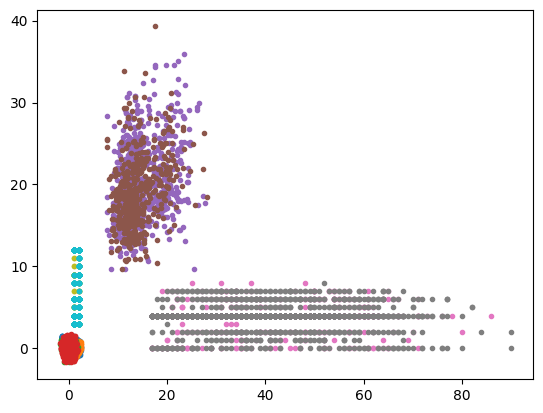

In [3]:
from DGE_experiments import predictive_experiment
import pandas as pd


all_means = {}
all_stds = {}

datasets = ['moons', 'circles', 'breast_cancer', 'adult', 'covid']
num_runs=10
model_type = 'deepish_mlp'

print("Models to run: ", model_names)
print("n_models: ", n_models)
print("num_runs: ", num_runs)
print("datasets: ", datasets)
print("model string: ", model_name)
print("verbose: ", verbose)

for dataset in datasets:
    workspace_folder, results_folder = get_folder_names(
        dataset, model_name, max_n=max_n, nsyn=nsyn)

    X_gt, X_syns = get_real_and_synthetic_with_multiple_models(dataset=dataset,
                                          n_models=n_models*num_runs,
                                          model_names=model_names,
                                          load_syn=load_syn,
                                          verbose=verbose,
                                          max_n=max_n,
                                          nsyn=nsyn)


    print(f'Dataset {dataset}\n')

    means, stds, _ = predictive_experiment(X_gt,
                                            X_syns,
                                            workspace_folder=workspace_folder,
                                            results_folder=results_folder,
                                            save=save,
                                            load=load,
                                            plot=False,
                                            task_type = model_type,
                                            verbose=verbose
                                            )

    print(means.to_latex())
    print(stds.to_latex())

    all_means[dataset] = means
    all_stds[dataset] = stds



In [5]:
# Print results, aggregated over different datasets
print(X_syns[0].shape)
print(X_gt.shape)
means_consolidated = metric_different_datasets(all_means, to_print=False)
if num_runs>1:
    stds_consolidated = metric_different_datasets(all_stds, to_print=False)
    stds_consolidated.drop(columns=['Mean'], inplace=True)
    print(add_std(means_consolidated, stds_consolidated).to_latex())
else:
    print(means_consolidated.to_latex())

(2000, 19)
(20000, 19)
\begin{tabular}{lllllll}
\toprule
{} &          Moons &        Circles &   Adult Income &  Breast Cancer &       COVID-19 &   Mean \\
\midrule
Oracle              &    0.996 ± 0.0 &    0.868 ± 0.0 &  0.864 ± 0.001 &    0.993 ± 0.0 &  0.928 ± 0.001 &   0.93 \\
Naive (S)           &  0.973 ± 0.022 &  0.806 ± 0.067 &  0.736 ± 0.063 &  0.937 ± 0.039 &  0.787 ± 0.067 &  0.848 \\
Naive (E)           &  0.973 ± 0.023 &  0.803 ± 0.079 &  0.758 ± 0.062 &  0.957 ± 0.026 &  0.841 ± 0.044 &  0.866 \\
DGE\$\_\{5\}\$           &  0.985 ± 0.002 &   0.86 ± 0.006 &  0.828 ± 0.003 &  0.976 ± 0.006 &    0.9 ± 0.004 &   0.91 \\
DGE\$\_\{10\}\$          &  0.985 ± 0.001 &  0.863 ± 0.001 &  0.837 ± 0.005 &  0.973 ± 0.008 &   0.91 ± 0.006 &  0.914 \\
DGE\$\_\{20\}\$          &  0.984 ± 0.001 &  0.863 ± 0.001 &  0.849 ± 0.007 &  0.978 ± 0.009 &   0.92 ± 0.008 &  0.919 \\
DGE\$\_\{20\}\$ (concat) &  0.948 ± 0.011 &  0.829 ± 0.015 &   0.755 ± 0.02 &  0.978 ± 0.009 &  0.836 ± 0.012 &  0.86

In [12]:
print("number of synthetic datasets: ", len(X_syns))
print("real train data size: ", X_gt.train().shape)
print("real test data size: ", X_gt.test().shape)
X,y = X_syns[0].unpack(as_numpy=True)
print("X shape: ", X.shape)
print("y shape: ", y.shape)
print("y elements: ", y[:10])
print("size of means: ", means.shape)
print("mean elements: ", means)

number of synthetic datasets:  200
real train data size:  (2000, 19)
real test data size:  (18000, 19)
X shape:  (2000, 18)
y shape:  (2000,)
y elements:  [ True  True  True  True  True  True  True  True  True  True]
size of means:  (7, 7)
mean elements:                            AUC       Acc        F1  Precision    Recall  \
Oracle               0.928204  0.925444  0.959908   0.957986  0.961839   
Naive (S)            0.787414  0.919772  0.957243   0.946715  0.968179   
Naive (E)            0.841398  0.920989  0.957885   0.947642  0.968473   
DGE$_{5}$            0.900107  0.930928  0.963580   0.943335  0.984721   
DGE$_{10}$           0.909895  0.932450  0.964519   0.940813  0.989457   
DGE$_{20}$           0.919742  0.933589  0.965129   0.941120  0.990397   
DGE$_{20}$ (concat)  0.835860  0.919317  0.956791   0.950848  0.962845   

                          NLL     Brier  
Oracle               0.320782  0.060165  
Naive (S)            0.543968  0.069512  
Naive (E)            0.35

## Model Evaluation

We compare the single baseline model vs the generative uncertainty model vs an oracle. Workflow.
0. Train and generate synthetic datasets $S_i$.
1. Take each synthetic dataset $S_i$ and split it up in train and test.
2. Train a model $f_i$ on the train set, for each $S_i$
3. Evaluate on the same synthetic dataset's test set $S_{i,test}$, giving $\hat{M}^S_i$ [Naive evaluation]
4. Evaluate on the true real test set (oracle), $D_{test}$, giving $M_i$ [Oracle evaluation]
5. Evaluate on the other synthetic datasets $\cup_{j\neq i} S_{j}$, giving $\hat{M}^G_i$ [DGE evaluation]
6. Average over all models $f_i$. 

N.B. the idea of the above, is that the trained model $f_i$ is the same for each evaluation type. In the model selection section, we will compare the performance of different model classes, where we will train a new model for each evaluation type (hence the aim is to evaluate which class is best, while the model itself may vary).

In [ ]:
from DGE_experiments import model_evaluation_experiment

evaluation_means = {}
evaluation_std = {}
relative = False
max_n = 5000
nsyn = 5000
model_name = 'ctgan_deep'
datasets = ['moons', 'circles', 'adult', 'seer', 'covid']
model_type = 'deepish_mlp'
verbose = False

for dataset in datasets:
    print('Dataset:', dataset)
    workspace_folder, results_folder = get_folder_names(
        dataset, model_name, max_n=max_n, nsyn=nsyn)


    

    # load data
    X_gt, X_syns = get_real_and_synthetic(dataset=dataset,
                                          n_models=n_models,
                                          model_name=model_name,
                                          load_syn=load_syn,
                                          verbose=verbose,
                                          max_n=max_n,
                                          nsyn=nsyn)

    # get mean and std of dataset over different runs
    means, std, _ = model_evaluation_experiment(X_gt, X_syns, workspace_folder=workspace_folder, relative=relative,
                                             model_type=model_type,
                                             load=load,
                                             save=load,
                                             verbose=verbose,
                                             )

    evaluation_means[dataset] = means
    evaluation_std[dataset] = std


In [ ]:
# mean across datasets
# per dataset
metric = 'Acc'
res = metric_different_datasets(evaluation_means, metric=metric, to_print=False)
std_df = metric_different_datasets(evaluation_std, metric=metric, to_print=False)

del std_df['Mean']
res = add_std(res, std_df)
if relative != 'l2':
    print(res.to_latex(float_format=lambda x: '%.3f' % x))
else:
    print(res.to_latex(float_format=lambda x: '%.5f' % x))

### Vary the depth of the generative model


In [ ]:
from DGE_experiments import model_evaluation_experiment

genrun_means = {}
genrun_stds = {}
genrun_all = {}
dataset = 'seer'
relative = False
verbose = False

max_n = 5000
nsyn = 5000
n_models = 20

for layers, model_name in zip(range(1,4),['ctgan_shallow', 'ctgan', 'ctgan_deep']):

    workspace_folder, results_folder = get_folder_names(
            dataset, model_name, max_n=max_n, nsyn=nsyn)

    X_gt, X_syns = get_real_and_synthetic(dataset=dataset,
                                        p_train=p_train,
                                        n_models=n_models,
                                        model_name=model_name,
                                        load_syn=load_syn,
                                        verbose=verbose,
                                        max_n=max_n,
                                        nsyn=nsyn)


    _, _, all = model_evaluation_experiment(X_gt, X_syns, workspace_folder=workspace_folder, relative=relative,
                                             model_type='deep_mlp',
                                             load=load,
                                             save=load,
                                             verbose=verbose,
                                             )

    all['Hidden layers'] = layers
    genrun_all[layers] = all
    

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

metric = 'AUC'
dfs = pd.concat(genrun_all,axis=0)
dfs.reset_index(inplace=True)
dfs['Hidden layers'] = dfs['level_0']
dfs = dfs[(dfs['Approach']=="DGE$_{20}$")|(dfs['Approach']=="DGE (K=20)")|(dfs['Approach']=='Naive')|(dfs['Approach']=='Oracle')]
sns.catplot(x='Hidden layers', y=metric, data=dfs, kind='box', hue='Approach', aspect=2, height = 3, showfliers=False, legend=False)
plt.legend()
plt.tight_layout()
plt.savefig(f'results/stories/eval_models_{dataset}_{metric}.png', dpi=300)
#draw line for oracle mean


## Model Selection
Essentially repeat the above for different models

In [ ]:
from DGE_experiments import model_selection_experiment

# load data
dataset = 'seer'
max_n = 5000
nsyn = 5000
X_gt, X_syns = get_real_and_synthetic(dataset=dataset,
                                        n_models=n_models,
                                        model_name=model_name,
                                        load_syn=load_syn,
                                        verbose=verbose,
                                        max_n=max_n,
                                        nsyn=nsyn)



workspace_folder, results_folder = get_folder_names(
    dataset, model_name, max_n=max_n, nsyn=nsyn)

means_sorted, std = model_selection_experiment(X_gt, X_syns, relative=False,
                                                    workspace_folder=workspace_folder, 
                                                    load=load, save=save)




In [ ]:
A = add_std(means_sorted[metric].iloc[:5], std[metric])
B = means_sorted[metric].iloc[5:]
B.index = [f'{i}'.replace(' rank','') for i in B.index]
B = B.astype(int)
B.columns = ['' for i in B.columns]
C = pd.concat([A, B], axis=1)
print(C.to_latex())


### Run for different synthetic dataset size (Appendix)

In [ ]:
from DGE_experiments import model_selection_experiment
from DGE_data import get_real_and_synthetic
from DGE_utils import get_folder_names
import numpy as np
import sklearn

# load data
dataset = 'seer'
max_n = 5000
p_train = 0.8
n_models = 20
model_name = 'ctgan_deep'
load=True
save = True
load_syn = True
verbose = False
means = {}
stds = {}
model_types = ['mlp', 'deepish_mlp', 'deep_mlp', 'largest_mlp']

for nsyn in [1000, 2000, 5000,10000,20000]:
    X_gt, X_syns = get_real_and_synthetic(dataset=dataset,
                                            p_train=p_train,
                                            n_models=n_models,
                                            model_name=model_name,
                                            load_syn=load_syn,
                                            verbose=verbose,
                                            max_n=max_n,
                                            nsyn=nsyn)



    workspace_folder, results_folder = get_folder_names(
        dataset, model_name, max_n=max_n, nsyn=nsyn)

    means_sorted, std = model_selection_experiment(X_gt, X_syns, relative=False,
                                                        workspace_folder=workspace_folder, 
                                                        load=load, save=save, model_types=model_types )

    means[nsyn] = means_sorted
    stds[nsyn] = std


In [ ]:
x = means.keys()
metric = 'AUC'
from importlib import reload
import matplotlib.pyplot as plt
plt=reload(plt)
for i in range(len(means_sorted[metric])):    
    y = [means[j][metric].iloc[i] for j in x]
    labels = means[5000][metric].columns
    plt.semilogx(x, y, label=labels)
    plt.xlabel('Synthetic dataset size')
    name = means[5000][metric].index[i]
    if 'rank' in name:
        plt.ylabel('Ranking')
    else:
        plt.ylabel(metric)
    plt.legend()
    plt.savefig(f'results/stories/model_selection_mlps_nsyn_{name}_{metric}.png')
    plt.show()

## Underrepresented group

### Model training

In [ ]:
from DGE_data import get_real_and_synthetic
dataset = 'covid'
n_models = 20
num_runs = 10
max_n = 2000
nsyn = 2000
model_name = 'ctgan'
load = True
save = True
load_syn = True
verbose = False
reduce_to = None # used to get a very large set of real samples for evaluation (to accurately performance on small subgroups)


In [ ]:
X_gt, X_syns = get_real_and_synthetic(dataset=dataset,
                                        n_models=n_models*num_runs,
                                        model_name=model_name,
                                        load_syn=load_syn,
                                        verbose=verbose,
                                        max_n=max_n,
                                        nsyn=nsyn,
                                        reduce_to=reduce_to)

# Get some indication of the distribution of the data
X_gt.train().data.hist()

Let us define the minority category for each feature

In [ ]:
import pandas as pd
from synthcity.plugins.core.dataloader import GenericDataLoader

def find_minority(data, feature):
    # Get the value that is the minority

    # turn data into dataframe if GenericDataLoader
    if type(data) != pd.DataFrame:
        data = data.data
    # find minority value
    if data[feature].unique().shape[0] < 20:

        counts = data[feature].value_counts()
        percentages = counts/counts.sum()
        counts = counts[percentages>0.005]
        value = counts.index[-1]
        percentage = percentages[value]
        # Create function that selects the minority value
        def subset(X):
            Xout = X[X[feature]==value]
            if type(Xout) == pd.DataFrame:
                Xout = GenericDataLoader(Xout, target='target')
                if hasattr(X, 'targettype'):
                    Xout.targettype = X.targettype
            return Xout
    else:
        quantile = 0.1
        threshold = data[feature].quantile(1-quantile)
        value = f'>={threshold:.2f}'
        percentage = quantile
        # Create function that selects the minority value
        def subset(X):
            Xout = X[X[feature]>=threshold]
            if type(Xout) == pd.DataFrame:
                Xout = GenericDataLoader(Xout, target='target')
                if hasattr(X, 'targettype'):
                    Xout.targettype = X.targettype
            return Xout

    return subset, value, percentage


In [ ]:
from DGE_experiments import predictive_experiment
from DGE_utils import get_folder_names
from synthcity.plugins.core.dataloader import GenericDataLoader

values = {}
results = {}
percentages = {}

workspace_folder, results_folder = get_folder_names(
        dataset, model_name, max_n=max_n, nsyn=nsyn)

feature = 'ALL'
features = X_gt.unpack(as_numpy=False)[0].columns

_, _, res = predictive_experiment(X_gt,
                                    X_syns,
                                    workspace_folder=workspace_folder,
                                    results_folder=results_folder,
                                    save=save,
                                    load=load,
                                    plot=False,
                                    outlier=False
                                    )

results[feature] = res


for feature in features:
    subset, value, percentage = find_minority(X_gt.train(), feature)
    print(f'Feature {feature},\n minority value {value},\n minority percentage {percentage}')
    if percentage > 0.2:
        print('skipping due to not being minority')
        continue
    
    
    try:
        _, _, res = predictive_experiment(X_gt,
                                            X_syns,
                                            workspace_folder=workspace_folder,
                                            results_folder=results_folder,
                                            save=save,
                                            load=load,
                                            plot=False,
                                            outlier=subset
                                            )
    except ValueError:
        print('Skipping due to too heavy imbalance making AUC non-computable')
        continue

    percentages[feature] = percentage
    values[feature] = value
    results[feature] = res



add the category name to each subset (just for plotting)

In [ ]:
results_copy = results.copy() # to got back if necessary

sorted_percentages = sorted(percentages.items(), key=lambda item: item[1])
sorted_percentages = dict(sorted_percentages)
#results_ = {f'{key}:{value} ({round(100*sorted_percentages[key],1)}%)': results[key] for key in list(sorted_percentages.keys())[::-1]}
results_ = {f'{key}:{values[key]}': results[key] for key in list(sorted_percentages.keys())[::-1]}
results_ = dict({'Overall':results['ALL']}, **results_)
results = results_

Plot

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

normalize = True
if normalize:
    results_ = {}
    for key, res in results.items():
        results_key = []
        for group in res.groupby('Approach'):
            res_ = group[1].drop(columns='Approach')-res[res['Approach']=='Oracle'].drop(columns='Approach')
            res_['Approach'] = group[0]
            results_key.append(res_)
        results_key = pd.concat(results_key, axis=0)
        results_[key] = results_key
else:
    results_ = results.copy()

metric = 'AUC'
baseline = 'E'

df = pd.concat(results_)
df['Subset'] = df.index.get_level_values(0)

if normalize:
    df = df[(df['Approach']=='DGE$_{20}$')|(df['Approach']==f'Naive ({baseline})')] #|(df['Approach']=='DGE$_{20}$ (concat)')
else:
    df = df[(df['Approach']=='DGE$_{20}$')|(df['Approach']==f'Naive ({baseline})')|(df['Approach']=='Oracle')] #|(df['Approach']=='DGE$_{20}$ (concat)')
# draw a horizontal line at y=0
g = sns.catplot(data=df, hue='Approach', y=metric, x='Subset', kind='box', aspect=3, showfliers=False, legend=False)
g.set_xticklabels(rotation=20)
if normalize:
    plt.axhline(y=0, color='k', linestyle='--')
    g.set_ylabels(metric+r' on subset relative to $\mathcal{D}_R$-model')
plt.tight_layout()
plt.legend()
plt.savefig(f'results/stories/underrepresented_training_nsyn{nsyn}_nmax{max_n}_{metric}_{baseline}.png', dpi=300)


## Influence of synthetic data size (uncertainty plots and confidence curves)

Let's study the effect of synthetic data size. Resulting plots are saved in /results/

In [ ]:
from DGE_experiments import predictive_experiment
import pandas as pd


all_means = {}
all_stds = {}
model_name = 'ctgan'
n_models = 20
max_n = 2000
model_type = 'mlp'

for dataset in ['adult', 'seer', 'covid', 'gaussian', 'circles', 'moons']:
    for nsyn in [2000, 5000, 10000, 20000]:
        workspace_folder, results_folder = get_folder_names(
            dataset, model_name, max_n=max_n, nsyn=nsyn)

        X_gt, X_syns = get_real_and_synthetic(dataset=dataset,
                                            p_train=p_train,
                                            n_models=n_models,
                                            model_name=model_name,
                                            load_syn=load_syn,
                                            verbose=verbose,
                                            max_n=max_n,
                                            nsyn=nsyn)


        print(f'Dataset {dataset}\n')

        means, stds, _ = predictive_experiment(X_gt,
                                                X_syns,
                                                workspace_folder=workspace_folder,
                                                results_folder=results_folder,
                                                task_type = model_type,
                                                save=save,
                                                load=load,
                                                plot=True,
                                                )



# Cross validation

In [ ]:
from sklearn.datasets import load_diabetes
import pickle
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import os
import torch


from synthcity.metrics.eval_performance import (
    PerformanceEvaluatorMLP,
    PerformanceEvaluatorXGB,
)
from synthcity.utils import reproducibility
from synthcity.plugins import Plugins
import synthcity.logger as log
from synthcity.plugins.core.dataloader import GenericDataLoader
from DGE_utils import metric_different_datasets, mean_across_pandas, add_std, get_folder_names

reproducibility.clear_cache()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


assert device.type == 'cuda'


/home/bv292/miniconda/envs/gen/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<stdin>:1:10: fatal error: cuda.h: No such file or directory
compilation terminated.

<stdin>:1:10: fatal error: cuda.h: No such file or directory
compilation terminated.

<stdin>:1:10: fatal error: cuda.h: No such file or directory
compilation terminated.

<stdin>:1:10: fatal error: cuda.h: No such file or directory
compilation terminated.



['sdv_tvae',
 'nflow',
 'rtvae',
 'adsgan',
 'privbayes',
 'sdv_ctgan',
 'copulagan',
 'ctgan',
 'dpgan',
 'bayesian_network',
 'tvae',
 'pategan',
 'gaussian_copula']

In [ ]:
from DGE_data import get_real_and_synthetic
from DGE_utils import get_folder_names, tt_predict_performance, cat_dl
from DGE_data import get_real_and_synthetic
from DGE_experiments import cross_val
import pandas as pd
from sklearn.model_selection import KFold
import seaborn as sns
import matplotlib.pyplot as plt

# let's restrict ourselves to classification datasets
datasets = ['moons', 'circles', 'breast_cancer',
            'adult',  'seer', 'covid']
# ['moons', 'circles','cal_housing', 'adult', 'diabetes', 'breast_cancer',  'seer', 'cutract' ]
model_name = 'ctgan'  # synthetic data model

p_train = 0.8  # proportion of training data for generative model. Default values if None
n_models = 20  # number of models in ensemble, for each run
max_n = 2000  # maximum number of data points to use for training generative model.
nsyn = 2000  # number of synthetic data points per synthetic dataset. Defaults to same as generative training size if None

num_runs = 5  # Number of runs. Don't choose to large, since total number of synthetic datasets is num_runs*n_models

load = True  # results
load_syn = True  # data
save = True  # save results and data

verbose = False




In [ ]:
num_runs = 5
model_type = 'deepish_mlp'
model_name = 'ctgan'
nsyn = 5000
max_n = 2000
p_train = 0.8
n_models = 20
cross_fold = 5
load_syn = True
load = True
save = True
verbose = True

scores_s_all = {}
scores_r_all = {}

datasets = ['moons', 'circles', 'adult', 'seer', 'covid']

for dataset in ['seer']:
    workspace_folder, results_folder = get_folder_names(
        dataset, model_name, max_n=max_n, nsyn=nsyn)

    X_gt, X_syns = get_real_and_synthetic(dataset=dataset,
                                          p_train=p_train,
                                          n_models=n_models*num_runs,
                                          model_name=model_name,
                                          load_syn=load_syn,
                                          verbose=verbose,
                                          max_n=max_n,
                                          nsyn=nsyn)

    print(f'Dataset {dataset}\n')

    scores_s, scores_r = cross_val(X_gt,
                                  X_syns,
                                  workspace_folder=workspace_folder,
                                  results_folder=results_folder,
                                  save=save,
                                  load=load,
                                  task_type=model_type,
                                  cross_fold=cross_fold,
                                  verbose=verbose
                                  )

    scores_s_all[dataset] = scores_s
    scores_r_all[dataset] = scores_r


n_total 20000 n_train: 2000
Dataset seer

Computing means and stds
Oracle
Run 0 approach Oracle split 0
Run 0 approach Oracle split 1
Run 0 approach Oracle split 2
Run 0 approach Oracle split 3
Run 0 approach Oracle split 4
Naive
Run 0 approach Naive split 0
Run 0 approach Naive split 1
Run 0 approach Naive split 2
Run 0 approach Naive split 3
Run 0 approach Naive split 4
DGE$_{20}$
Run 0 approach DGE$_{20}$ split 0
Run 0 approach DGE$_{20}$ split 1
Run 0 approach DGE$_{20}$ split 2
Run 0 approach DGE$_{20}$ split 3
Run 0 approach DGE$_{20}$ split 4
DGE$_{20}$ (concat)
Run 0 approach DGE$_{20}$ (concat) split 0
Run 0 approach DGE$_{20}$ (concat) split 1
Run 0 approach DGE$_{20}$ (concat) split 2
Run 0 approach DGE$_{20}$ (concat) split 3
Run 0 approach DGE$_{20}$ (concat) split 4
Oracle
Run 1 approach Oracle split 0
Run 1 approach Oracle split 1
Run 1 approach Oracle split 2
Run 1 approach Oracle split 3
Run 1 approach Oracle split 4
Naive
Run 1 approach Naive split 0
Run 1 approach Na

seer
                          AUC       Acc        F1  Precision    Recall  \
approach                                                                 
DGE$_{20}$           0.891685  0.816435  0.795660   0.813860  0.779506   
DGE$_{20}$ (concat)  0.891235  0.816010  0.795599   0.812098  0.780960   
Naive                0.871665  0.801000  0.784552   0.796922  0.774290   
Oracle               0.907072  0.839700  0.837993   0.847325  0.829780   

                          NLL     Brier  split  
approach                                        
DGE$_{20}$           0.417805  0.131421    2.0  
DGE$_{20}$ (concat)  0.419103  0.131782    2.0  
Naive                0.487104  0.145416    2.0  
Oracle               0.413746  0.120595    2.0  
                          AUC       Acc        F1  Precision    Recall  \
approach                                                                 
DGE$_{20}$           0.905688  0.826376  0.823714   0.836676  0.811564   
DGE$_{20}$ (concat)  0.905147  0.8

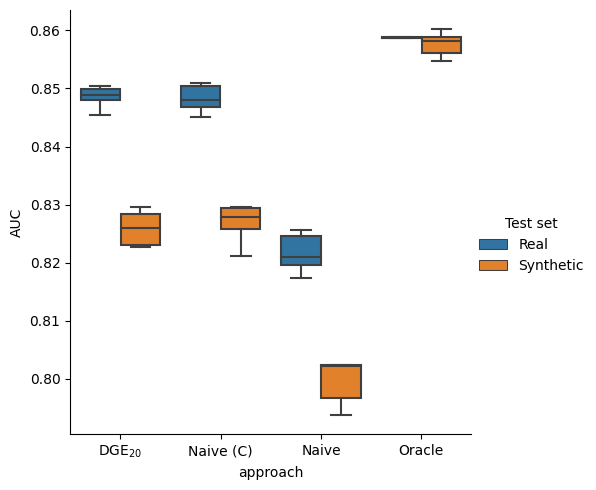

seer


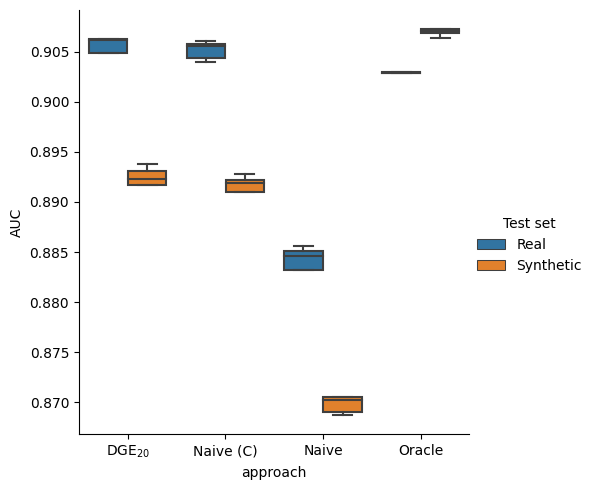

covid


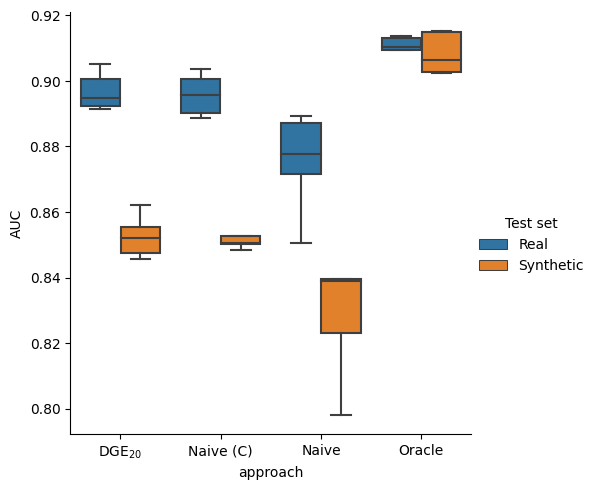

In [ ]:
metric = 'AUC'

for dataset in datasets[-3:]:
    print(dataset)
    scores_r_all[dataset]['Test set'] = 'Real'
    scores_s_all[dataset]['Test set'] = 'Synthetic'
    scores_ = pd.concat([scores_r_all[dataset], scores_s_all[dataset]],axis=0)
    scores_.reset_index(inplace=True)
    scores_.rename(columns={'index':'Approach'}, inplace=True)
    scores_ = scores_.mask(scores_ == 'DGE$_{20]$','DGE$_{20}$')
    scores_ = scores_.mask(scores_ == 'DGE$_{20}$ (concat)','Naive (C)')
    
    sns.catplot(data=scores_, x='approach', y=metric, hue='Test set', kind='box', showfliers=False)
    os.makedirs(f'./results/cross_val/', exist_ok=True)
    plt.savefig(f'./results/cross_val/{dataset}_{metric}_{model_name}_nsyn_{nsyn}_maxn{max_n}_{model_type}.png')
    plt.show()
